In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


El siguiente análisis ha sido generado a partir del dataset de Kaggle "Netflix IMDB Scores" : 

https://www.kaggle.com/datasets/thedevastator/netflix-imdb-scores/data 

El dataset incluye información sobre títulos disponibles en Netflix como su título, año de lanzamiento, certificación por edades, duración, puntuación en IMDb y número de votos. 

Antes de empezar a trabajar con él, utilizando Chat GPT hemos hecho un proceso para extraer más información sobre los títulos. Hemos pedido que por batches de unas 400 películas nos vaya generando información sobre los géneros, el país, el continente y el lenguaje. Toda esta información nos servirá para enriquecer el análisis del dataset. En la carpeta se incluyen los datasets intermedios que se han ido generando hasta llegar a Netflix_full.csv que es el que finalmente se utilizará. En Netflixpre.ipynb se peude ver el proceso para la construcción del dataset. 

La estructura del siguiente análisis es la siguiente : 

- Primeras visualizaciones generales y arreglo de incongruencias en los datos visibles. 

- Relaciones entre películas y series por países. 

- Evolución a través del tiempo del runtime en diferentes categorías. 

- Sobre los outliers en el runtime por tipo, género y país. 

- Distribución de las puntuaciones en IMDb. Generales y por tipo de producto. 

- Estudio de outliers y valores más altos en IMDb scores. 

- Consideraciones sobre la columna age_certification : nulos y valores disponibles. 

- Análisis de la relación entre países, géneros y su puntuación media en IMDb por un mapa de calor. 

- Tests estadísticos para verificar análisis previos y conclusión. 

In [2]:
df = pd.read_csv('/Users/toniamayaobrador/Desktop/Visualizaciones/Estadística Netflix/Neflix_full.csv')

df.head(5)

index                            title   type  \
0      0                      Taxi Driver  MOVIE   
1      1  Monty Python and the Holy Grail  MOVIE   
2      2                    Life of Brian  MOVIE   
3      3                     The Exorcist  MOVIE   
4      4     Monty Python's Flying Circus   SHOW   

                                         description  release_year  \
0  A mentally unstable Vietnam War veteran works ...          1976   
1  King Arthur, accompanied by his squire, recrui...          1975   
2  Brian Cohen is an average young Jewish man, bu...          1979   
3  12-year-old Regan MacNeil begins to adapt an e...          1973   
4  A British sketch comedy series with the shows ...          1969   

  age_certification  runtime  imdb_score  imdb_votes  genre1     genre2  \
0                 R      113         8.3    795222.0   Drama   Thriller   
1                PG       91         8.2    530877.0  Comedy        NaN   
2                 R       94         8.0    392419.0  Comedy        NaN   
3                 R      133         8.1    391942.0  Horror        NaN   
4             TV-14       30         8.8     72895.0  Comedy        NaN   

  Country      Continent Language  
0     USA  North America  English  
1      UK         Europe  English  
2      UK         Europe  English  
3     USA  North America  English  
4      UK         Europe  English

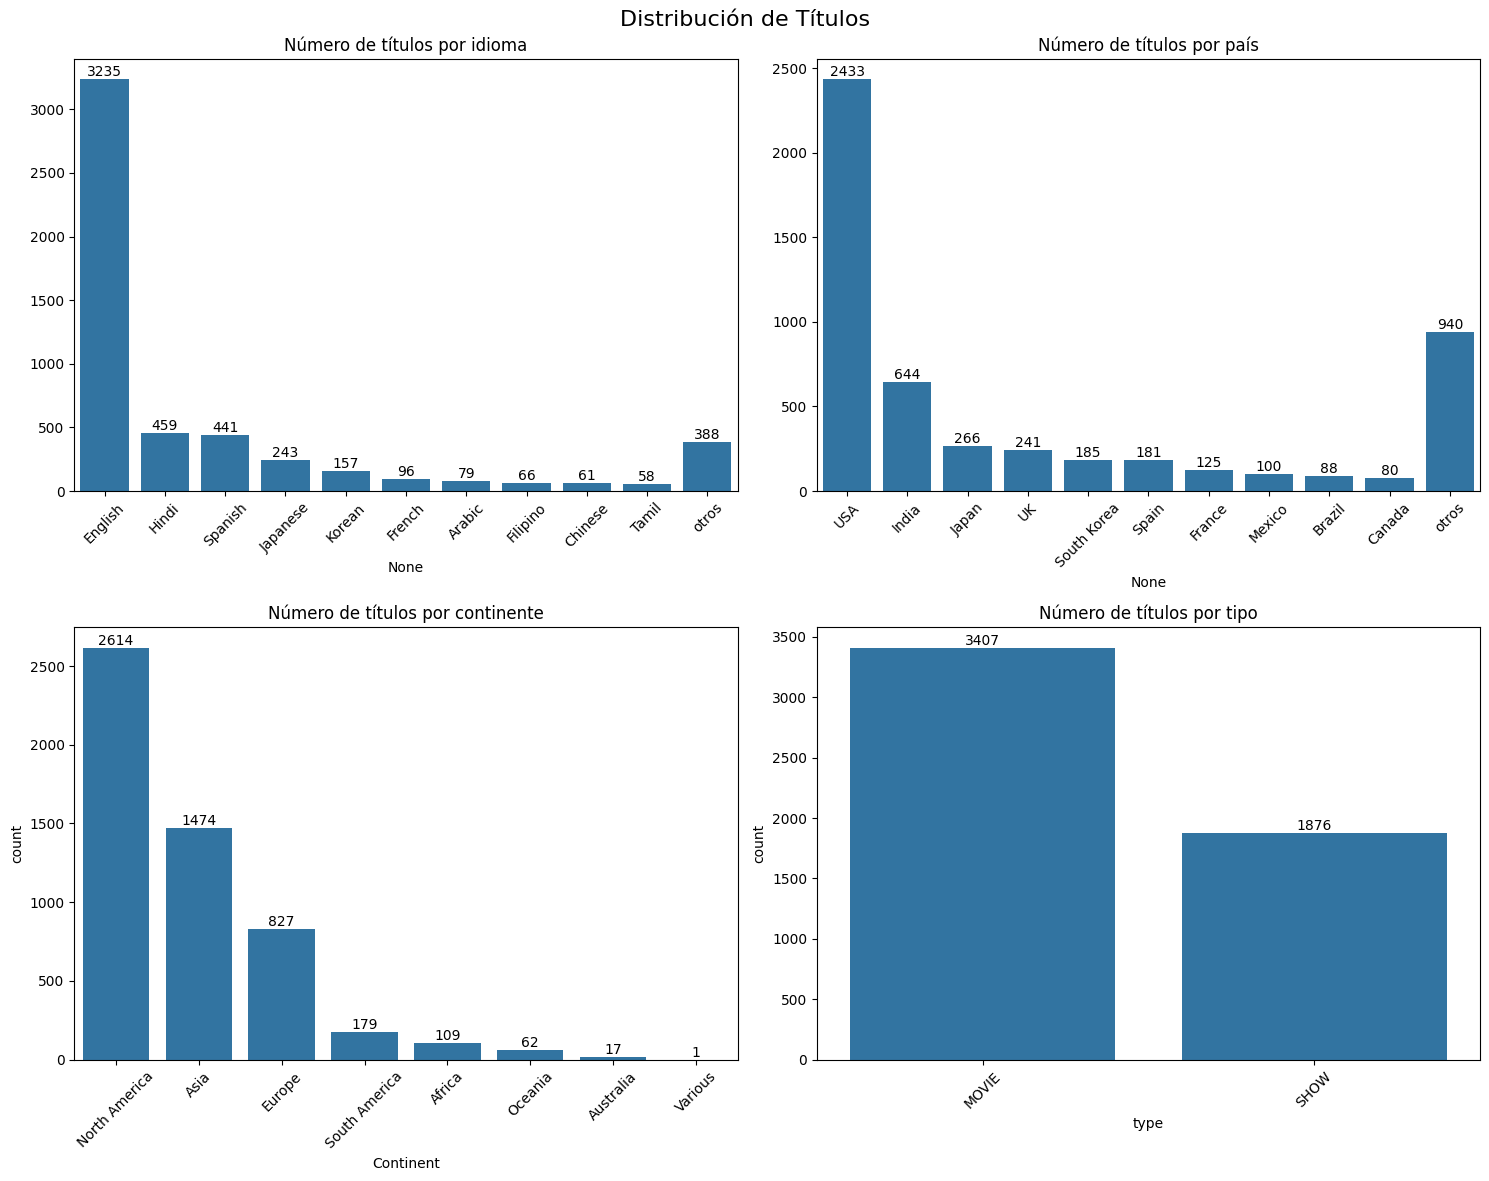

In [4]:
def group_others(series, top_n):
    top = series.value_counts().nlargest(top_n)
    others_sum = series.value_counts()[top_n:].sum()
    

    result = pd.concat([top, pd.Series({'otros': others_sum})])
    return result

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribución de Títulos', fontsize=16)


language_counts = group_others(df['Language'], 10)
sns.barplot(x=language_counts.index, 
           y=language_counts.values,
           ax=axes[0,0])
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].set_title('Número de títulos por idioma')


country_counts = group_others(df['Country'], 10)
sns.barplot(x=country_counts.index, 
           y=country_counts.values,
           ax=axes[0,1])
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].set_title('Número de títulos por país')


continent_order = df['Continent'].value_counts().index
sns.countplot(data=df, 
              x='Continent', 
              order=continent_order,
              ax=axes[1,0])
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].set_title('Número de títulos por continente')


sns.countplot(data=df, x='type', ax=axes[1,1])
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].set_title('Número de títulos por tipo')


for ax in axes.flat:
    for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom')


plt.tight_layout()
plt.show()

En esta primera aproximación vemos que el dataset de Netflix está claramente dominado por porductos de producción norte americana, de Estados Unidos. 

Después hay una serie de cuestiones preliminares que sería interesante estudiar : 

- India tiene 644 títulos pero 459 han sido etiquetados en Hindi, estudiaremos si es un error. 

- Francia tiene 125 títulos pero sólo 96 se han etiquetado como francés, el 23% de títulos estaría en otro idioma. 

- Hay 266 productos japoneses pero 243 están en japonés. Vamos a observar los otros 23, un 8,6% 

- La suma de producciones en español es de 441 mientras que España como país tiene 181 títulos. Más de la mitad de títulos en Español es de orígen Americano. 

- Los países asiáticos suman 1474 títulos. 664 de India, 266 de Japón, 180 de Corea del Sur y los demás se dividen entre los demás países asiáticos. 



/var/folders/k5/0ckgxv2x46n7_p0qwn2h0hhh0000gn/T/ipykernel_10822/3972475259.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_distribution_india.index, y=language_distribution_india.values, palette='viridis')


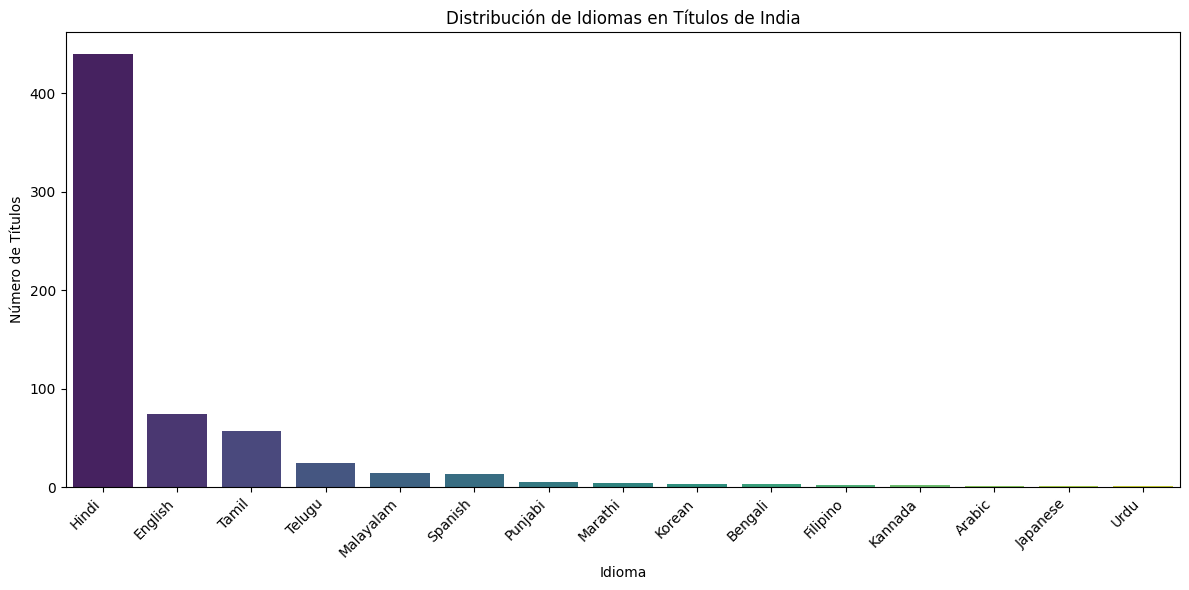

/var/folders/k5/0ckgxv2x46n7_p0qwn2h0hhh0000gn/T/ipykernel_10822/3972475259.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_distribution_not_hindi.index, y=genre_distribution_not_hindi.values, palette='coolwarm')


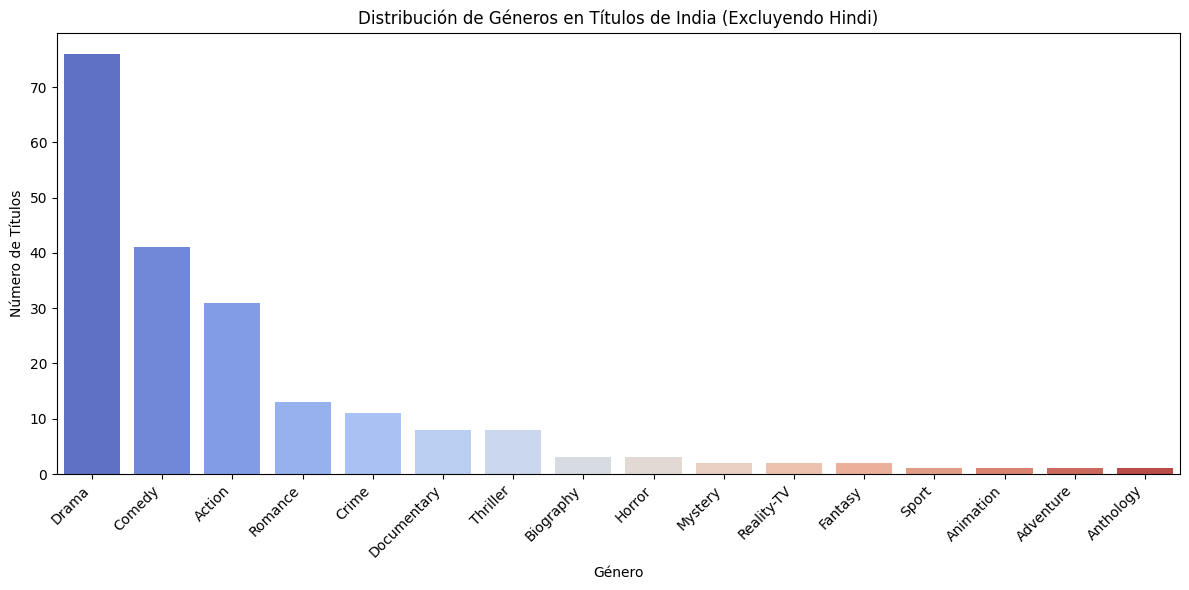

In [5]:
df_india = df[df['Country'] == 'India']
language_distribution_india = df_india['Language'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=language_distribution_india.index, y=language_distribution_india.values, palette='viridis')
plt.title("Distribución de Idiomas en Títulos de India")
plt.xlabel("Idioma")
plt.ylabel("Número de Títulos")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

df_india_not_hindi = df_india[df_india['Language'] != 'Hindi']
genre_distribution_not_hindi = df_india_not_hindi['genre1'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_distribution_not_hindi.index, y=genre_distribution_not_hindi.values, palette='coolwarm')
plt.title("Distribución de Géneros en Títulos de India (Excluyendo Hindi)")
plt.xlabel("Género")
plt.ylabel("Número de Títulos")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [6]:
df.loc[df['title'] == "Madness in the Desert", 'Language'] = 'Hindi'
df.loc[df['title'] == "Muran", 'Language'] = 'Tamil'
df.loc[df['title'] == "Love", 'Language'] = 'Hindi'
df.loc[df['title'] == "Selfie 69", 'Language'] = 'Hindi'
df.loc[df['title'] == "Meet The in-Laws", 'Language'] = 'Hindi'
df.loc[df['title'] == "Time Out", 'Language'] = 'Hindi'
df.loc[df['title'] == "Project Papa", 'Language'] = 'Hindi'
df.loc[df['title'] == "The Man Who Feels No Pain", 'Language'] = 'Hindi'
df.loc[df['title'] == "Forensic", 'Language'] = 'Hindi'
df.loc[df['title'] == "Ready to Mingle", 'Language'] = 'Hindi'
df.loc[df['title'] == "One-Way to Tomorrow", 'Language'] = 'Hindi'
df.loc[df['title'] == "Love", 'Language'] = 'Hindi'
df.loc[df['title'] == "Once Again", 'Language'] = 'Hindi'
df.loc[df['title'] == "A Choo", 'Language'] = 'Hindi'
df.loc[df['title'] == "Love Like the Falling Rain", 'Language'] = 'Hindi'
df.loc[df['title'] == "Penalty", 'Language'] = 'Hindi'
df.loc[df['title'] == "Time Out", 'Language'] = 'Hindi'
df.loc[df['title'] == "In Paradox", 'Language'] = 'Hindi'
df.loc[df['title'] == "The Invisible Thread", 'Language'] = 'Hindi'
df.loc[df['title'] == "Misfit: The Series", 'Language'] = 'Hindi'
df.loc[df['title'] == "Will You Marry?", 'Language'] = 'Hindi'


/var/folders/k5/0ckgxv2x46n7_p0qwn2h0hhh0000gn/T/ipykernel_10822/419456227.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_france, x='Language', palette='viridis')


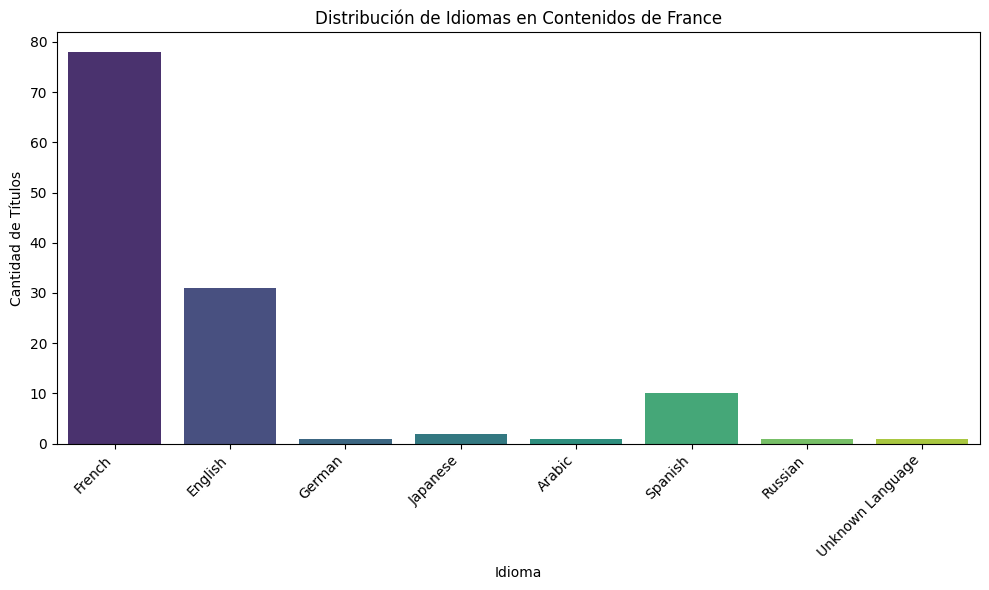

In [7]:
df_france = df[df['Country'] == 'France']
df_japan = df[df['Country'] == 'Japan']
df_spain = df[df['Country'] == 'Spain']

# Gráfico para estudiar los idiomas en el dataset de France
plt.figure(figsize=(10, 6))
sns.countplot(data=df_france, x='Language', palette='viridis')
plt.title("Distribución de Idiomas en Contenidos de France")
plt.xlabel("Idioma")
plt.ylabel("Cantidad de Títulos")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/var/folders/k5/0ckgxv2x46n7_p0qwn2h0hhh0000gn/T/ipykernel_10822/3383191478.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='coolwarm')


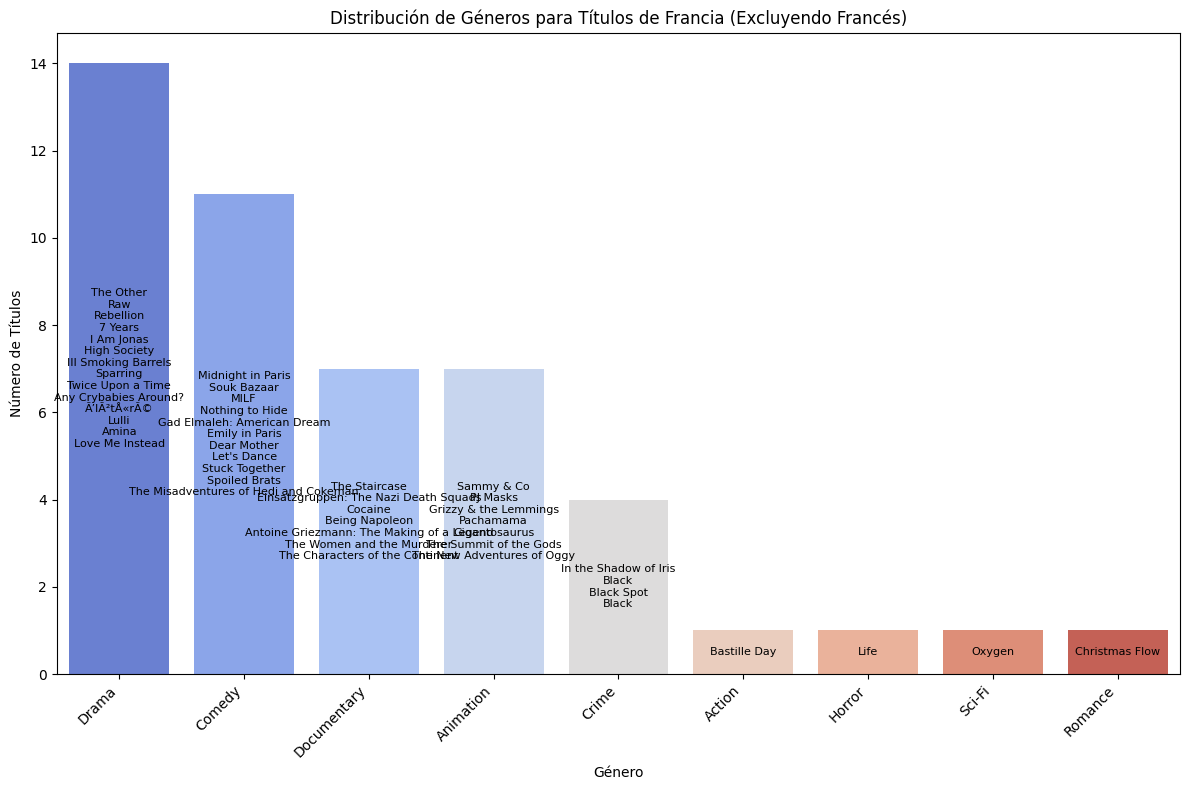

In [8]:
df_france_not_french = df_france[df_france['Language'] != 'French']

plt.figure(figsize=(12, 8))
genre_counts = df_france_not_french['genre1'].value_counts()

sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='coolwarm')
plt.title("Distribución de Géneros para Títulos de Francia (Excluyendo Francés)")
plt.xlabel("Género")
plt.ylabel("Número de Títulos")

for i, genre in enumerate(genre_counts.index):
    titles = df_france_not_french[df_france_not_french['genre1'] == genre]['title']
    titles_text = "\n".join(titles)  # Apilar títulos en una columna
    plt.text(i, genre_counts.values[i] / 2, titles_text, ha='center', va='center', fontsize=8, color='black')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


El resultado de este gráfico es interesante pues absoutamente todos los dramas deberán ser cambiados a francés mientras que los otros productos si cuentan con co-producción extranjera en su mayoría o aunque sean franceses son sobretodo en inglés, vamos a modificar los títulos a sus idiomas correctos y pasamos a Japón: 

In [9]:
df_france_not_french.loc[df_france_not_french['genre1'] == 'Drama', 'Language'] = 'French'

df_france_not_french[df_france_not_french['Language'] == 'Spanish']

df.loc[df['title'] == 'MILF', 'Language'] = 'French'
df.loc[df['title'] == 'Spoiled Brats', 'Language'] = 'French'
df.loc[df['title'] == 'The Women and the Murderer', 'Language'] = 'French'
df.loc[df['title'] == 'The Characters of the Continent', 'Language'] = 'English'
df.loc[df['title'] == 'The Misadventures of Hedi and Cokeman', 'Language'] = 'French'
df.loc[df['title'] == 'Christmas Flow', 'Language'] = 'French'



/var/folders/k5/0ckgxv2x46n7_p0qwn2h0hhh0000gn/T/ipykernel_10822/3724997651.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_japan, x='Language', palette='viridis')


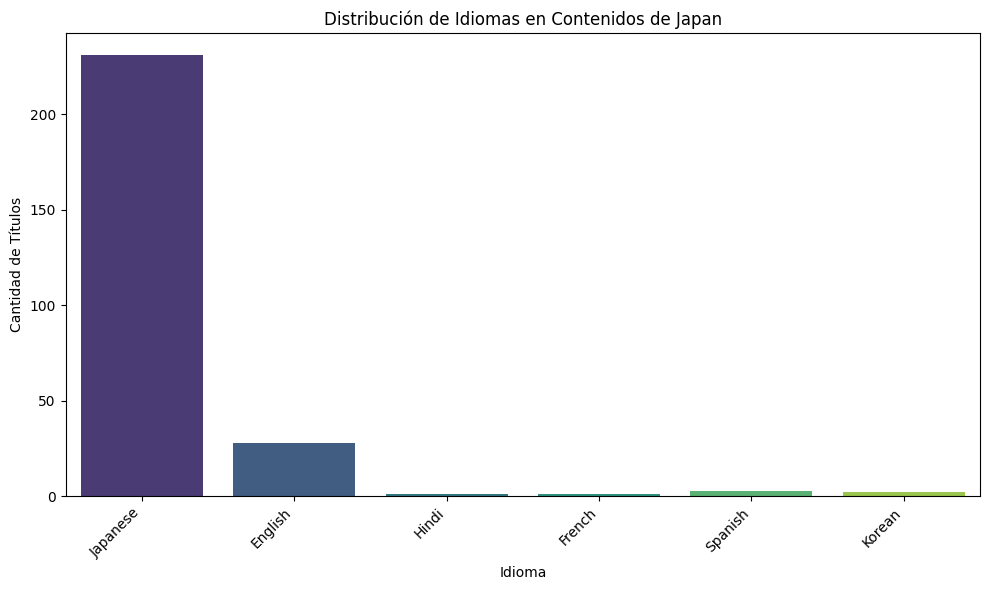

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_japan, x='Language', palette='viridis')
plt.title("Distribución de Idiomas en Contenidos de Japan")
plt.xlabel("Idioma")
plt.ylabel("Cantidad de Títulos")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/var/folders/k5/0ckgxv2x46n7_p0qwn2h0hhh0000gn/T/ipykernel_10822/3592693307.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts_japan.index, y=genre_counts_japan.values, palette='coolwarm')


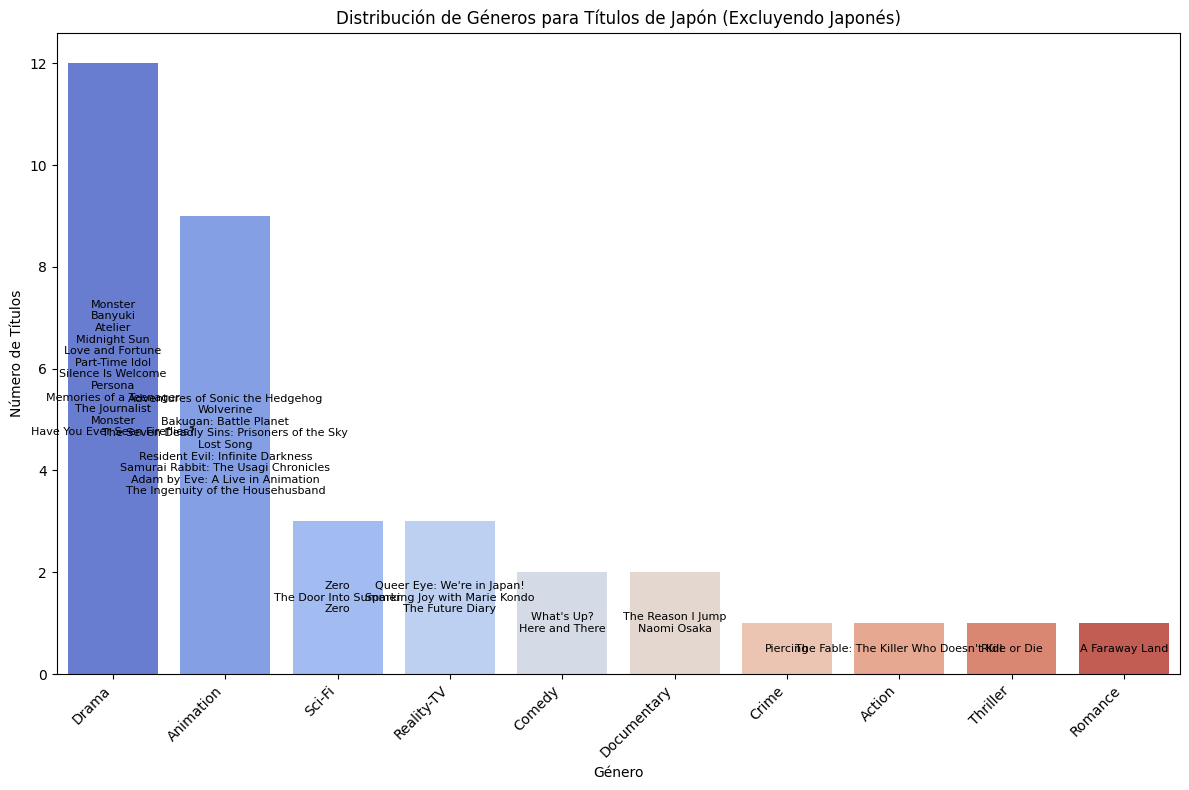

In [11]:
df_japan_not_japanese = df[(df['Country'] == 'Japan') & (df['Language'] != 'Japanese')]

plt.figure(figsize=(12, 8))
genre_counts_japan = df_japan_not_japanese['genre1'].value_counts()

sns.barplot(x=genre_counts_japan.index, y=genre_counts_japan.values, palette='coolwarm')
plt.title("Distribución de Géneros para Títulos de Japón (Excluyendo Japonés)")
plt.xlabel("Género")
plt.ylabel("Número de Títulos")

for i, genre in enumerate(genre_counts_japan.index):
    titles = df_japan_not_japanese[df_japan_not_japanese['genre1'] == genre]['title']
    titles_text = "\n".join(titles)  # Apilar títulos en una columna
    plt.text(i, genre_counts_japan.values[i] / 2, titles_text, ha='center', va='center', fontsize=8, color='black')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Los títulos de anime tienen dub inglés pero podremos re-etiquetarlos como japonés, en general todos estos títulos deberían considerarse japonés aunque tengan partes o voces en otros idiomas. Después pasamos a España. 

In [12]:
df.loc[(df['Country'] == 'Japan') & (df['Language'] != 'Japanese'), 'Language'] = 'Japanese'


/var/folders/k5/0ckgxv2x46n7_p0qwn2h0hhh0000gn/T/ipykernel_10822/1667430414.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_spain, x='Language', palette='viridis')


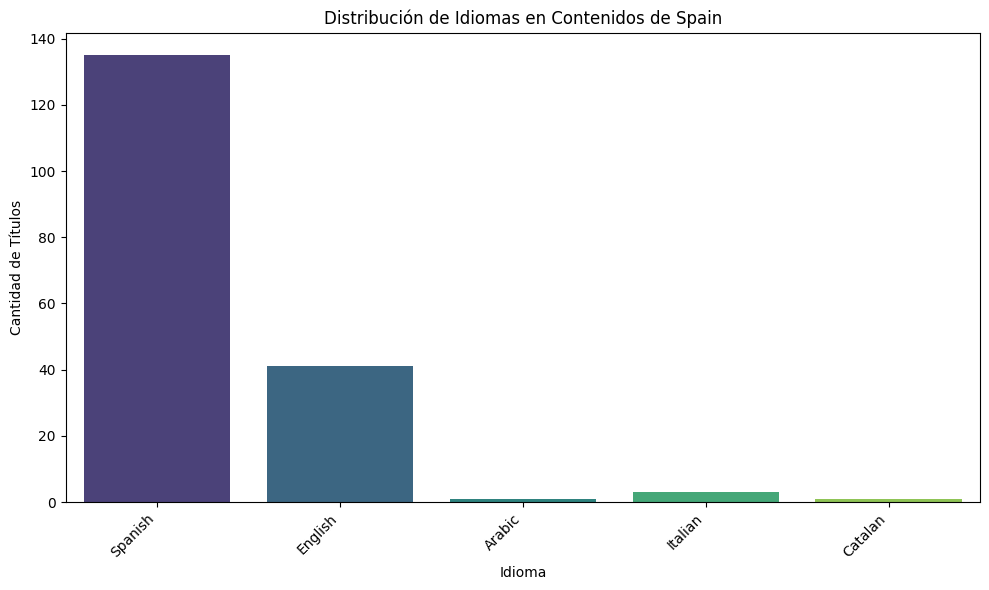

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_spain, x='Language', palette='viridis')
plt.title("Distribución de Idiomas en Contenidos de Spain")
plt.xlabel("Idioma")
plt.ylabel("Cantidad de Títulos")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/k5/0ckgxv2x46n7_p0qwn2h0hhh0000gn/T/ipykernel_10822/3431982028.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts_spain.index, y=genre_counts_spain.values, palette='coolwarm')


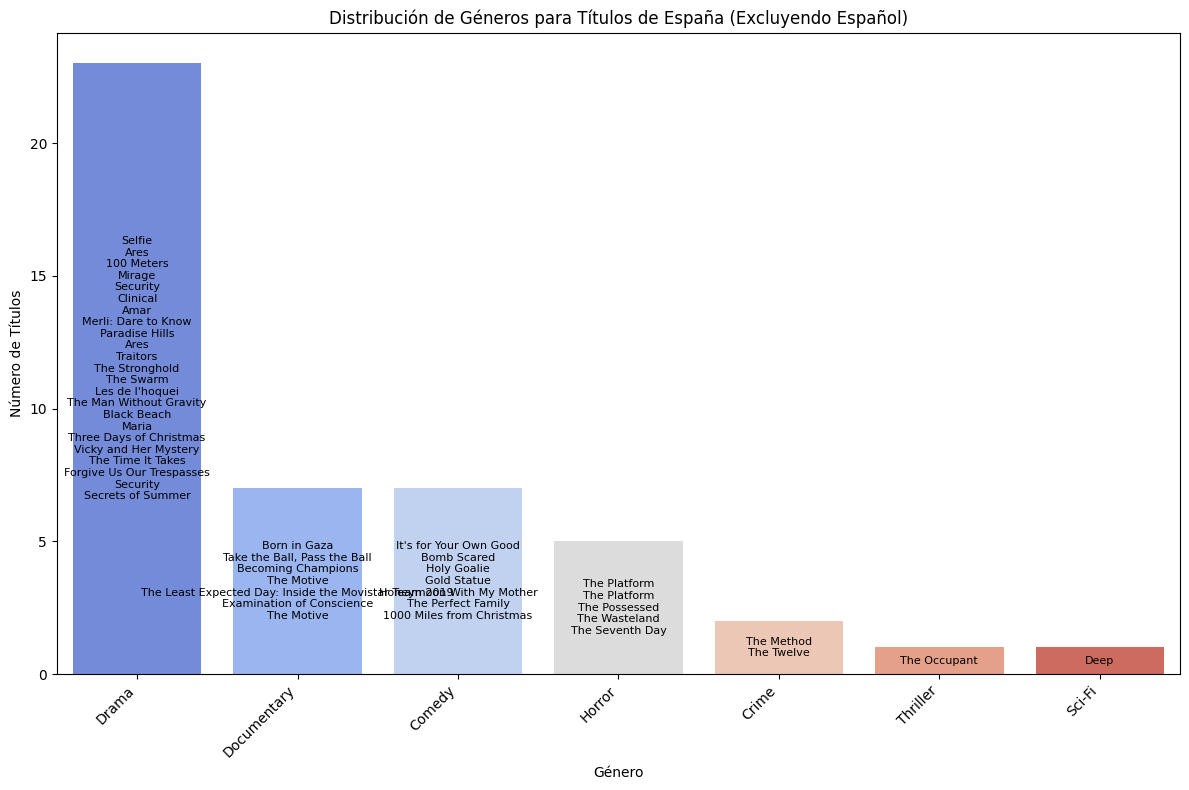

In [14]:
df_spain_not_spanish = df[(df['Country'] == 'Spain') & (df['Language'] != 'Spanish')]

plt.figure(figsize=(12, 8))
genre_counts_spain = df_spain_not_spanish['genre1'].value_counts()

sns.barplot(x=genre_counts_spain.index, y=genre_counts_spain.values, palette='coolwarm')
plt.title("Distribución de Géneros para Títulos de España (Excluyendo Español)")
plt.xlabel("Género")
plt.ylabel("Número de Títulos")

for i, genre in enumerate(genre_counts_spain.index):
    titles = df_spain_not_spanish[df_spain_not_spanish['genre1'] == genre]['title']
    titles_text = "\n".join(titles) 
    plt.text(i, genre_counts_spain.values[i] / 2, titles_text, ha='center', va='center', fontsize=8, color='black')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Vemos que aquí hay muchos títulos que deberían ajustarse, vamos a buscar información y arreglar los datos. Ahora que esto debería estar limpio para las incongruencias más destacbales volvemos a realizar el mismo conjunto de plots: 

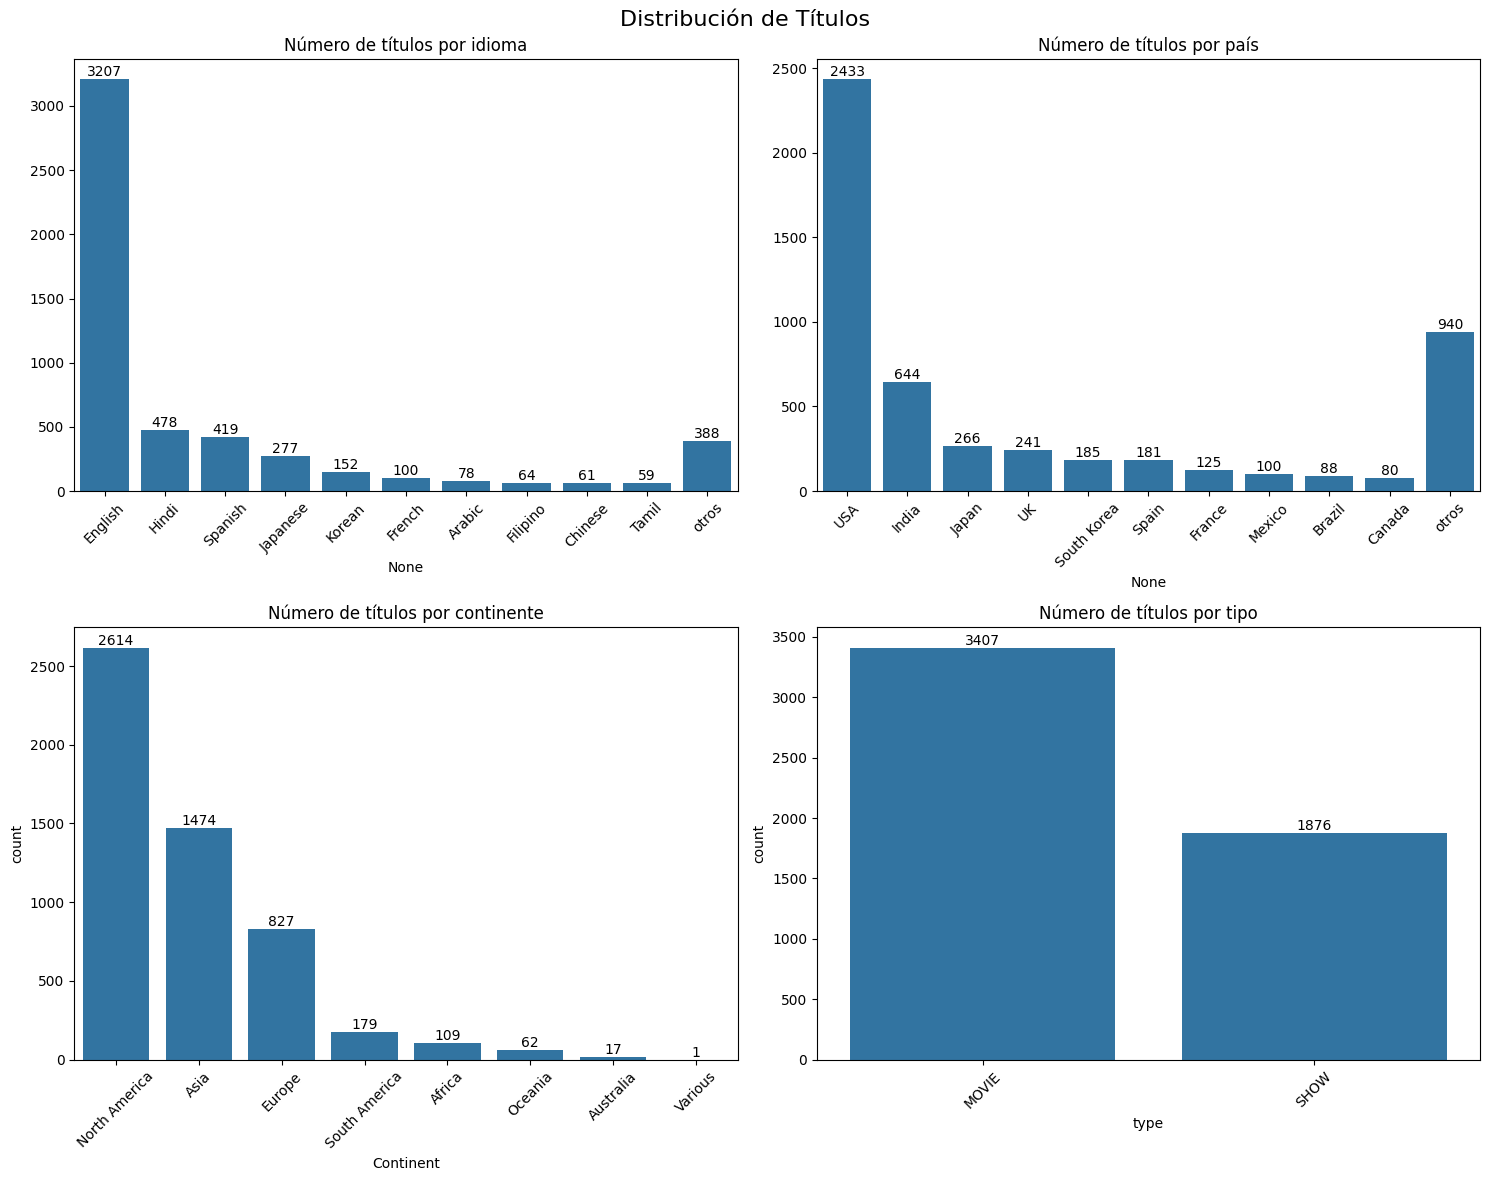

In [15]:

def group_others(series, top_n):
    top = series.value_counts().nlargest(top_n)
    others_sum = series.value_counts()[top_n:].sum()
    

    result = pd.concat([top, pd.Series({'otros': others_sum})])
    return result


fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribución de Títulos', fontsize=16)


language_counts = group_others(df['Language'], 10)
sns.barplot(x=language_counts.index, 
           y=language_counts.values,
           ax=axes[0,0])
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].set_title('Número de títulos por idioma')

country_counts = group_others(df['Country'], 10)
sns.barplot(x=country_counts.index, 
           y=country_counts.values,
           ax=axes[0,1])
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].set_title('Número de títulos por país')

continent_order = df['Continent'].value_counts().index
sns.countplot(data=df, 
              x='Continent', 
              order=continent_order,
              ax=axes[1,0])
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].set_title('Número de títulos por continente')

sns.countplot(data=df, x='type', ax=axes[1,1])
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].set_title('Número de títulos por tipo')

for ax in axes.flat:
    for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [16]:
df.loc[df['title'] == 'Selfie', 'Language'] = 'Spanish'
df.loc[df['title'] == '100 Meters', 'Language'] = 'Spanish'

df.loc[df['title'] == 'Ares', 'Country'] = 'Netherlands'
df.loc[df['title'] == 'Ares', 'Language'] = 'Dutch'

df.loc[df['title'] == 'The Method', 'Country'] = 'Russia'
df.loc[df['title'] == 'The Method', 'Language'] = 'Russian'

# Cambiar el idioma a "Spanish" para los títulos producidos en España originalmente en español
df.loc[df['title'] == "Mirage", 'Language'] = 'Spanish'
df.loc[df['title'] == "Security", 'Language'] = 'Spanish'
df.loc[df['title'] == "Amar", 'Language'] = 'Spanish'
df.loc[df['title'] == "The Platform", 'Language'] = 'Spanish'
df.loc[df['title'] == "It's for Your Own Good", 'Language'] = 'Spanish'
df.loc[df['title'] == "Bomb Scared", 'Language'] = 'Spanish'
df.loc[df['title'] == "The Motive", 'Language'] = 'Spanish'
df.loc[df['title'] == "Holy Goalie", 'Language'] = 'Spanish'
df.loc[df['title'] == "The Occupant", 'Language'] = 'Spanish'
df.loc[df['title'] == "Merli: Dare to Know", 'Language'] = 'Catalan'

df.loc[df['title'] == "Traitors", 'Country'] = 'United Kingdom'
df.loc[df['title'] == "Traitors", 'Language'] = 'English'

df.loc[df['title'] == "The Stronghold", 'Country'] = 'France'
df.loc[df['title'] == "The Stronghold", 'Language'] = 'French'

df.loc[df['title'] == "The Swarm", 'Country'] = 'Germany'
df.loc[df['title'] == "The Swarm", 'Language'] = 'German'

df.loc[df['title'] == "The Possessed", 'Country'] = 'Italy'
df.loc[df['title'] == "The Possessed", 'Language'] = 'Italian'

df.loc[df['title'] == "Gold Statue", 'Country'] = 'Nigeria'
df.loc[df['title'] == "Gold Statue", 'Language'] = 'English'

df.loc[df['title'] == "The Man Without Gravity", 'Country'] = 'Italy'
df.loc[df['title'] == "The Man Without Gravity", 'Language'] = 'Italian'
df.loc[df['title'] == "Examination of Conscience", 'Language'] = 'Spanish'
df.loc[df['title'] == "Black Beach", 'Language'] = 'Spanish'
df.loc[df['title'] == "Maria", 'Language'] = 'Spanish'
df.loc[df['title'] == "Three Days of Christmas", 'Language'] = 'Spanish'
df.loc[df['title'] == "Honeymoon With My Mother", 'Language'] = 'Spanish'
df.loc[df['title'] == "The Wasteland", 'Language'] = 'Spanish'
df.loc[df['title'] == "The Perfect Family", 'Language'] = 'Spanish'
df.loc[df['title'] == "The Seventh Day", 'Language'] = 'Spanish'
df.loc[df['title'] == "Vicky and Her Mystery", 'Language'] = 'Spanish'
df.loc[df['title'] == "The Time It Takes", 'Language'] = 'Spanish'

# Mantener en inglés títulos dirigidos a audiencias internacionales o verificar contexto de producción
# - "Deep": podría estar correctamente en inglés, mantener sin cambios por ahora
# - "Forgive Us Our Trespasses": Verificación en contexto, sin cambios por ahora


# Mantener en inglés los títulos dirigidos a una audiencia internacional
# Sin cambios necesarios para estos, ya que se mantienen en inglés:
# - "Take the Ball, Pass the Ball"
# - "Clinical" (revisión en contexto)
# - "Becoming Champions"



Después de una corrección de las mayores inconsistencias en los datos podemos sacar las siguients conclusiones : 

- Al ser Netflix una plataforma global la división por mercados nacionales presenta una serie de desafíos como los países que hablan una diversidad de lenguas importante como es India en la que la producción debe decidir entre concentrarse en un idioma o presentar productos también para hablantes de otras lenguas del territorio. 

- Las coproducciones internacionales también son un tema a considerar en en análisis ya que incluyen datos de varios países y lenguas. En este caso hemos optado por seleccionar un país y lengua principal en estos casos para tener una estructura de datos más compacta. 

- El mercado global de Netflix no sólo es complejo en cuánto a separación por países o idiomas si no por el hecho de contar con un factor de multiculturalidad enorme. Los productos como la animación japonesa, los dramas de Corea del Sur o las series dramáticas turcas cada vez tienen mayor impacto en el mercado audiovisual y vemos como el volumen de estos productos va volviéndose considerable. 

Los siguientes análisis se basan en type (MOVIE o SHOW) : 

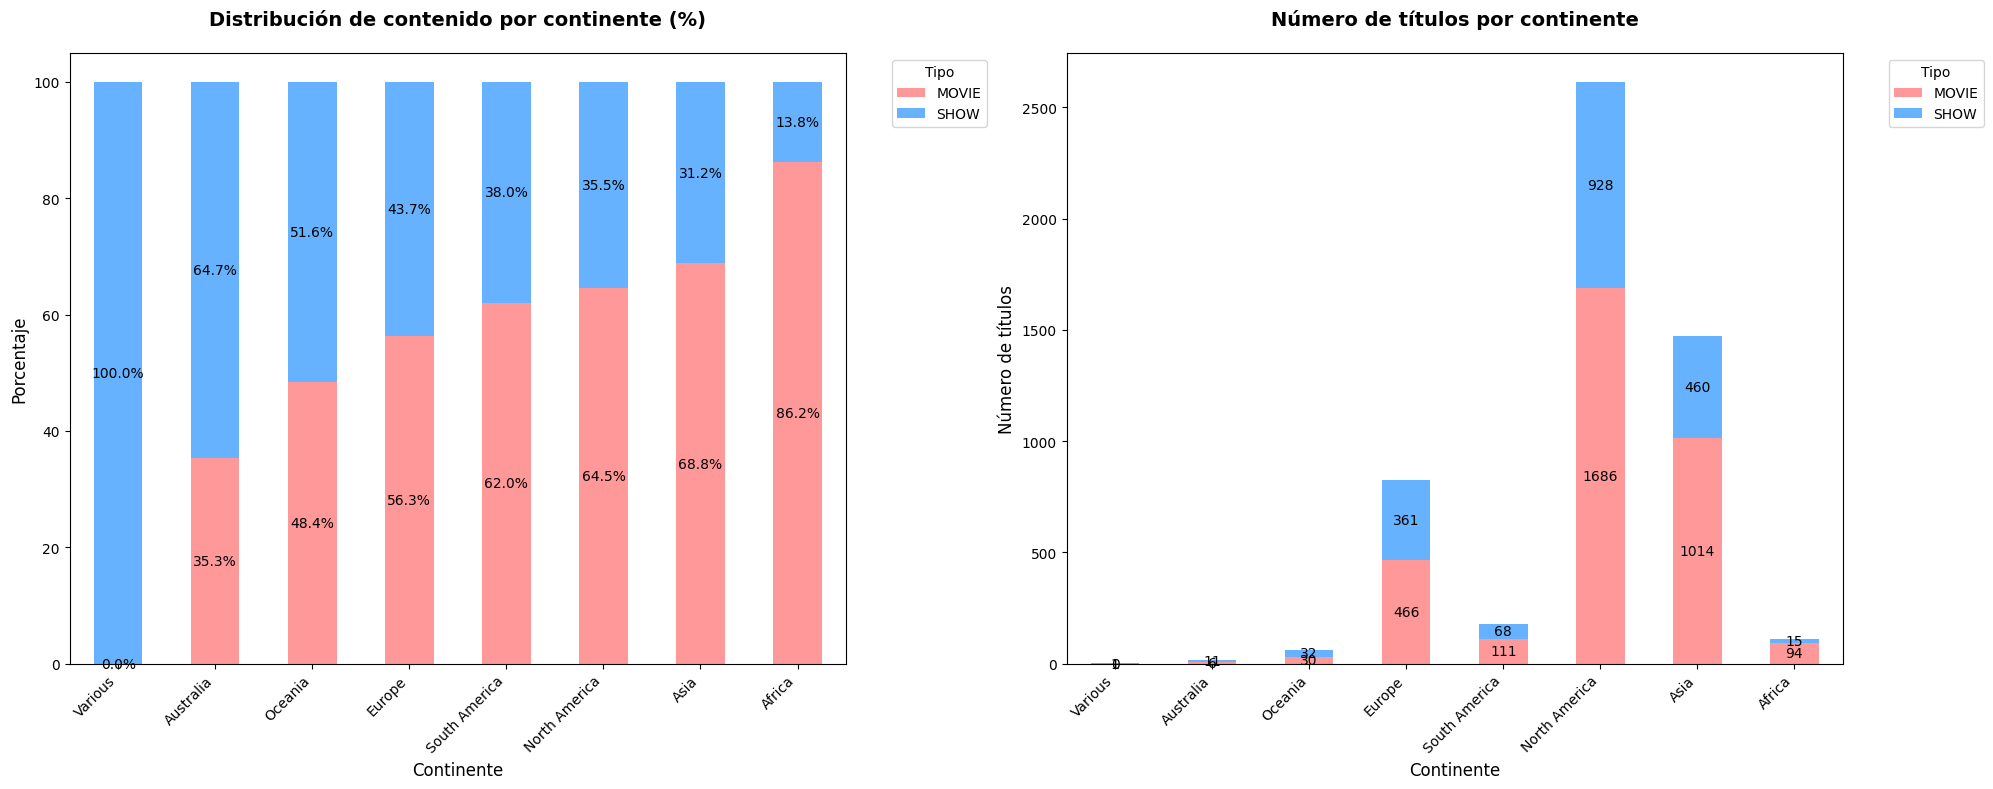

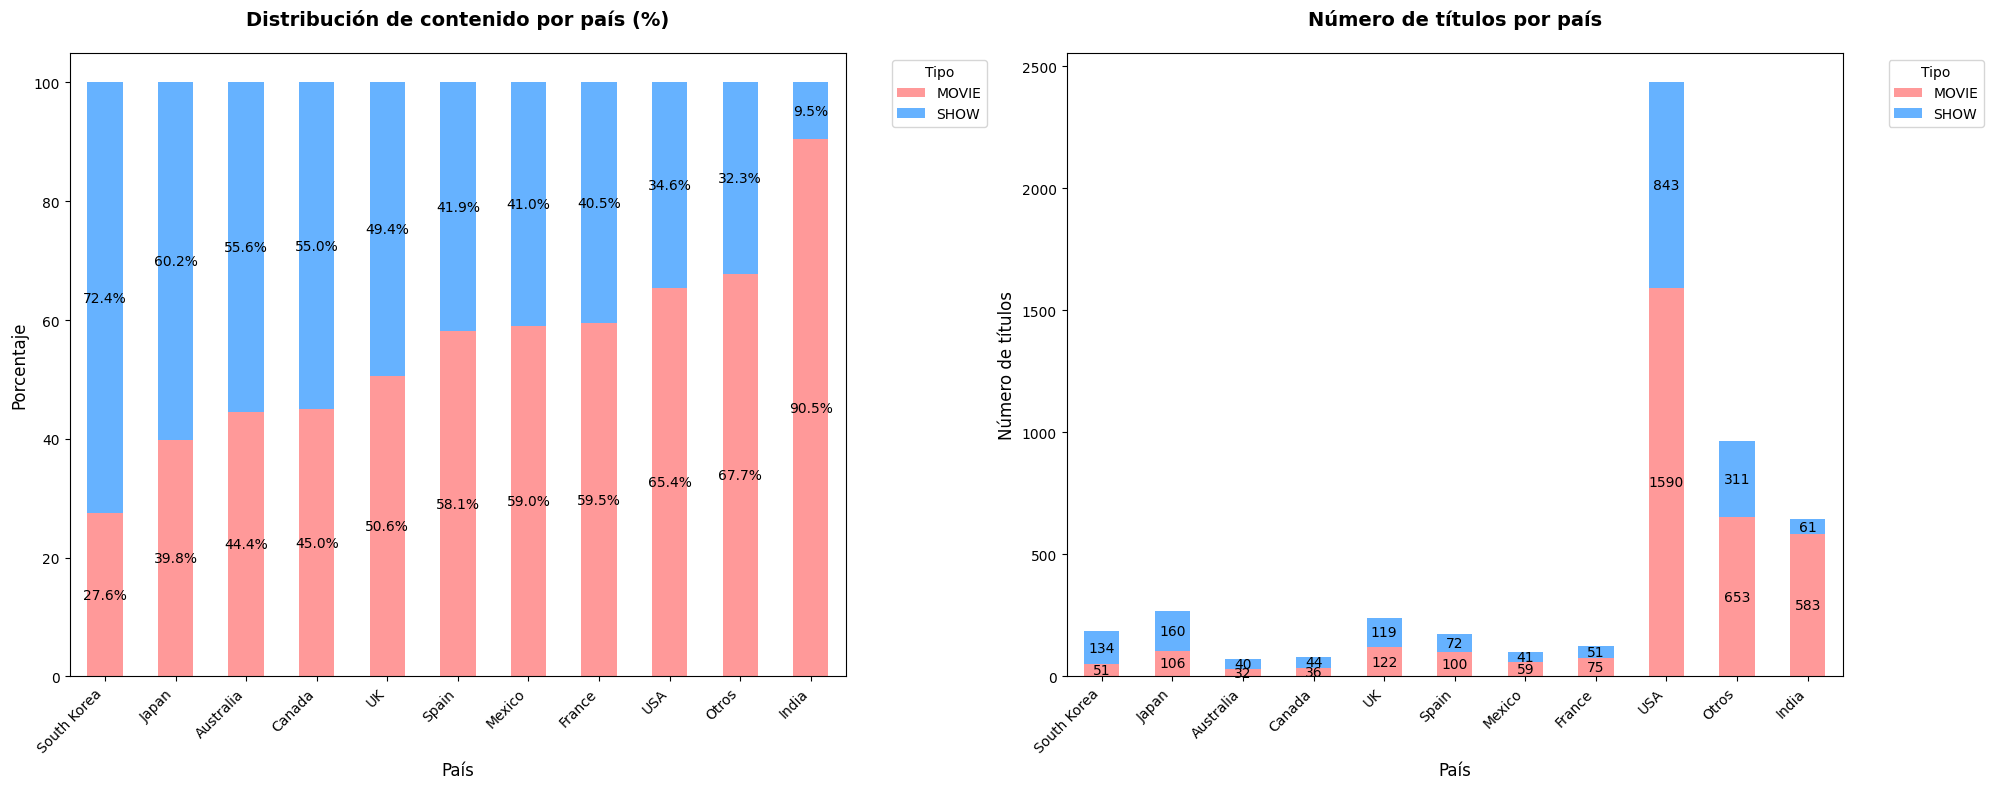

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set basic style and color palette
plt.style.use('default')  
colors = ['#FF9999', '#66B2FF']  # Red for movies, Blue for shows

# CONTINENTS PLOTS
# Create cross-tabulation
continent_genre = pd.crosstab(df['Continent'], df['type'])

# Calculate percentages
continent_pct = continent_genre.div(continent_genre.sum(axis=1), axis=0) * 100

# Sort by percentage of SHOW
continent_order = continent_pct['SHOW'].sort_values(ascending=False).index

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Percentage plot
continent_pct.loc[continent_order].plot(kind='bar', stacked=True, color=colors, ax=ax1)
ax1.set_title('Distribución de contenido por continente (%)', pad=20, size=14, weight='bold')
ax1.set_xlabel('Continente', size=12)
ax1.set_ylabel('Porcentaje', size=12)
ax1.tick_params(axis='x', rotation=45)
ax1.set_xticklabels(ax1.get_xticklabels(), ha='right')

# Add percentage labels
for c in ax1.containers:
    ax1.bar_label(c, fmt='%.1f%%', label_type='center')

# Absolute values plot
continent_genre.loc[continent_order].plot(kind='bar', stacked=True, color=colors, ax=ax2)
ax2.set_title('Número de títulos por continente', pad=20, size=14, weight='bold')
ax2.set_xlabel('Continente', size=12)
ax2.set_ylabel('Número de títulos', size=12)
ax2.tick_params(axis='x', rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), ha='right')

# Add value labels
for c in ax2.containers:
    ax2.bar_label(c, fmt='%d', label_type='center')

# Adjust legend and layout
ax1.legend(title='Tipo', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.legend(title='Tipo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# COUNTRIES PLOTS
# Get top 10 countries by absolute number of shows
country_genre = pd.crosstab(df['Country'], df['type'])
top_10_countries = country_genre['SHOW'].nlargest(10).index

# Create 'Others' category
others_data = country_genre.loc[~country_genre.index.isin(top_10_countries)].sum()

# Combine top 10 and Others for both absolute and percentage plots
country_genre_filtered = pd.concat([
    country_genre.loc[top_10_countries],
    pd.DataFrame(others_data).T.rename(index={0: 'Otros'})
])

# Calculate percentages
country_genre_pct = country_genre_filtered.div(country_genre_filtered.sum(axis=1), axis=0) * 100

# Sort by percentage of shows
country_order = country_genre_pct['SHOW'].sort_values(ascending=False).index

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Percentage plot
country_genre_pct.loc[country_order].plot(kind='bar', stacked=True, color=colors, ax=ax1)
ax1.set_title('Distribución de contenido por país (%)', pad=20, size=14, weight='bold')
ax1.set_xlabel('País', size=12)
ax1.set_ylabel('Porcentaje', size=12)
ax1.tick_params(axis='x', rotation=45)
ax1.set_xticklabels(ax1.get_xticklabels(), ha='right')

# Add percentage labels
for c in ax1.containers:
    ax1.bar_label(c, fmt='%.1f%%', label_type='center')

# Absolute values plot
country_genre_filtered.loc[country_order].plot(kind='bar', stacked=True, color=colors, ax=ax2)
ax2.set_title('Número de títulos por país', pad=20, size=14, weight='bold')
ax2.set_xlabel('País', size=12)
ax2.set_ylabel('Número de títulos', size=12)
ax2.tick_params(axis='x', rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), ha='right')

# Add value labels
for c in ax2.containers:
    ax2.bar_label(c, fmt='%d', label_type='center')

# Adjust legend and layout
ax1.legend(title='Tipo', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.legend(title='Tipo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [18]:
def calculate_content_stats(df, category_col):
    content_counts = pd.crosstab(df[category_col], df['type'])
    
    content_pct = content_counts.div(content_counts.sum(axis=1), axis=0) * 100
    
    stats_df = pd.DataFrame({
        f'Porcentaje de Shows (%)': content_pct['SHOW'].round(1),
        f'Porcentaje de Movies (%)': content_pct['MOVIE'].round(1),
        f'Total Shows': content_counts['SHOW'],
        f'Total Movies': content_counts['MOVIE']
    })
    
    return stats_df

country_stats = calculate_content_stats(df, 'Country')

top_10_mask = country_stats['Total Shows'].nlargest(10).index
others_counts = country_stats.loc[~country_stats.index.isin(top_10_mask)].sum()

country_stats_final = pd.concat([
    country_stats.loc[top_10_mask],
    pd.DataFrame([others_counts], index=['Otros'])
])

total_row = country_stats_final[['Total Shows', 'Total Movies']].sum()
country_stats_final['Porcentaje de Shows (%)'] = (country_stats_final['Total Shows'] / (country_stats_final['Total Shows'] + country_stats_final['Total Movies']) * 100).round(1)
country_stats_final['Porcentaje de Movies (%)'] = (country_stats_final['Total Movies'] / (country_stats_final['Total Shows'] + country_stats_final['Total Movies']) * 100).round(1)

# Sort by total shows
country_stats_final = country_stats_final.sort_values('Total Shows', ascending=False)


continent_stats = calculate_content_stats(df, 'Continent')
continent_stats = continent_stats.sort_values('Total Shows', ascending=False)


continent_stats

Porcentaje de Shows (%)  Porcentaje de Movies (%)  Total Shows  \
Continent                                                                       
North America                     35.5                      64.5          928   
Asia                              31.2                      68.8          460   
Europe                            43.7                      56.3          361   
South America                     38.0                      62.0           68   
Oceania                           51.6                      48.4           32   
Africa                            13.8                      86.2           15   
Australia                         64.7                      35.3           11   
Various                          100.0                       0.0            1   

               Total Movies  
Continent                    
North America          1686  
Asia                   1014  
Europe                  466  
South America           111  
Oceania                  30  
Africa                   94  
Australia                 6  
Various                   0

In [19]:
country_stats_final

Porcentaje de Shows (%)  Porcentaje de Movies (%)  Total Shows  \
USA                             34.6                      65.4        843.0   
Otros                           32.3                      67.7        311.0   
Japan                           60.2                      39.8        160.0   
South Korea                     72.4                      27.6        134.0   
UK                              49.4                      50.6        119.0   
Spain                           41.9                      58.1         72.0   
India                            9.5                      90.5         61.0   
France                          40.5                      59.5         51.0   
Canada                          55.0                      45.0         44.0   
Mexico                          41.0                      59.0         41.0   
Australia                       55.6                      44.4         40.0   

             Total Movies  
USA                1590.0  
Otros               653.0  
Japan               106.0  
South Korea          51.0  
UK                  122.0  
Spain               100.0  
India               583.0  
France               75.0  
Canada               36.0  
Mexico               59.0  
Australia            32.0

La distribución de type (MOVIE o SHOW) la presentamos en gráfico y tabla por países y continentes. Podemos pensar viendo estos gráficos, sobre los países presentes en el top 10 de contenidos: 

- América del norte representa una alta proporción del contenido del dataset : Las películas siguien siendo un factor dominante pero también teniendo en cuenta que Netflix posiblemente cuente en su catálogo con una serie de películas con más de 20 años de antiguedad mientras que el auge de las series es más reciente. El aporte de Canadá es bastante limitado en comparación aunque se encuentra en el top 10 de países que más contenido aportan. México está incluido como North America. Podemos ver como en este dataset aporta 41 shows al total, pero 59 películas. En el total de habla hispana podemos analizar si las series tienen más impacto que las películas en conjunto. 

- Asia: El porcentaje de películas en Asia es aún mayor . Podemos ver por países unos datos más matizados. India aporta la mayor parte de títulos asiáticos al cojunto de datos y en este caso es un 90.5% de películas pero por otro lado vemos como en el caso de Japón el porcentaje es del 39.8%, mucho menor, posiblemente por la influencia de la animación en el conjunto de shows. El porcentaje de Corea del Sur de películas es solo del 27.6% ya que el país ha contribuido a la plataforma con K-dramas o series coreanas que han tenido mucho éxito en los últimos años como Squid Game. 

- Europa : El mercado europeo es muy heterogéneo. Netflix en cada país tiene una relación muy idiosincrática con el mismo. Podemos ver como UK, España y Francia son los países europeos que se encuentran entre los 10 países que más aportan individualmente al conjunto. La primera producción propia de Netflix en España fue "Las Chicas del Cable" en 2017. En Francia la serie "Marseille" en 2015. En el caso de UK fue "The Crown" anunciada en 2014. Es decir, en estos años arranca la producción propia de la plataforma en sus operaciones Europeas. Un anñaliss desde 2014 en el caso de Europa puede ser interesante. 

- Australia: Como país por su lado tiene un volumen de títulos en el catálogo similar a UK o Corea del Sur. 55.6% de shows y 44.4% de películas no indica que haya una tendencia muy fuerte hacia un lado o al otro. La plataforma desembarcó en Australia en 2015, pero su primera producción original es del 2018, "Tidelands". 



https://es.wikipedia.org/wiki/Anexo:Producciones_originales_de_Netflix_en_Espa%C3%B1a

https://www.hollywoodreporter.com/tv/tv-news/netflix-orders-first-french-original-728789/

https://www.independent.co.uk/arts-entertainment/tv/news/netflix-set-to-produce-first-original-uk-series-about-the-queen-9425267.html

https://www.vogue.com.au/culture/features/netflix-announces-its-first-australian-series/news-story/801ca52bc868486066adf2274158b054



<Figure size 1400x1000 with 0 Axes>

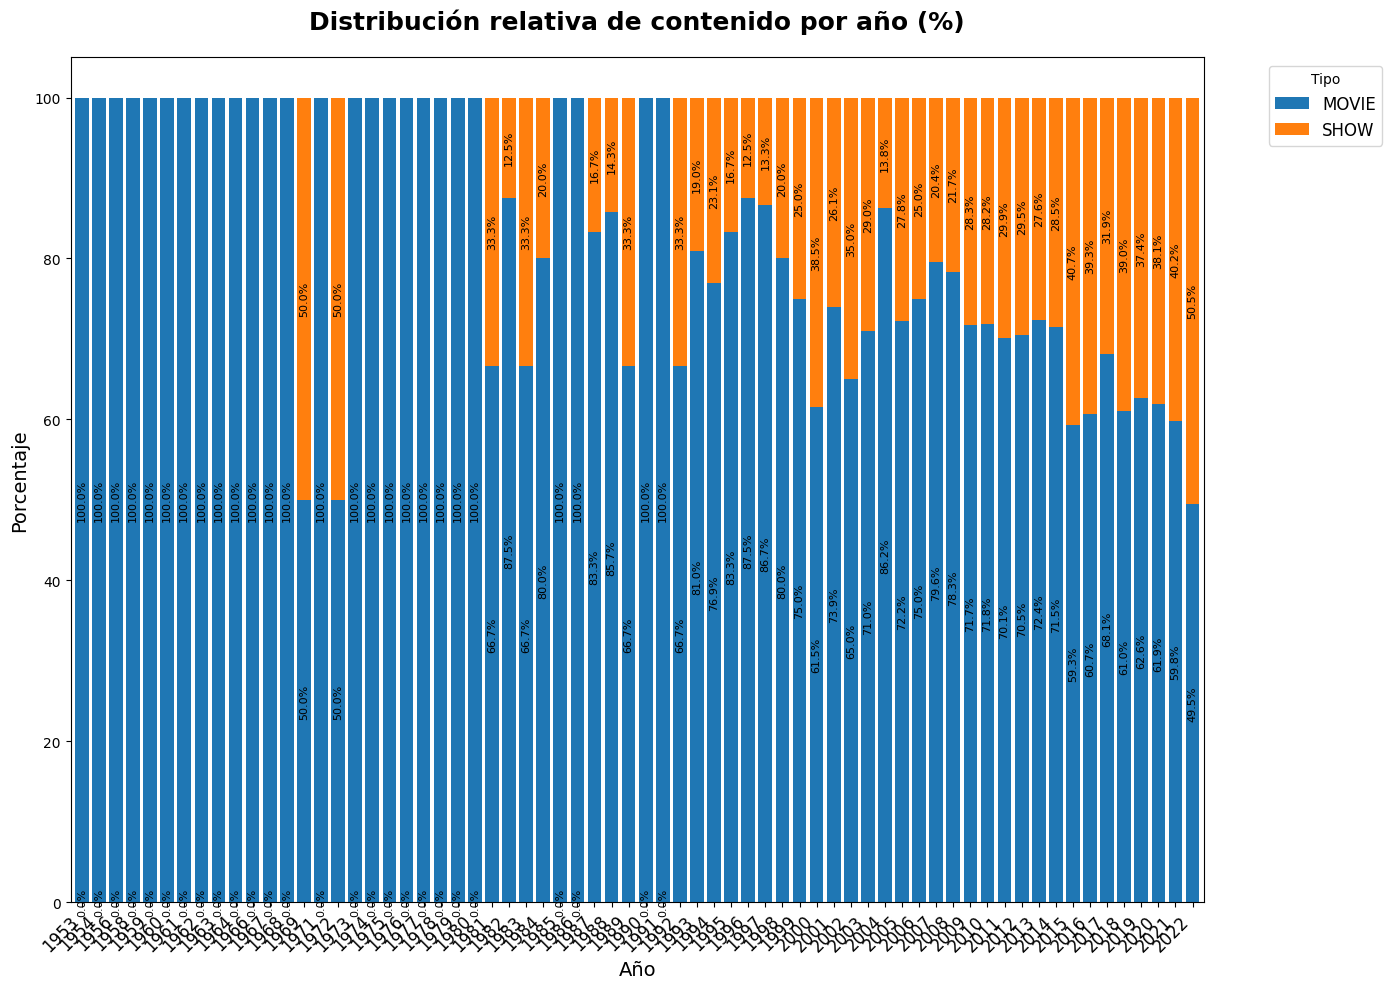

In [28]:

yearly_distribution = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)

yearly_distribution_pct = yearly_distribution.div(yearly_distribution.sum(axis=1), axis=0) * 100

colors = ['#1f77b4', '#ff7f0e']  

plt.figure(figsize=(14, 10)) 
ax = yearly_distribution_pct[['MOVIE', 'SHOW']].plot(
    kind='bar',
    stacked=True,
    color=colors,
    width=0.8,  
    figsize=(14, 10) 
)

plt.title('Distribución relativa de contenido por año (%)', pad=20, size=18, weight='bold')
plt.xlabel('Año', size=14)
plt.ylabel('Porcentaje', size=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=8, rotation=90)  # Reducimos el tamaño de las etiquetas

plt.legend(title='Tipo', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()



La voluciónd el gráfico parece confirmar una tendencia global hacia un moderado impacto de las series en el total de productos del catálogo. Antes de Netflix contar con producción propia ("House of Cards" en 2013 fue su primera producción) las series en el periodo de operaciones de Netflixno llegaban al 30% del contenido y después de este cambio por ejemplo en 2015 alcanzan el 40.7% de las incorporaciones al catálogo y la tendencia se estabiliza al rededor del 40%. Sobre 2022 los datos son incompletos. Vamos a ver la evolución en Europa a partir de 2014 (en el inicio de las producciones propias de Netflix)

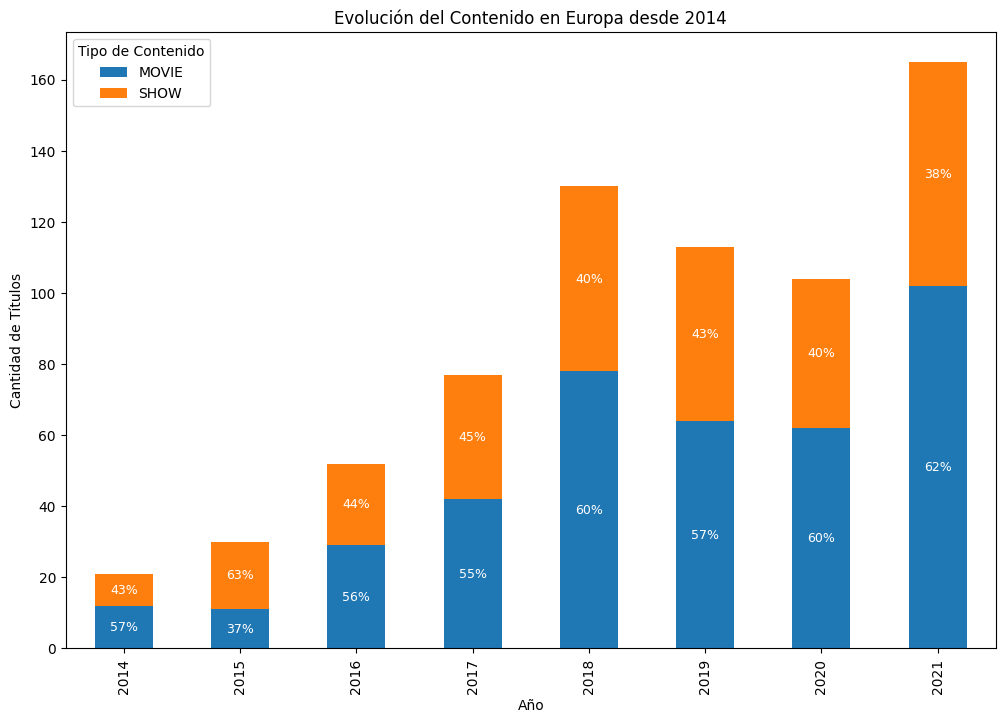

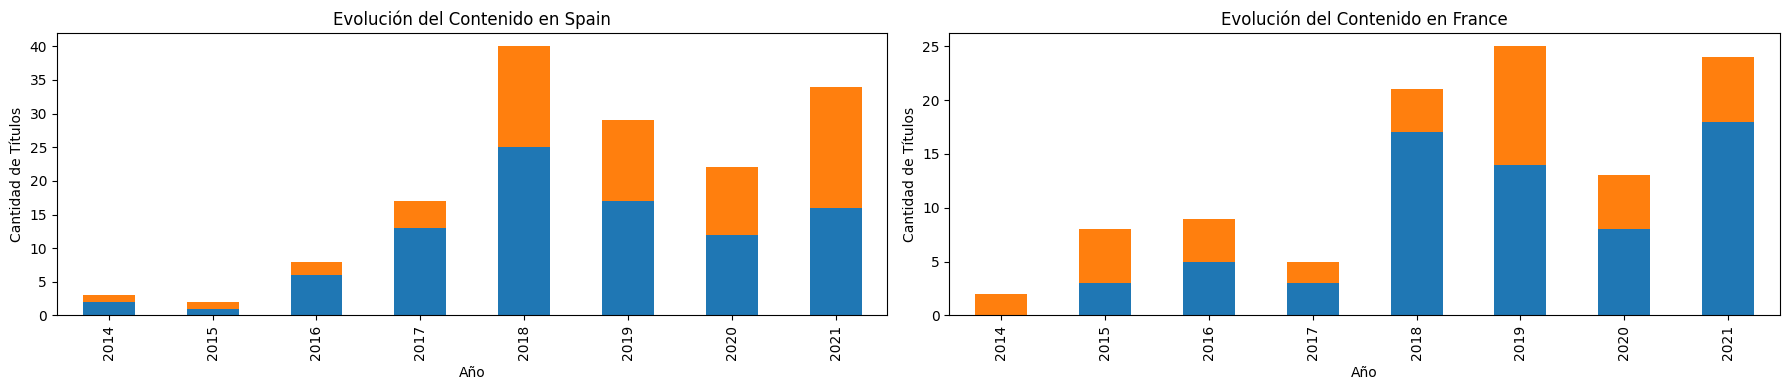

In [ ]:
df_europe_post_2014 = df[(df['Continent'] == 'Europe') & (df['release_year'] >= 2014) & (df['release_year'] <= 2021)]
content_by_year_europe = df_europe_post_2014.groupby(['release_year', 'type']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(12, 8))
content_by_year_europe.plot(kind='bar', stacked=True, ax=ax, color=['tab:blue', 'tab:orange'])
ax.set_title('Evolución del Contenido en Europa desde 2014')
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de Títulos')
ax.legend(title='Tipo de Contenido')

for i, (year, row) in enumerate(content_by_year_europe.iterrows()):
    total = row.sum()
    for j, (content_type, count) in enumerate(row.items()):
        ax.text(i, row[:j+1].sum() - count/2, f"{count/total:.0%}", ha="center", va="center", color="white", fontsize=9)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4))

for ax, country, color in zip([ax1, ax2], ['Spain', 'France'], ['tab:blue', 'tab:orange']):
    country_data = df_europe_post_2014[df_europe_post_2014['Country'] == country]
    country_content_by_year = country_data.groupby(['release_year', 'type']).size().unstack(fill_value=0)
    country_content_by_year.plot(kind='bar', stacked=True, ax=ax, color=['tab:blue', 'tab:orange'])
    ax.set_title(f'Evolución del Contenido en {country}')
    ax.set_xlabel('Año')
    ax.set_ylabel('Cantidad de Títulos')
    ax.legend().remove()

plt.tight_layout()
plt.show()

Desde los años de lanzamiento de contenido propio en cada país la tendencia ha sido evidentemente a incrementar notable. 

Podemos ver como la pandemia del COVID-19 tuvo un impacto directo en la cantidad de vontenidos. 

En relación a la porporción de películas y series podemos observar que en 2021 las series se encuentran al 38%, en línea con el 40.2% global. En las proporciones de España y Francia vemos como en España hay una proporción más alta de series que en Francia posiblemente debido a una cultura o tradición específica de la industria audiovisual francesa en la que las películas tienen un peso más importante que las series. Por otro lado en España en los últimos años las series han sido un reclamo importante para Neflix por ello la propoción que podemos ver. 

A continuación vamos a hacer un análisis del contenido en relación al runtime:

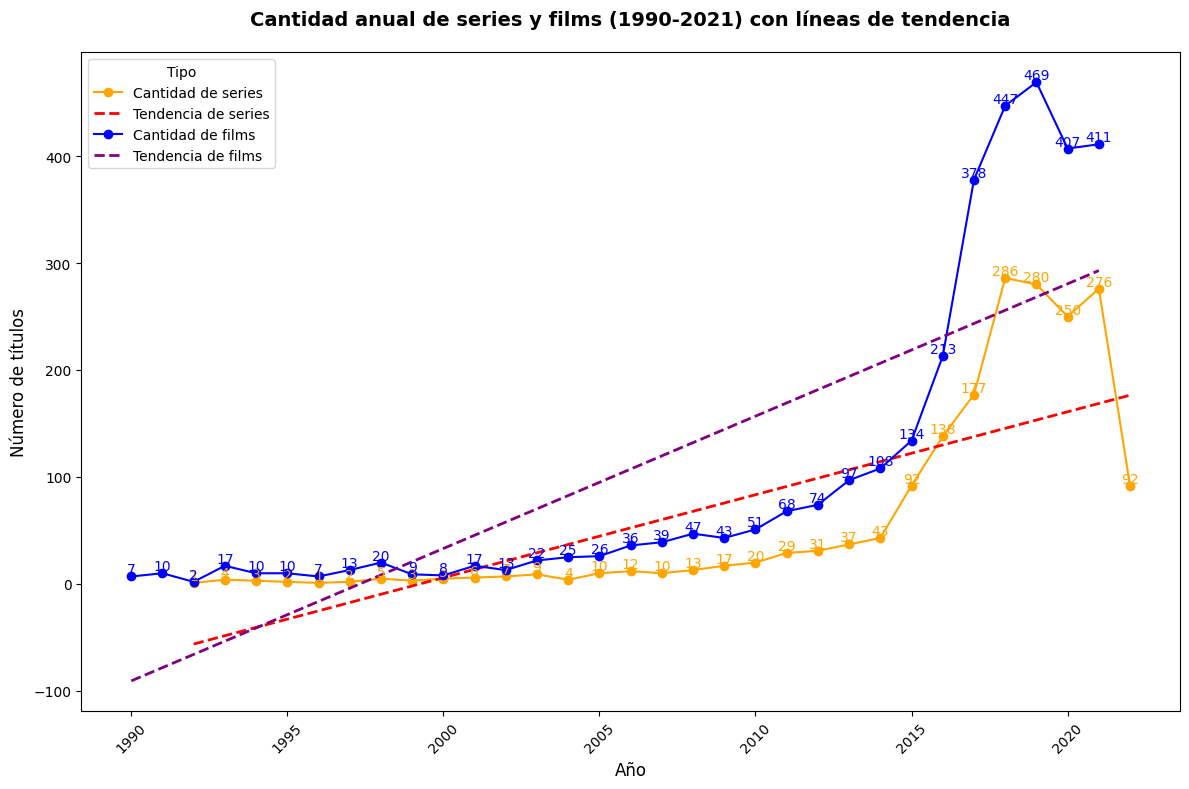

In [ ]:
yearly_movie_distribution = df[df['type'] == 'MOVIE'].groupby('release_year').size()
yearly_movie_distribution = yearly_movie_distribution.loc[1990:2021]

years_movie = yearly_movie_distribution.index
slope_movie, intercept_movie, _, _, _ = linregress(years_movie, yearly_movie_distribution)
trend_movie = slope_movie * years_movie + intercept_movie

plt.figure(figsize=(12, 8))
plt.plot(years_show, yearly_show_distribution, marker='o', color='orange', label='Cantidad de series')
plt.plot(years_show, trend_show, color='red', linestyle='--', linewidth=2, label='Tendencia de series')
plt.plot(years_movie, yearly_movie_distribution, marker='o', color='blue', label='Cantidad de films')
plt.plot(years_movie, trend_movie, color='purple', linestyle='--', linewidth=2, label='Tendencia de films')

plt.title('Cantidad anual de series y films (1990-2021) con líneas de tendencia', pad=20, size=14, weight='bold')
plt.xlabel('Año', size=12)
plt.ylabel('Número de títulos', size=12)
plt.xticks(rotation=45)

for year, value in zip(years_show, yearly_show_distribution):
    plt.text(year, value, f'{value}', ha='center', va='bottom', color='orange')
for year, value in zip(years_movie, yearly_movie_distribution):
    plt.text(year, value, f'{value}', ha='center', va='bottom', color='blue')

plt.legend(title='Tipo', loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
total_movies = df[df['type'] == 'MOVIE'].shape[0]
total_shows = df[df['type'] == 'SHOW'].shape[0]

movies_post_2000 = df[(df['type'] == 'MOVIE') & (df['release_year'] > 2000)].shape[0]
shows_post_2000 = df[(df['type'] == 'SHOW') & (df['release_year'] > 2000)].shape[0]

percentage_movies_post_2000 = (movies_post_2000 / total_movies) * 100
percentage_shows_post_2000 = (shows_post_2000 / total_shows) * 100

percentage_df = pd.DataFrame({
    'Tipo': ['MOVIE', 'SHOW'],
    'Total': [total_movies, total_shows],
    'Total post 2000': [movies_post_2000, shows_post_2000],
    'Porcentaje post 2000 (%)': [percentage_movies_post_2000, percentage_shows_post_2000]
})

total_content = total_movies + total_shows
total_content_post_2000 = movies_post_2000 + shows_post_2000

percentage_total_post_2000 = (total_content_post_2000 / total_content) * 100

percentage_df.loc[2] = ['MOVIE + SHOW', total_content, total_content_post_2000, percentage_total_post_2000]

percentage_df


Tipo  Total  Total post 2000  Porcentaje post 2000 (%)
0         MOVIE   3407             3215                 94.364544
1          SHOW   1876             1839                 98.027719
2  MOVIE + SHOW   5283             5054                 95.665342

Podemos ver con este gráfico y este dataset que en el catálogo de Netflix ofrecido en el dataset la mayor parte de productos han sido estrenados a partir de los años 2000. En los últimos 10 años la producción propia de Netflix ha hecho subir estos números de gran manera. El pico del último año hace pensar que los datos del mismo no están completos. La línea de tendencia parece ascendente y los números de la plataforma parecen indicar que en efecto cada vez el número de contenidos irá creciendo de forma rápida ya que la empresa cada vez está emprendiendo producciones propias en nuevos territorios. 

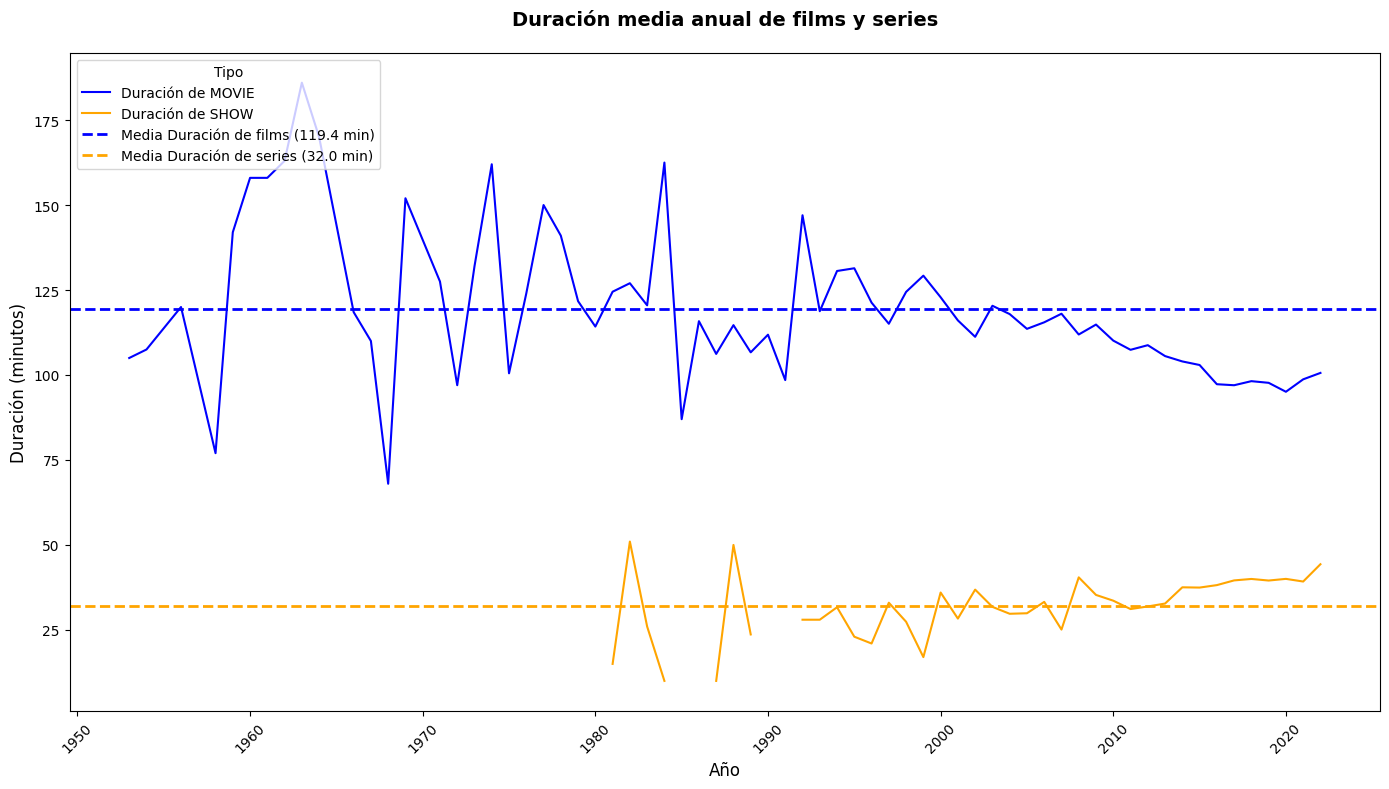

In [ ]:
yearly_runtime = df.groupby(['release_year', 'type'])['runtime'].mean().unstack()

mean_movie_runtime = yearly_runtime['MOVIE'].mean()
mean_show_runtime = yearly_runtime['SHOW'].mean()

plt.figure(figsize=(14, 8))
yearly_runtime['MOVIE'].plot(color='blue', label='Duración de MOVIE')
yearly_runtime['SHOW'].plot(color='orange', label='Duración de SHOW')

plt.axhline(mean_movie_runtime, color='blue', linestyle='--', linewidth=2, label=f'Media Duración de films ({mean_movie_runtime:.1f} min)')
plt.axhline(mean_show_runtime, color='orange', linestyle='--', linewidth=2, label=f'Media Duración de series ({mean_show_runtime:.1f} min)')

plt.title('Duración media anual de films y series', pad=20, size=14, weight='bold')
plt.xlabel('Año', size=12)
plt.ylabel('Duración (minutos)', size=12)
plt.xticks(rotation=45)
plt.legend(title='Tipo', loc='upper left')
plt.tight_layout()
plt.show()



Viendo la media de las películas y series por años podemos ver como las películas parece que tienen una tendencia descendiente en los últimos años en el catálogo de Neflix presentado en el df y las series en cambio van en aumento. Los capítulos de las series cada vez son más largos hasta hoy en día ser unos 50 minutos. Las películas por su lado podemos ver como por ejemplo las películas antiguas pueden estar estirando mucho la media para arriba. En los últimos años hemos visto que las películas de acción o superhéroes tipo Marvel han vuelto a levantar el runtime de las películas comerciales pero es posible que películas cortas de animación o para niños estén provocando este descenso de la media. Vamos a verlo más de cerca. 

<Figure size 800x1500 with 0 Axes>

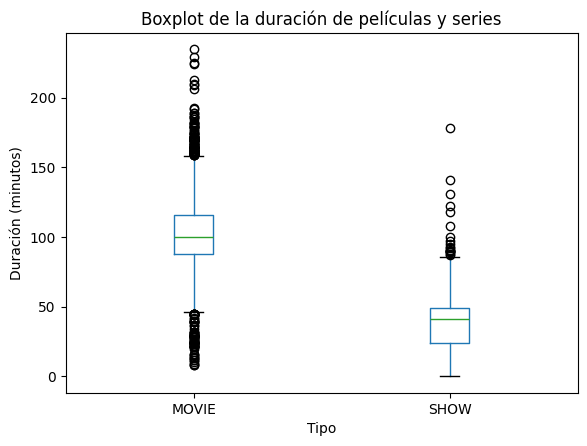

In [ ]:
plt.figure(figsize=(8, 15))
df.boxplot(column='runtime', by='type', grid=False)
plt.title('Boxplot de la duración de películas y series')
plt.suptitle('')
plt.xlabel('Tipo')
plt.ylabel('Duración (minutos)')
plt.show()


Con este boxplot podemos ver como hay una serie de películas que parecen ser especialmente cortas y otras tantas que superan las dos horas y media de duración. En las series, aunque la caja está en un rango de duración común para series también vemos outliers que rozan las 4 horas. Vamos a estudiar estos casos a continuación. 

In [ ]:
# Vamos a ver que pasa con las películas cortas. 
peliculas_cortas = df[(df['type'] == 'MOVIE') & (df['runtime'] < 50)].sort_values(by='runtime', ascending=True)

peliculas_cortas.head(5)


index                                            title   type  \
4911   4911  The Hand of God: Through the Eyes of Sorrentino  MOVIE   
4257   4257                                 Cops and Robbers  MOVIE   
5152   5152                  The Characters of the Continent  MOVIE   
2669   2669                                     The Crossing  MOVIE   
5102   5102                                      Cat Burglar  MOVIE   

                                            description  release_year  \
4911  Director Paolo Sorrentino returns to Naples, h...          2021   
4257  Animation and activism unite in this multimedi...          2020   
5152  With the cast and creator as your guides, expl...          2021   
2669  Three Palestinian siblings eagerly attempt to ...          2017   
5102  In this edgy, over-the-top, interactive trivia...          2022   

     age_certification  runtime  imdb_score  imdb_votes       genre1  \
4911               NaN        8         7.0         7.0  Documentary   
4257             PG-13        8         6.9         NaN  Documentary   
5152               NaN        9         6.6        56.0  Documentary   
2669               NaN       10         7.5         NaN        Drama   
5102             PG-13       12         6.9         NaN    Animation   

                  genre2 Country      Continent Language  
4911           Biography   Italy         Europe  Italian  
4257               Crime     USA  North America  English  
5152   Behind the Scenes  France         Europe  English  
2669                 NaN     USA  North America  English  
5102         Interactive     USA  North America  English

Parece que son corotmetrajes por lo que podemos ver o contenidos adicionales a una película, vamos a ver los géneros. 

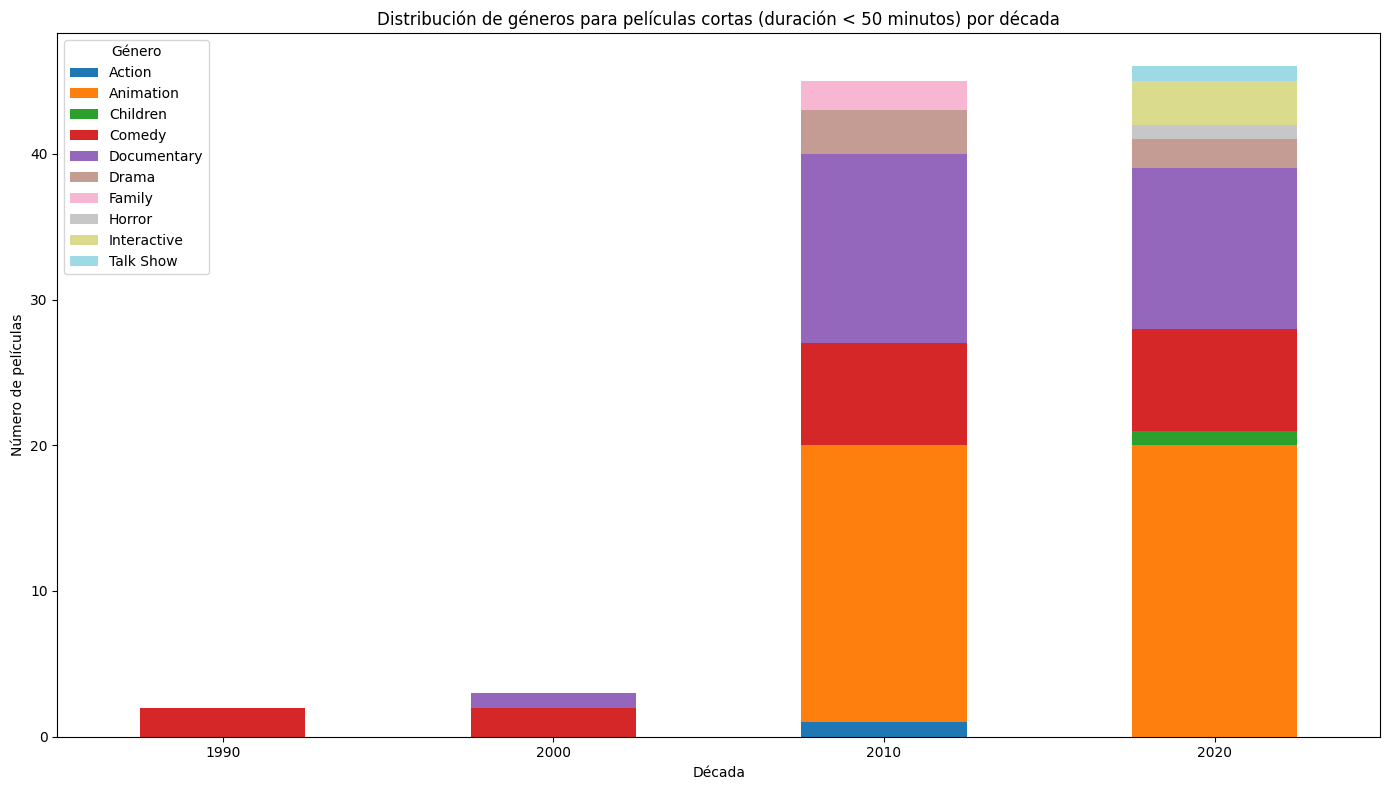

In [ ]:
peliculas_cortas['decade'] = (peliculas_cortas['release_year'] // 10) * 10

short_movies_decade_genre = peliculas_cortas.groupby(['decade', 'genre1']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
short_movies_decade_genre.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())
plt.title('Distribución de géneros para películas cortas (duración < 50 minutos) por década')
plt.xlabel('Década')
plt.ylabel('Número de películas')
plt.xticks(rotation=0)  

plt.legend(title='Género')
plt.tight_layout()
plt.show()


Este gráfico nos deja ver que claramente ha habido un ascenso de las películas de animación de los últimos años que hacen bajar la media de la duración de lo que el dataset considera MOVIE. Los documentales etiquetados como película también son buena parte de las películas de los años 10. También los especiales de comedia están considerados como MOVIE y desde los 90 que han tenido una pequeña presencia. 

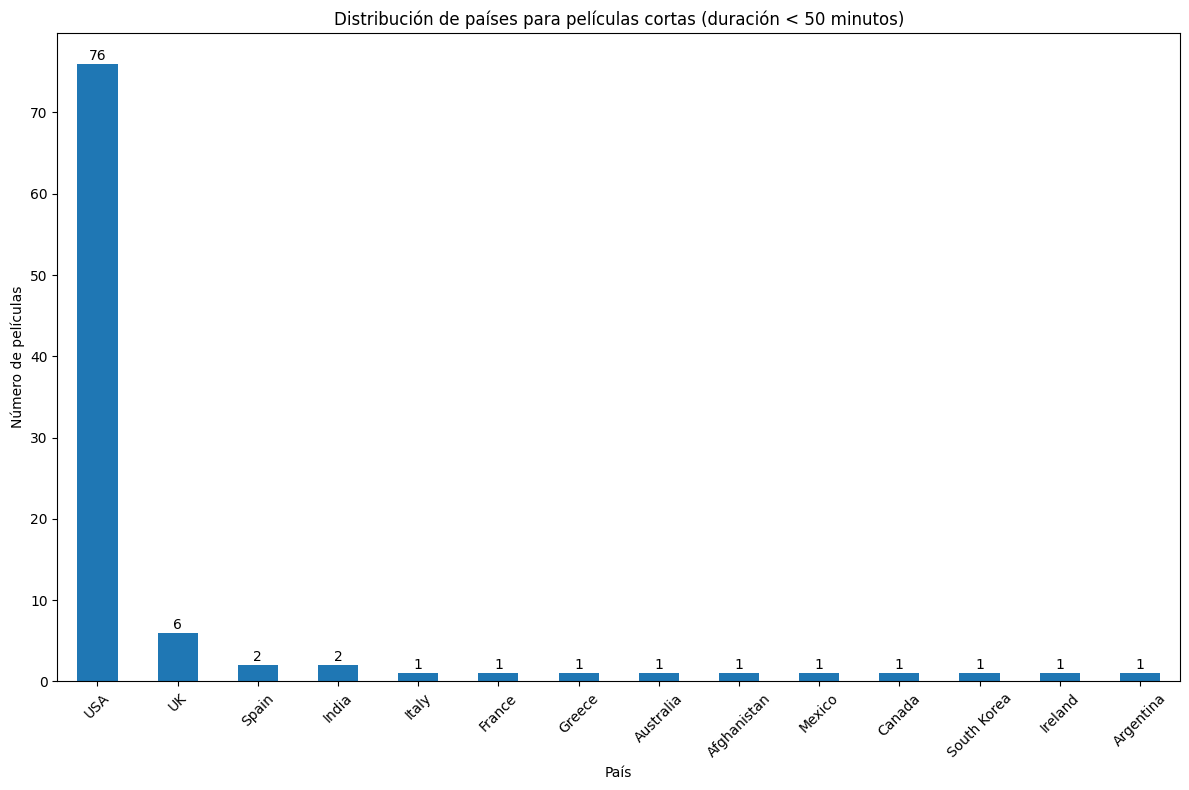

In [ ]:
country_distribution_short_movies = peliculas_cortas['Country'].value_counts()

plt.figure(figsize=(12, 8))
country_distribution_short_movies.plot(kind='bar')
plt.title('Distribución de países para películas cortas (duración < 50 minutos)')
plt.xlabel('País')
plt.ylabel('Número de películas')
plt.xticks(rotation=45) 

for i, count in enumerate(country_distribution_short_movies):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


La fracción más importante de películas cortas en Netflix se debe a títulos de Estados Unidos, vamos a ver si la animación, los títulos de comedia o el documental tienen ese impacto distribuido : 

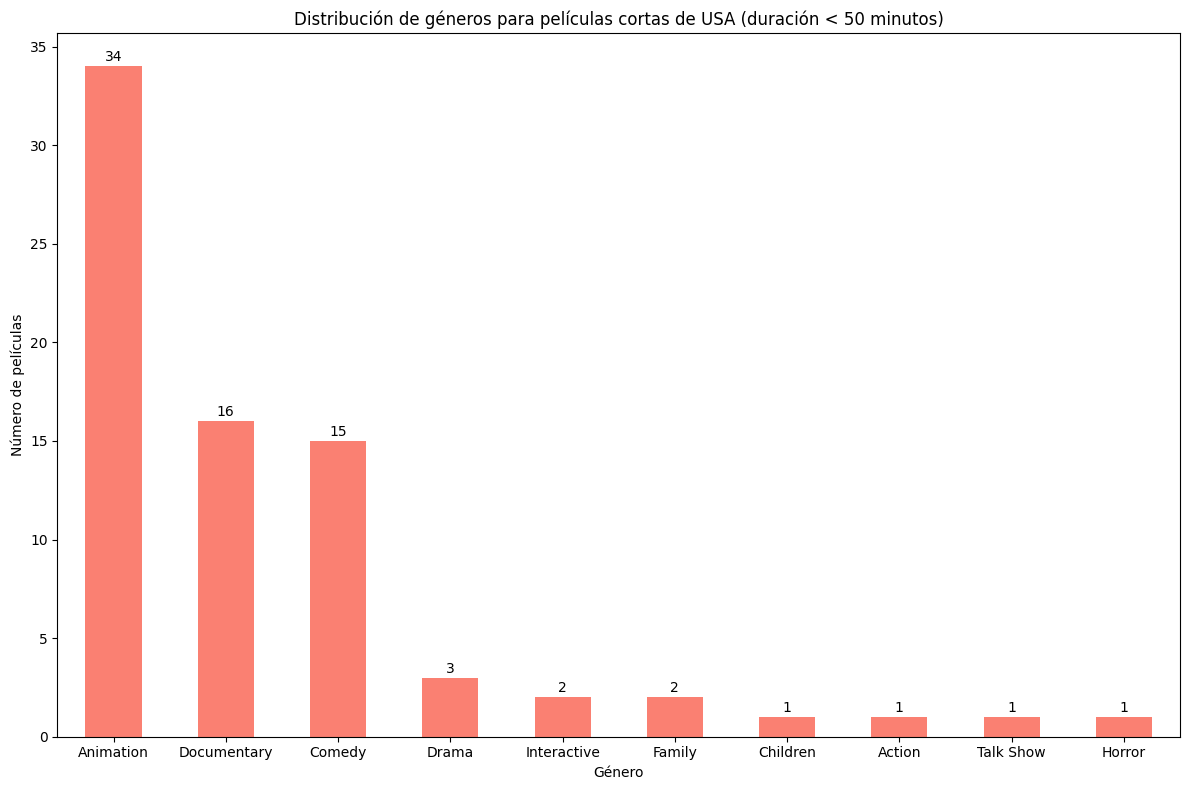

In [ ]:
short_movies_usa = peliculas_cortas[peliculas_cortas['Country'] == 'USA']

genre_distribution_short_movies_usa = short_movies_usa['genre1'].value_counts()

plt.figure(figsize=(12, 8))
genre_distribution_short_movies_usa.plot(kind='bar', color='salmon')
plt.title('Distribución de géneros para películas cortas de USA (duración < 50 minutos)')
plt.xlabel('Género')
plt.ylabel('Número de películas')
plt.xticks(rotation=0)  

for i, count in enumerate(genre_distribution_short_movies_usa):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Podemos ver como en efecto animación, documentales y comedia son la mayor parte de estas películas cortas. Podríamos pensar que la mayor parte de estas películas de animación van dirigidas a un público infantil como la de children y posiblemente las de family. Talk show es un formato corto más que una película quizás debería etiquetarse como show.  


Vamos a ver ahora que información podemos obtener sobre las películas largas: 

In [ ]:
# Ahora con las películas muy largas : 

peliculas_largas = df[(df['type'] == 'MOVIE') & (df['runtime'] > 150)].sort_values(by='runtime', ascending=False)

peliculas_largas.head(5)

index                              title   type  \
24      24                     No Longer Kids  MOVIE   
45      45        Once Upon a Time in America  MOVIE   
495    495                A Lion in the House  MOVIE   
378    378  Lagaan: Once Upon a Time in India  MOVIE   
428    428                       Jodhaa Akbar  MOVIE   

                                           description  release_year  \
24   By coincidence, Ahmad discovers that his fathe...          1979   
45   A former Prohibition-era Jewish gangster retur...          1984   
495  Five families struggle with the ups and downs ...          2006   
378  In 1890s India, an arrogant British commander ...          2001   
428  Jodhaa Akbar is a sixteenth century love story...          2008   

    age_certification  runtime  imdb_score  imdb_votes       genre1   genre2  \
24                NaN      235         9.0       943.0        Drama   Comedy   
45                  R      229         8.3    342335.0        Crime    Drama   
495               NaN      225         8.7       312.0  Documentary      NaN   
378                PG      224         8.1    111053.0    Adventure    Drama   
428             PG-13      213         7.5     32188.0    Biography    Drama   

    Country      Continent Language  duration  
24    Egypt         Africa   Arabic       152  
45      USA  North America  English       112  
495     USA  North America  English        83  
378   India           Asia    Hindi        85  
428   India           Asia    Hindi       102

No Longer Kids es la película más larga, parece que en efecto dura 235 minutos.Vamos a hacer un gráfico por décadas para ver si podemos identificar algún patrón : 

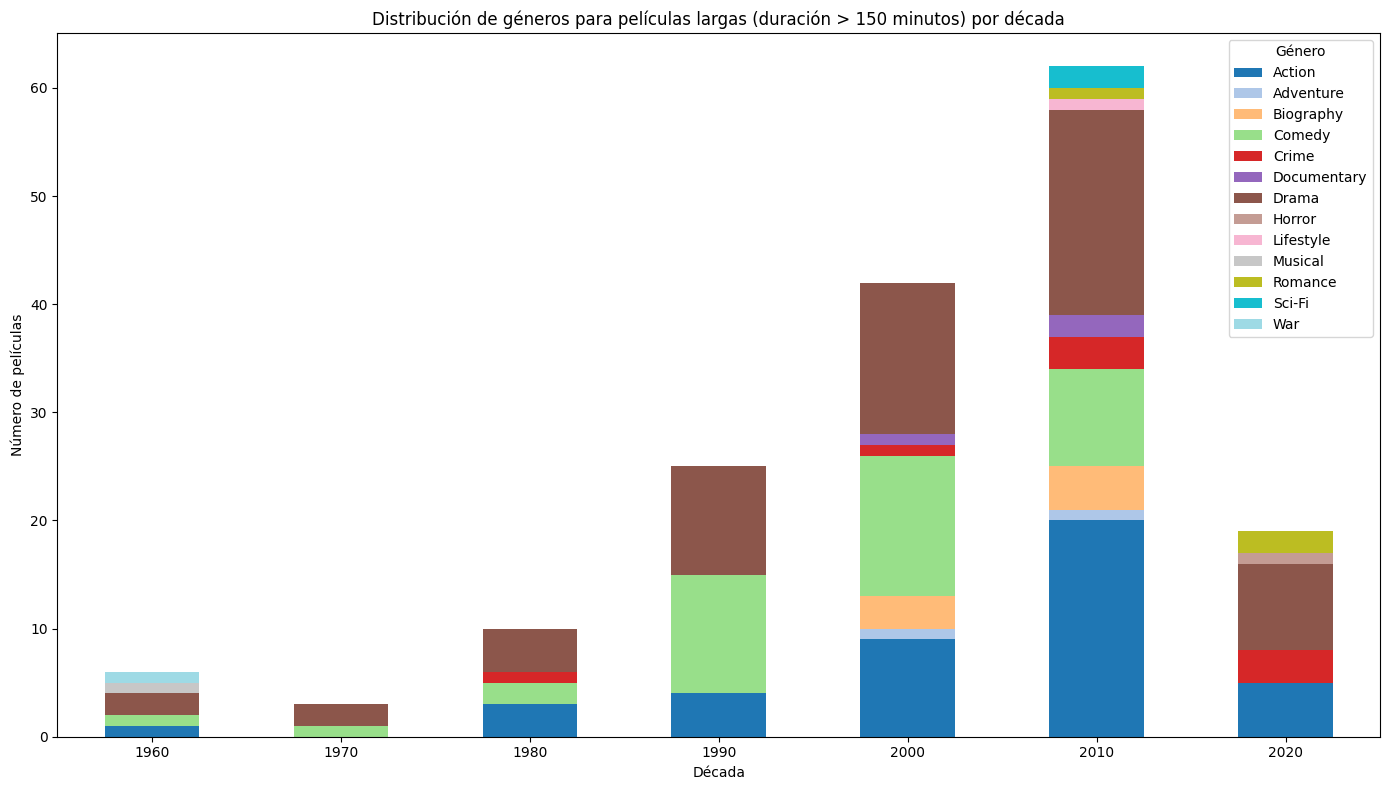

In [ ]:
peliculas_largas = df[(df['type'] == 'MOVIE') & (df['runtime'] > 150)].copy()
peliculas_largas['decade'] = (peliculas_largas['release_year'] // 10) * 10

long_movies_decade_genre = peliculas_largas.groupby(['decade', 'genre1']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
long_movies_decade_genre.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())
plt.title('Distribución de géneros para películas largas (duración > 150 minutos) por década')
plt.xlabel('Década')
plt.ylabel('Número de películas')
plt.xticks(rotation=0)  

plt.legend(title='Género')
plt.tight_layout()
plt.show()



Vemos que con las películas largas predominan el drama, la acción y la comedia. Las películas largas también han aumentado con los años. Vemos que curiosamente títulos de los años 90 son una cantidad considerable así que también los incluiremos para ver que a que se debe este aumento. De los años 20 claramente simplemente hay menos películas directamente, pero podemos ver como en los últimos 13 años ha habido un aumento de las películas largas de crimen. 

In [ ]:
peliculas_largas_nuevas = df[(df['type'] == 'MOVIE') & (df['runtime'] > 150) & (df['release_year'] > 1990)].sort_values(by='runtime', ascending=False)

peliculas_largas_nuevas.head(5)

index                              title   type  \
495     495                A Lion in the House  MOVIE   
378     378  Lagaan: Once Upon a Time in India  MOVIE   
428     428                       Jodhaa Akbar  MOVIE   
423     423           Kabhi Khushi Kabhie Gham  MOVIE   
3046   3046                       The Irishman  MOVIE   

                                            description  release_year  \
495   Five families struggle with the ups and downs ...          2006   
378   In 1890s India, an arrogant British commander ...          2001   
428   Jodhaa Akbar is a sixteenth century love story...          2008   
423   Rahul, the adoptive son of business magnate Ya...          2001   
3046  Pennsylvania, 1956. Frank Sheeran, a war veter...          2019   

     age_certification  runtime  imdb_score  imdb_votes       genre1  \
495                NaN      225         8.7       312.0  Documentary   
378                 PG      224         8.1    111053.0    Adventure   
428              PG-13      213         7.5     32188.0    Biography   
423                  G      210         7.4     48818.0        Drama   
3046                 R      209         7.8    371209.0    Biography   

        genre2 Country      Continent Language  duration  
495        NaN     USA  North America  English        83  
378      Drama   India           Asia    Hindi        85  
428      Drama   India           Asia    Hindi       102  
423    Musical   India           Asia    Hindi       119  
3046     Crime     USA  North America  English       171

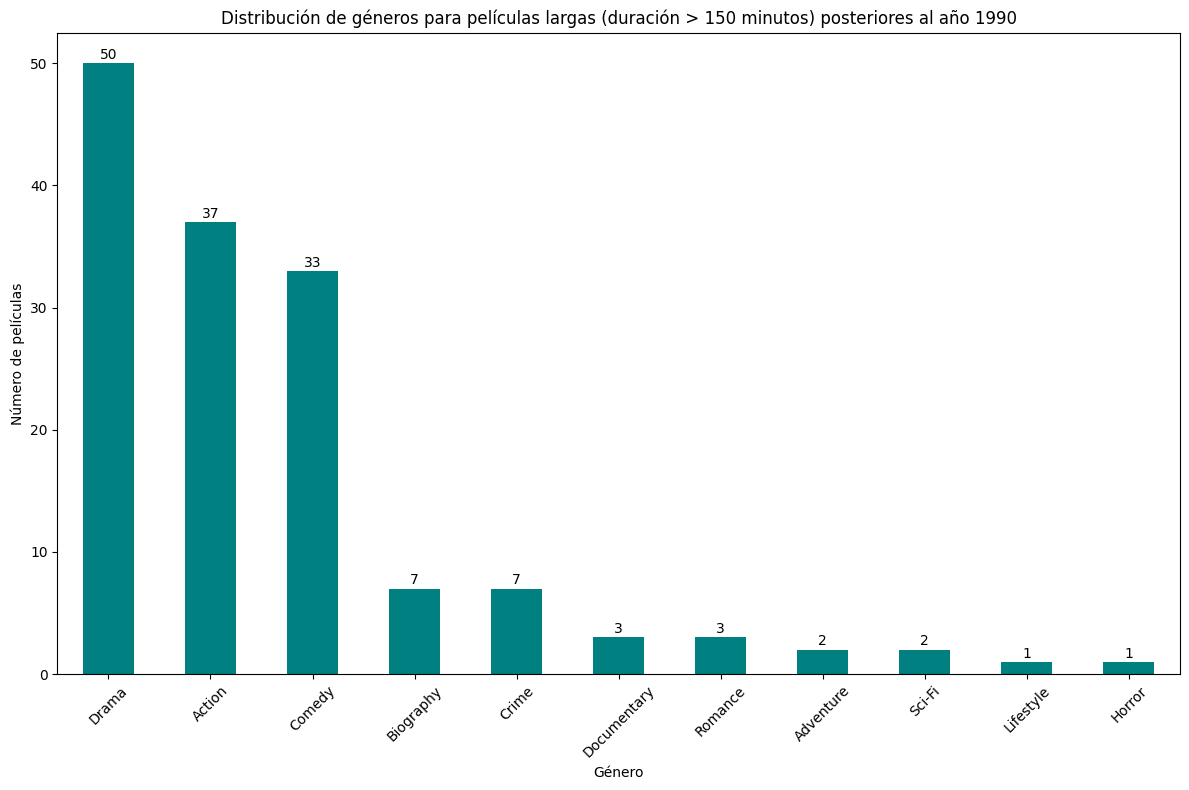

In [ ]:
genre_distribution = peliculas_largas_nuevas['genre1'].value_counts()

plt.figure(figsize=(12, 8))
genre_distribution.plot(kind='bar', color='teal')
plt.title('Distribución de géneros para películas largas (duración > 150 minutos) posteriores al año 1990')
plt.xlabel('Género')
plt.ylabel('Número de películas')
plt.xticks(rotation=45)

for i, count in enumerate(genre_distribution):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

En este gráfico podemos ver como en efecto el mayor número de películas son drama , acción y comedia. Vamos a buscar información sobre el país de estos films. 

In [ ]:
filtrodrama = peliculas_largas_nuevas['genre1'] == 'Drama' 

dramas_largos_nuevos = peliculas_largas_nuevas[filtrodrama]

dramas_largos_nuevos.head(5)

index                     title   type  \
423    423  Kabhi Khushi Kabhie Gham  MOVIE   
498    498    Kabhi Alvida Naa Kehna  MOVIE   
485    485                    Swades  MOVIE   
460    460            Dil Chahta Hai  MOVIE   
655    655                   Banyuki  MOVIE   

                                           description  release_year  \
423  Rahul, the adoptive son of business magnate Ya...          2001   
498  Dev and Maya are both married to different peo...          2006   
485  NASA employee Mohan Bhargav comes to India to ...          2004   
460  Three inseparable childhood friends are just o...          2001   
655  A story of an island country named Horai that ...          2010   

    age_certification  runtime  imdb_score  imdb_votes genre1    genre2  \
423                 G      210         7.4     48818.0  Drama   Musical   
498                PG      193         6.0     19797.0  Drama   Romance   
485                 G      189         8.1     89085.0  Drama   Musical   
460                 G      183         8.1     71167.0  Drama   Romance   
655               NaN      182         7.4        15.0  Drama       NaN   

    Country Continent Language  duration  
423   India      Asia    Hindi       119  
498   India      Asia    Hindi        81  
485   India      Asia    Hindi       140  
460   India      Asia    Hindi        87  
655   Japan      Asia    Hindi       172

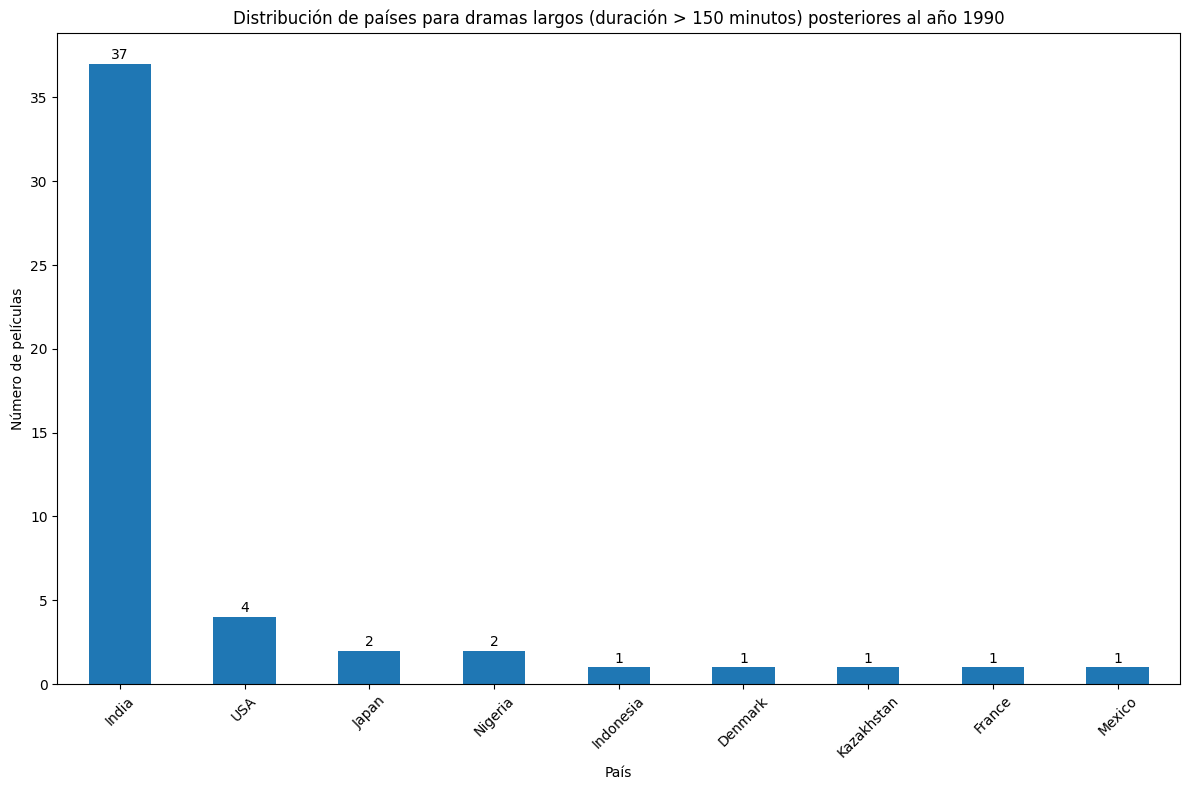

In [ ]:
country_distribution = dramas_largos_nuevos['Country'].value_counts()

plt.figure(figsize=(12, 8))
country_distribution.plot(kind='bar')
plt.title('Distribución de países para dramas largos (duración > 150 minutos) posteriores al año 1990')
plt.xlabel('País')
plt.ylabel('Número de películas')
plt.xticks(rotation=45)

for i, count in enumerate(country_distribution):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Claramente India es el país que más películas largas tiene en Netflix de estas últimas décadas. Se puede ver en el gráfico que en comparación, películas largas de otros países son algo muy poco habitual en el catálogo de Neflix. 
Vamos a observar que tipo de películas son para ver si el género corresponde con dramas, comedias y películas de acción. 

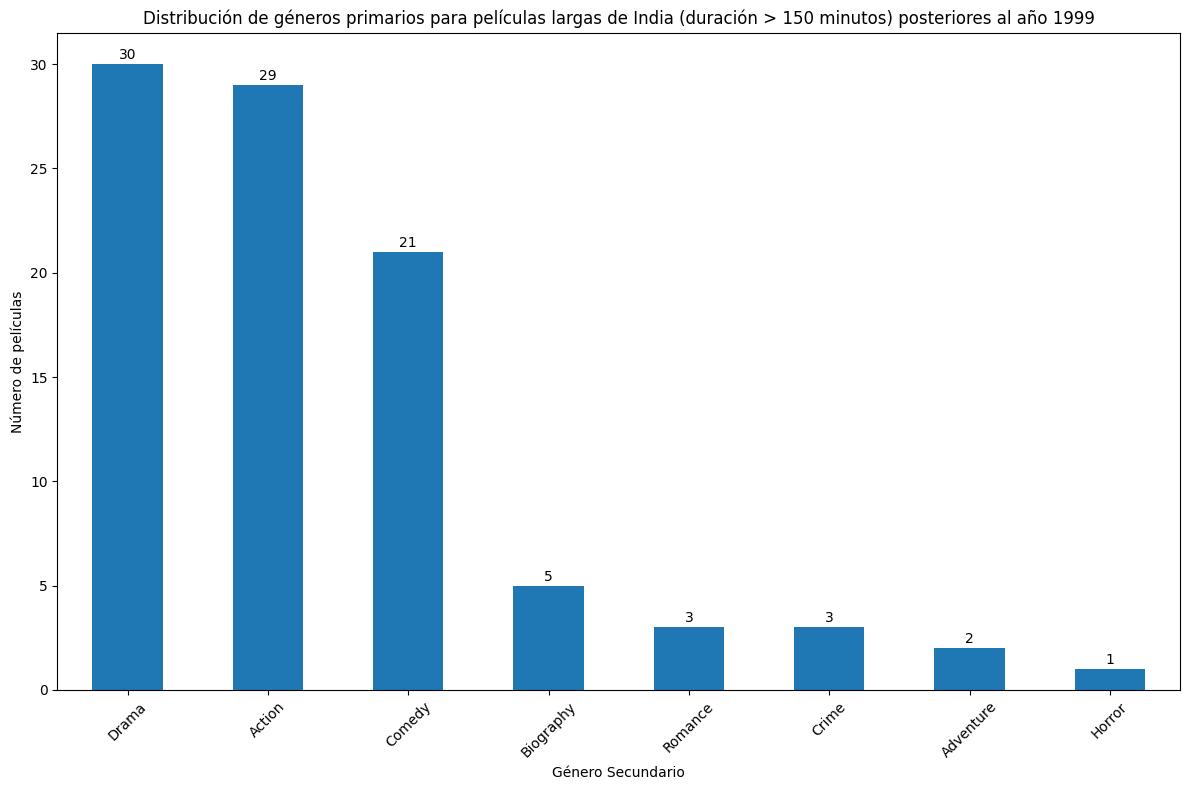

In [ ]:
indian_long_movies = peliculas_largas_nuevas[peliculas_largas_nuevas['Country'] == 'India']

genre2_distribution = indian_long_movies['genre1'].value_counts()

plt.figure(figsize=(12, 8))
genre2_distribution.plot(kind='bar')
plt.title('Distribución de géneros primarios para películas largas de India (duración > 150 minutos) posteriores al año 1999')
plt.xlabel('Género Secundario')
plt.ylabel('Número de películas')
plt.xticks(rotation=45)

for i, count in enumerate(genre2_distribution):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

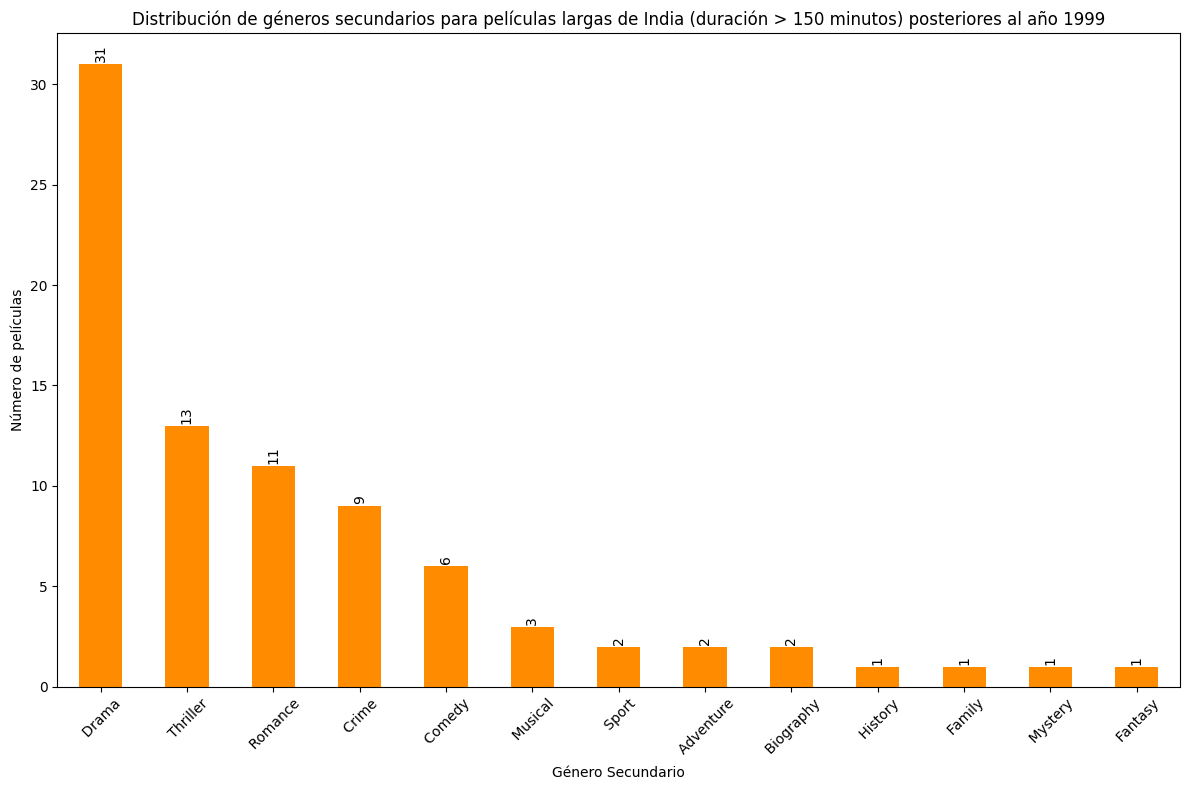

In [ ]:
indian_long_movies = peliculas_largas_nuevas[peliculas_largas_nuevas['Country'] == 'India']

genre2_distribution = indian_long_movies['genre2'].value_counts()

plt.figure(figsize=(12, 8))
genre2_distribution.plot(kind='bar', color='darkorange')
plt.title('Distribución de géneros secundarios para películas largas de India (duración > 150 minutos) posteriores al año 1999')
plt.xlabel('Género Secundario')
plt.ylabel('Número de películas')
plt.xticks(rotation=45)

for i, count in enumerate(genre2_distribution):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', rotation=90)

plt.tight_layout()
plt.show()


En general podemos ver como si, se cumple el patrón de drama, acción y comedia para series largas y tenemos un cierto componente de crimen o thriller como género secundario. Es decir, encontramos más dramas con tintes de thriller que películas puramente etiquetadas como thriller o misterio. 


Vamos a pasar ahora a ver las series largas:

In [ ]:
series_largas = df[(df['type'] == 'SHOW') & (df['runtime'] > 70)].sort_values(by='runtime', ascending=False)

series_largas.head(5)

index                           title  type  \
3598   3598                            1994  SHOW   
371     371                        Dead Set  SHOW   
4570   4570              Maya and the Three  SHOW   
1332   1332  Sinatra: All or Nothing at All  SHOW   
4089   4089                 Paava Kadhaigal  SHOW   

                                            description  release_year  \
3598  Archival video and new interviews examine Mexi...          2019   
371   Zombies are rampaging throughout Britain. Blis...          2008   
4570  A Mesoamerican warrior princess embarks on a q...          2021   
1332  An up-close and personal examination of the li...          2015   
4089  At times dark, at times disturbing, four short...          2020   

     age_certification  runtime  imdb_score  imdb_votes       genre1  \
3598             TV-MA      178         7.5       514.0  Documentary   
371              TV-MA      141         7.6     19684.0        Drama   
4570             TV-Y7      131         8.1      3597.0    Animation   
1332             TV-14      122         8.0      2354.0  Documentary   
4089               NaN      118         8.1      6628.0        Drama   

          genre2 Country      Continent Language  duration  
3598         NaN  Mexico  North America  English        25  
371       Horror      UK         Europe  English        53  
4570   Adventure     USA  North America  English        29  
1332         NaN     USA  North America  English        24  
4089         NaN   India           Asia    Tamil        21

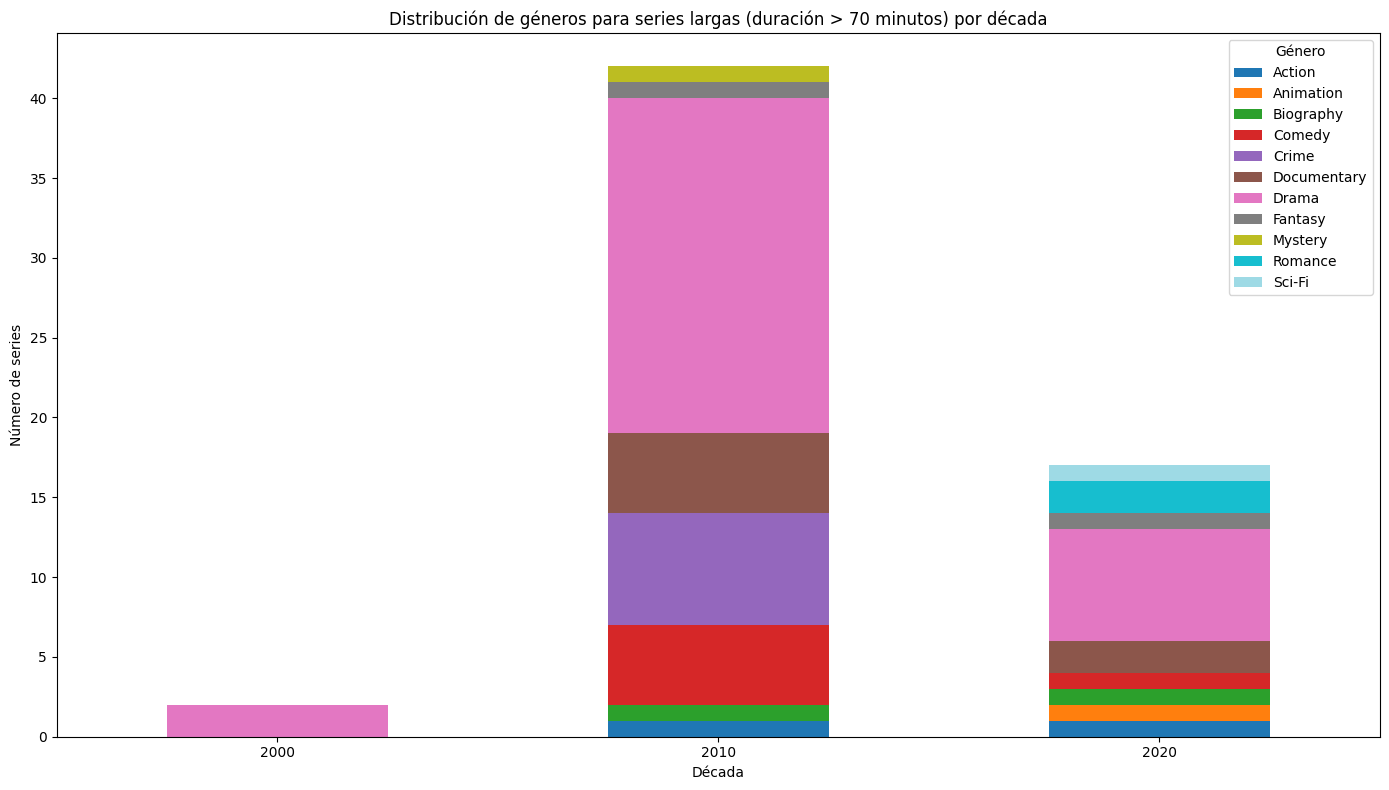

In [ ]:

series_largas['decade'] = (series_largas['release_year'] // 10) * 10

long_series_decade_genre = series_largas.groupby(['decade', 'genre1']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
long_series_decade_genre.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())
plt.title('Distribución de géneros para series largas (duración > 70 minutos) por década')
plt.xlabel('Década')
plt.ylabel('Número de series')
plt.xticks(rotation=0)  

plt.legend(title='Género')
plt.tight_layout()
plt.show()


Vemos que las series largas se concentran en los últimos años. Vamos a ver de que títulos se tratan para entender mejor los datos. Vemos que drama claramente es el género que mayor número de títulos aporta pero el auge de popularidad de series de crímenes y documentales en los años 10 y posterior también es interesante. Vamos a ver la distribución por género y por país. 

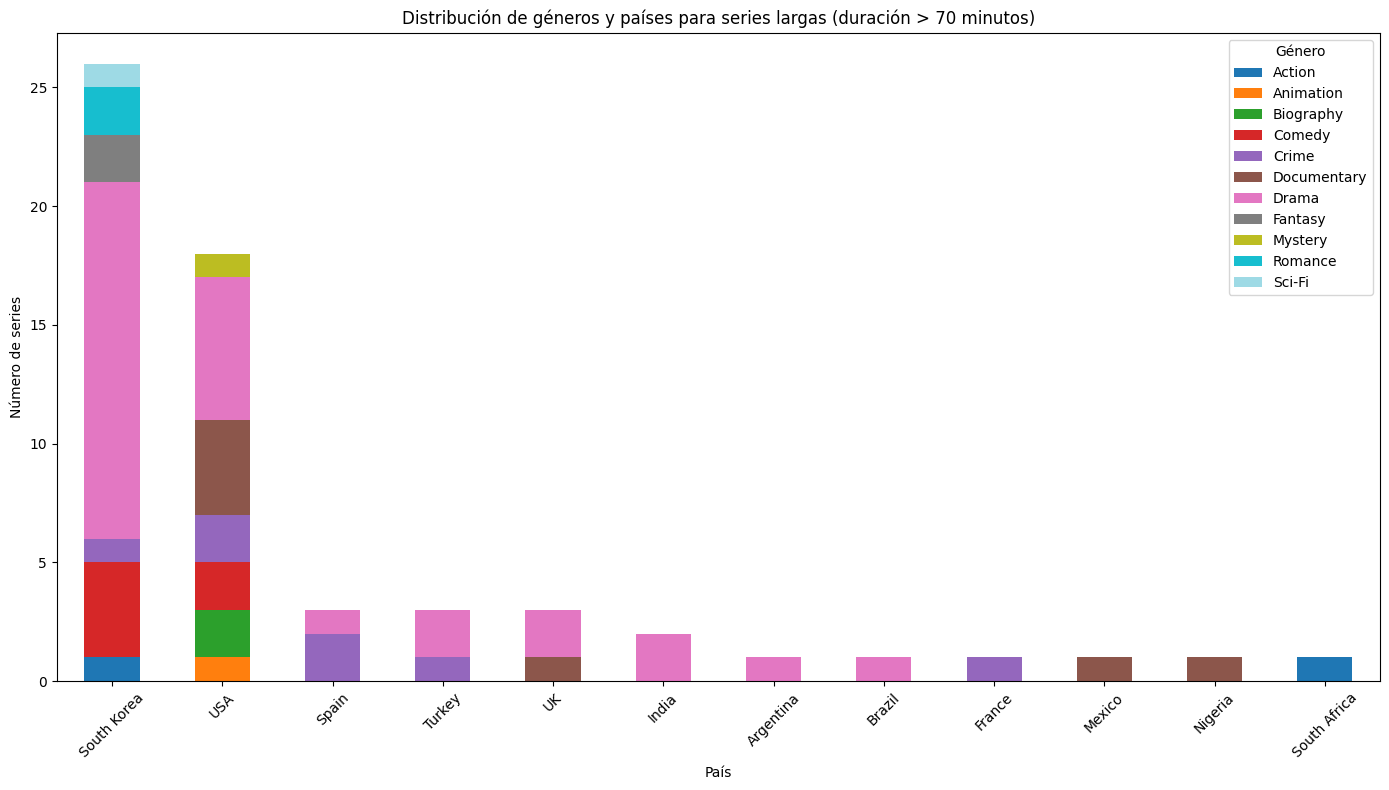

In [ ]:
long_series_country_genre = series_largas.groupby(['Country', 'genre1']).size().unstack(fill_value=0)

long_series_country_genre_sorted = long_series_country_genre.loc[long_series_country_genre.sum(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(14, 8))
long_series_country_genre_sorted.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())
plt.title('Distribución de géneros y países para series largas (duración > 70 minutos)')
plt.xlabel('País')
plt.ylabel('Número de series')
plt.xticks(rotation=45)  

plt.legend(title='Género')
plt.tight_layout()
plt.show()


En este caso Corea del Sur y USA son los mayores responsables de las series largas, luego España, Turquía y UK siguen aportando 3 cada uno al dataset. Vamos a ver a que se deben estas series largas viendo los datos de drama directmaente, caso que sean series todas en un capítulo la duración combinada o simplemente ver a que se debe esta duración. 


In [ ]:
drama_long_series = series_largas[series_largas['genre1'] == 'Drama']


drama_long_series_sorted = drama_long_series.sort_values(by='runtime', ascending=False)

drama_long_series_sorted.head(5)


index            title  type  \
371     371         Dead Set  SHOW   
4089   4089  Paava Kadhaigal  SHOW   
2586   2586      On Children  SHOW   
1398   1398     Intersection  SHOW   
2324   2324  Prison Playbook  SHOW   

                                            description  release_year  \
371   Zombies are rampaging throughout Britain. Blis...          2008   
4089  At times dark, at times disturbing, four short...          2020   
2586  Adapted from the novel by author Wu Hsiao-Le, ...          2018   
1398  Naz who is a paediatrician loses her baby duri...          2016   
2324  With his major league baseball debut right aro...          2017   

     age_certification  runtime  imdb_score  imdb_votes genre1   genre2  \
371              TV-MA      141         7.6     19684.0  Drama   Horror   
4089               NaN      118         8.1      6628.0  Drama      NaN   
2586               NaN      100         7.2       380.0  Drama      NaN   
1398             TV-MA       97         6.7      1152.0  Drama      NaN   
2324               NaN       91         8.5      3060.0  Drama      NaN   

          Country      Continent Language  duration  decade  
371            UK         Europe  English        53    2000  
4089        India           Asia    Tamil        21    2020  
2586          USA  North America  English        51    2010  
1398       Turkey           Asia  English        48    2010  
2324  South Korea           Asia   Korean        52    2010

https://www.filmaffinity.com/es/film413740.html Dead Set es una miniserie de 5 capítulos cuya duración total es la mostrada en el df, no por capítulos. 

https://en.wikipedia.org/wiki/Paava_Kadhaigal En este caso Paava Kadhaigal se trata de una antología de 4 episodios condensados en un mismo producto. 

https://letterboxd.com/film/on-children-2018/ On Children parece que también tiene capítulos de larga duración. 

https://es.wikipedia.org/wiki/K%C3%B6rd%C3%BC%C4%9F%C3%BCm los capítulos de la serie Intersection parece que también son de larga duración. 

https://www.netflix.com/es/title/80214406 Ocurre de la misma forma en el caso de Prison Playbook en la que la duración de los capítulos es elevada. 


En conclusión podemos ver como en los últimos años han aparecido series que superan el tiempo clásico medio de las series para presentar narrativas más intrincadas con largos desarrollos de personajes a niveles cinematográficos. En series populares de los últimos años como Squid Games vemos que la duración se ha estabilizado sobre los 60 minutos. 

A continuación veremos a que se deben los outliers más extremos : 

In [ ]:
series_largas.head(5)

index                           title  type  \
3598   3598                            1994  SHOW   
371     371                        Dead Set  SHOW   
4570   4570              Maya and the Three  SHOW   
1332   1332  Sinatra: All or Nothing at All  SHOW   
4089   4089                 Paava Kadhaigal  SHOW   

                                            description  release_year  \
3598  Archival video and new interviews examine Mexi...          2019   
371   Zombies are rampaging throughout Britain. Blis...          2008   
4570  A Mesoamerican warrior princess embarks on a q...          2021   
1332  An up-close and personal examination of the li...          2015   
4089  At times dark, at times disturbing, four short...          2020   

     age_certification  runtime  imdb_score  imdb_votes       genre1  \
3598             TV-MA      178         7.5       514.0  Documentary   
371              TV-MA      141         7.6     19684.0        Drama   
4570             TV-Y7      131         8.1      3597.0    Animation   
1332             TV-14      122         8.0      2354.0  Documentary   
4089               NaN      118         8.1      6628.0        Drama   

          genre2 Country      Continent Language  duration  decade  
3598         NaN  Mexico  North America  English        25    2010  
371       Horror      UK         Europe  English        53    2000  
4570   Adventure     USA  North America  English        29    2020  
1332         NaN     USA  North America  English        24    2010  
4089         NaN   India           Asia    Tamil        21    2020

https://www.netflix.com/es/title/80991872  En el caso de 1944 se refiere a la duración total de la mini serie de 4 capítulos tal y como habíamos pensado. 

El caso de Dead Set ya se ha analizado. 

https://www.netflix.com/es/title/80244283 En el caso de Maya and The Three es posible que se refirése a la duración total que tenía la serie en el momento de capturar el dato pues los capítulos duran una media de 35 minutos aproximadamente. 


https://en.wikipedia.org/wiki/Sinatra:_All_or_Nothing_at_All Sinatra All or Nothing at All es un documental que en efecto se emitió en 2 partes así que 122 minutos es la duración total del producto. 


Paava Kadhaigal como ya se ha mencionado es una analogía de 4 historias cortas en un mismo producto. 


Así podemos ver que hay una cierta inconsistencia en el dataset en lo referente a la duración de los shows ya que algunos están por minutos del capítulo pero tenemos estos outliers que en varias ocasiones están por la duración total de la serie, es algo a tener en cuenta en pensar en como la media o la mediana de la duración de las series estará condicionada por este hecho. 



In [ ]:

def calculate_statistical_measures(group):
    return pd.Series({
        'Media runtime': group['runtime'].mean(),
        'Mediana runtime': group['runtime'].median(),
        'Moda runtime': group['runtime'].mode().iloc[0] if not group['runtime'].mode().empty else None,
        'Desviación Estándar runtime': group['runtime'].std(),
        'Varianza runtime': group['runtime'].var(),
        'Mínimo runtime': group['runtime'].min(),
        'Máximo runtime': group['runtime'].max(),
        
        'Media imdb_score': group['imdb_score'].mean(),
        'Mediana imdb_score': group['imdb_score'].median(),
        'Moda imdb_score': group['imdb_score'].mode().iloc[0] if not group['imdb_score'].mode().empty else None,
        'Desviación Estándar imdb_score': group['imdb_score'].std(),
        'Varianza imdb_score': group['imdb_score'].var(),
        'Mínimo imdb_score': group['imdb_score'].min(),
        'Máximo imdb_score': group['imdb_score'].max(),
        
        'Media imdb_votes': group['imdb_votes'].mean(),
        'Mediana imdb_votes': group['imdb_votes'].median(),
        'Moda imdb_votes': group['imdb_votes'].mode().iloc[0] if not group['imdb_votes'].mode().empty else None,
        'Desviación Estándar imdb_votes': group['imdb_votes'].std(),
        'Varianza imdb_votes': group['imdb_votes'].var(),
        'Mínimo imdb_votes': group['imdb_votes'].min(),
        'Máximo imdb_votes': group['imdb_votes'].max()
    })

stats_by_decade_type = df.groupby(['decade', 'type']).apply(calculate_statistical_measures).unstack(level=1)

stats_by_decade_type


/var/folders/k5/0ckgxv2x46n7_p0qwn2h0hhh0000gn/T/ipykernel_12689/3590845018.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats_by_decade_type = df.groupby(['decade', 'type']).apply(calculate_statistical_measures).unstack(level=1)


Media runtime            Mediana runtime       Moda runtime        \
type           MOVIE       SHOW           MOVIE  SHOW        MOVIE  SHOW   
decade                                                                     
1950      109.833333        NaN           110.0   NaN         77.0   NaN   
1960      140.200000  30.000000           155.0  30.0        158.0  30.0   
1970      124.700000  43.000000           127.5  43.0        133.0  43.0   
1980      119.232558  25.888889           108.0  24.0        100.0  10.0   
1990      120.933333  26.476190           120.0  23.0        100.0  22.0   
2000      115.615942  33.204301           109.5  25.0         90.0  44.0   
2010       99.718489  38.494263            99.0  42.0         90.0  24.0   
2020       97.270925  40.309061            98.0  42.0         90.0  45.0   

       Desviación Estándar runtime            Varianza runtime              \
type                         MOVIE       SHOW            MOVIE        SHOW   
decade                                                                       
1950                     21.738599        NaN       472.566667         NaN   
1960                     35.511500        NaN      1261.066667         NaN   
1970                     36.128572        NaN      1305.273684         NaN   
1980                     34.508686  15.210559      1190.849391  231.361111   
1990                     35.646843   9.749969      1270.697436   95.061905   
2000                     32.267591  19.814663      1041.197418  392.620851   
2010                     25.732816  17.740055       662.177828  314.709552   
2020                     25.966167  17.158805       674.241844  294.424586   

        ... Moda imdb_votes          Desviación Estándar imdb_votes  \
type    ...           MOVIE     SHOW                          MOVIE   
decade  ...                                                           
1950    ...            78.0      NaN                   16843.093326   
1960    ...            82.0  72895.0                   42673.799417   
1970    ...            14.0   2144.0                  227141.627364   
1980    ...            25.0      6.0                  143697.257537   
1990    ...           248.0     39.0                  240037.970134   
2000    ...           203.0      6.0                  124202.788898   
2010    ...            33.0     14.0                   89156.782538   
2020    ...            15.0     65.0                   27974.969916   

                      Varianza imdb_votes               Mínimo imdb_votes  \
type             SHOW               MOVIE          SHOW             MOVIE   
decade                                                                      
1950              NaN        2.836898e+08           NaN              78.0   
1960              NaN        1.821053e+09           NaN              82.0   
1970              NaN        5.159332e+10           NaN              14.0   
1980     98331.626524        2.064890e+10  9.669109e+09              25.0   
1990     37578.809450        5.761823e+10  1.412167e+09              65.0   
2000    195269.959475        1.542633e+10  3.813036e+10              13.0   
2010     67392.964815        7.948932e+09  4.541812e+09               5.0   
2020     28296.869832        7.825989e+08  8.007128e+08               7.0   

                Máximo imdb_votes             
type       SHOW             MOVIE       SHOW  
decade                                        
1950        NaN           42373.0        NaN  
1960    72895.0          111189.0    72895.0  
1970     2144.0          795222.0     2144.0  
1980        6.0          723306.0   302700.0  
1990       39.0         1994599.0   112887.0  
2000        6.0          644336.0  1727694.0  
2010        6.0         2268288.0   989090.0  
2020        5.0          498447.0   416738.0  

[8 rows x 42 columns]

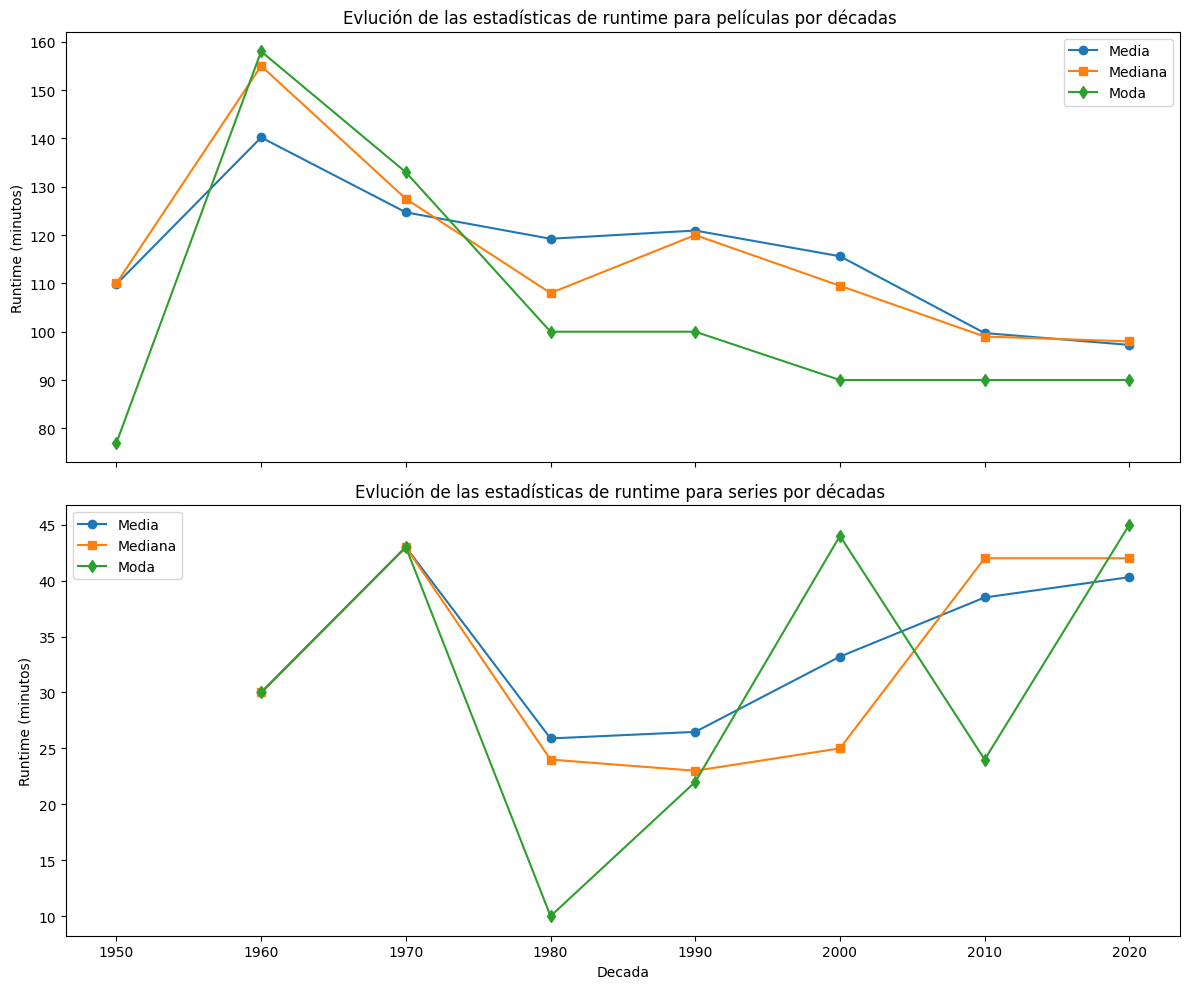

In [ ]:
df['decade'] = (df['release_year'] // 10) * 10

movie_data = df[df['type'] == 'MOVIE']
show_data = df[df['type'] == 'SHOW']

def calculate_mode(series):
    return series.mode()[0] if not series.mode().empty else np.nan

movie_stats = movie_data.groupby('decade')['runtime'].agg(['mean', 'median', calculate_mode]).rename(
    columns={'calculate_mode': 'mode'})
show_stats = show_data.groupby('decade')['runtime'].agg(['mean', 'median', calculate_mode]).rename(
    columns={'calculate_mode': 'mode'})

fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

ax[0].plot(movie_stats.index, movie_stats['mean'], marker='o', label='Media')
ax[0].plot(movie_stats.index, movie_stats['median'], marker='s', label='Mediana')
ax[0].plot(movie_stats.index, movie_stats['mode'], marker='d', label='Moda')
ax[0].set_title('Evlución de las estadísticas de runtime para películas por décadas ')
ax[0].set_ylabel('Runtime (minutos)')
ax[0].legend()

ax[1].plot(show_stats.index, show_stats['mean'], marker='o', label='Media')
ax[1].plot(show_stats.index, show_stats['median'], marker='s', label='Mediana')
ax[1].plot(show_stats.index, show_stats['mode'], marker='d', label='Moda')
ax[1].set_title('Evlución de las estadísticas de runtime para series por décadas ')
ax[1].set_xlabel('Decada')
ax[1].set_ylabel('Runtime (minutos)')
ax[1].legend()

plt.tight_layout()
plt.show()


Conclusiones sobre runtime en base a media, mediana y moda. Aunque en una gráfica anteiror se presentó la media por año de series y películas ahora vamos a dar unas conclusiones más informadas en base a lo investigado en los datos conociendo los outliers y sus causas :


- MOVIE: Las películas muestran una evolución más estable en los valores de media y mediana del runtime a lo largo del tiempo, lo que indica que la duración promedio de las películas se ha mantenido en un rango similar a través de las décadas. De las décadas anteirores tenemos muchos menos datos dado que el 95% de los datos se concentran en las últimas décadas, pero podemos ver como la moda se mantiene en 90 minutos. Las fluctuaciones de décadas pasadas pueden deberse como comentado a menor volumen de datos. La moda del runtime tiende a mantenerse cerca de duraciones estándar (como 90-120 minutos), que han sido típicas en el cine tradicional.

- SHOW: Las series tienen una mayor variabilidad en el runtime, especialmente en décadas recientes, posiblemente reflejando cambios en los formatos de episodios, con la introducción de temporadas más cortas y episodios de duración flexible, muy común en plataformas de streaming aunque de todas formas por un lado sabemos que los datos tienen ciertas cuestiones estructurales como algunas series ser representadas con la duración total y otras por capítulos. La tendencia en la duración parece ser claramente ascendente. La fluctuación en la moda puede deberse a la estructura de los datos pero de todas formas la moda de 25' en los años 10 también puede deberse a series que sean más cortas como anime.

A continuación pasaremos al análisis de las puntuaciones de IMDb: 


In [ ]:
df.describe()

index  release_year      runtime   imdb_score    imdb_votes  \
count  5283.000000   5283.000000  5283.000000  5283.000000  5.267000e+03   
mean   2641.000000   2015.879992    79.199886     6.533447  2.340719e+04   
std    1525.215067      7.346098    38.915974     1.160932  8.713432e+04   
min       0.000000   1953.000000     0.000000     1.500000  5.000000e+00   
25%    1320.500000   2015.000000    45.000000     5.800000  5.210000e+02   
50%    2641.000000   2018.000000    87.000000     6.600000  2.279000e+03   
75%    3961.500000   2020.000000   106.000000     7.400000  1.014400e+04   
max    5282.000000   2022.000000   235.000000     9.600000  2.268288e+06   

          duration       decade  
count  5283.000000  5283.000000  
mean     97.060193  2011.086504  
std      48.951979     8.291858  
min      20.000000  1950.000000  
25%      48.000000  2010.000000  
50%     102.000000  2010.000000  
75%     139.000000  2020.000000  
max     179.000000  2020.000000

Por estas estadísticas en relación a IMDb_score podemos ver que la media se sitúa en 6.53, es decir, los contenidos del df de Netflix tienen una valoración media mayor que 5 indicando que la audiencia tiene un sentimiento positivo al respecto de estos productos. La desviación estandar es baja lo que nos hace pensar que los valores tendrán poca dispersión desde la media, siendo muchos cerca de 6.53. 

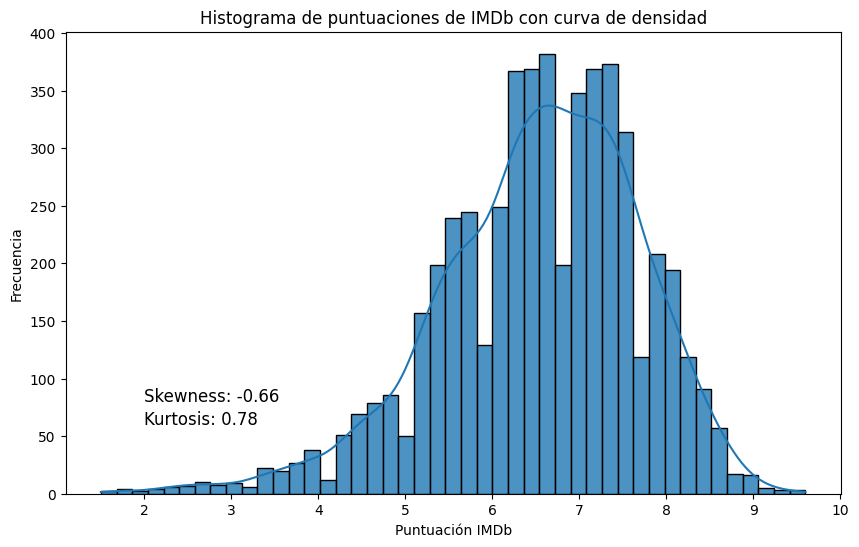

In [ ]:
from scipy.stats import skew, kurtosis

plt.figure(figsize=(10, 6))
sns.histplot(df['imdb_score'], kde=True, alpha=0.8, line_kws={'color': 'darkblue'})
plt.title('Histograma de puntuaciones de IMDb con curva de densidad')
plt.xlabel('Puntuación IMDb')
plt.ylabel('Frecuencia')

imdb_score_skew = skew(df['imdb_score'])
                       
imdb_score_kurtosis = kurtosis(df['imdb_score'])

plt.text(2, 0.2 * plt.ylim()[1], f'Skewness: {imdb_score_skew:.2f}', fontsize=12, color='black')
plt.text(2, 0.15 * plt.ylim()[1], f'Kurtosis: {imdb_score_kurtosis:.2f}', fontsize=12, color='black')

plt.show()


La distribución muestra una ligera asimetría negativa (sesgo a la izquierda), ya que la cola se extiende más hacia la izquierda de la media. Esto indica que la mayoría de los puntajes están concentrados en el extremo alto de la escala de calificación, con pocos valores bajos, que estudiaremos luego. Por un lado podemos pensar que en el dataset encontramos con mayor frecuencia contenidos que la audiencia ha relacionado con alta calidad o que han sido de su gusto. Por el otro también ifnerimos que valorar con notas muy bajas una película o una serie en IMDb es algo fuera de lo común. 


La distribución probablemente presenta una curtosis leptocúrtica (curtosis positiva), ya que se observa un pico relativamente pronunciado en el centro, con una mayor concentración de valores alrededor de la media. Esto implica que los datos tienen una mayor concentración alrededor del promedio en comparación con una distribución normal y colas algo más delgadas.

En términos prácticos, esto indica que los valores de imdb_score están  concentrados alrededor de las calificaciones centrales, con menos variabilidad en los extremos, lo cuál también es normal ya que en plataformas de voto de películas es común encontrar sentimientos positivos moderados y también más extremos pero en menor medida ya que eso implicaría productos de enorme calidad que suelen ser más raros de encontrar que contenidos más generales. 


Dada la asimetría y la alta curtosis, esta distribución se aleja de la normalidad. Una distribución normal esperaría simetría alrededor de la media y una curtosis cerca de 0, lo cual no es el caso aquí.

La curva de densidad en azul oscuro confirma la concentración de datos en el rango alto de imdb_score, con un pico pronunciado alrededor de los valores superiores, indicando poca dispersión hacia el extremo bajo.

Vamos a hacer el gráfico de caja para ver que outliers tenemos que considerar : 

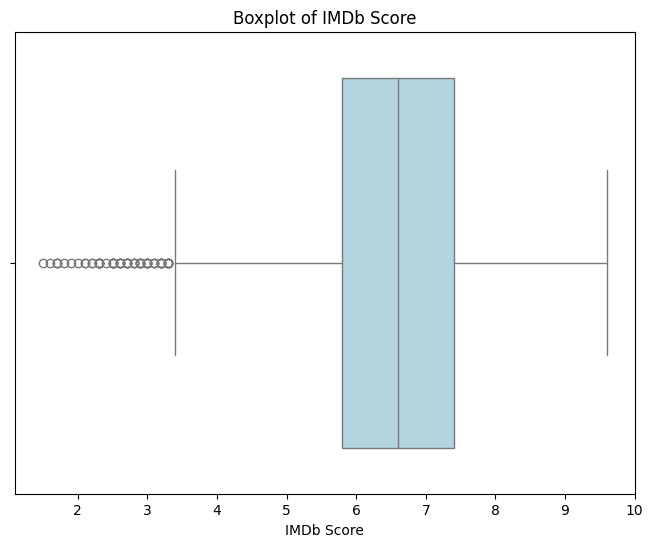

In [ ]:

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['imdb_score'], color='lightblue')
plt.title('Boxplot of IMDb Score')
plt.xlabel('IMDb Score')
plt.show()


Claramente el boxplot considera outliers los valores por debajo de 3.5, vamos a hacer un estudio más detallado de estos valores :

/var/folders/k5/0ckgxv2x46n7_p0qwn2h0hhh0000gn/T/ipykernel_12689/3085888479.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers_imbd['decade'] = (df_outliers_imbd['release_year'] // 10) * 10


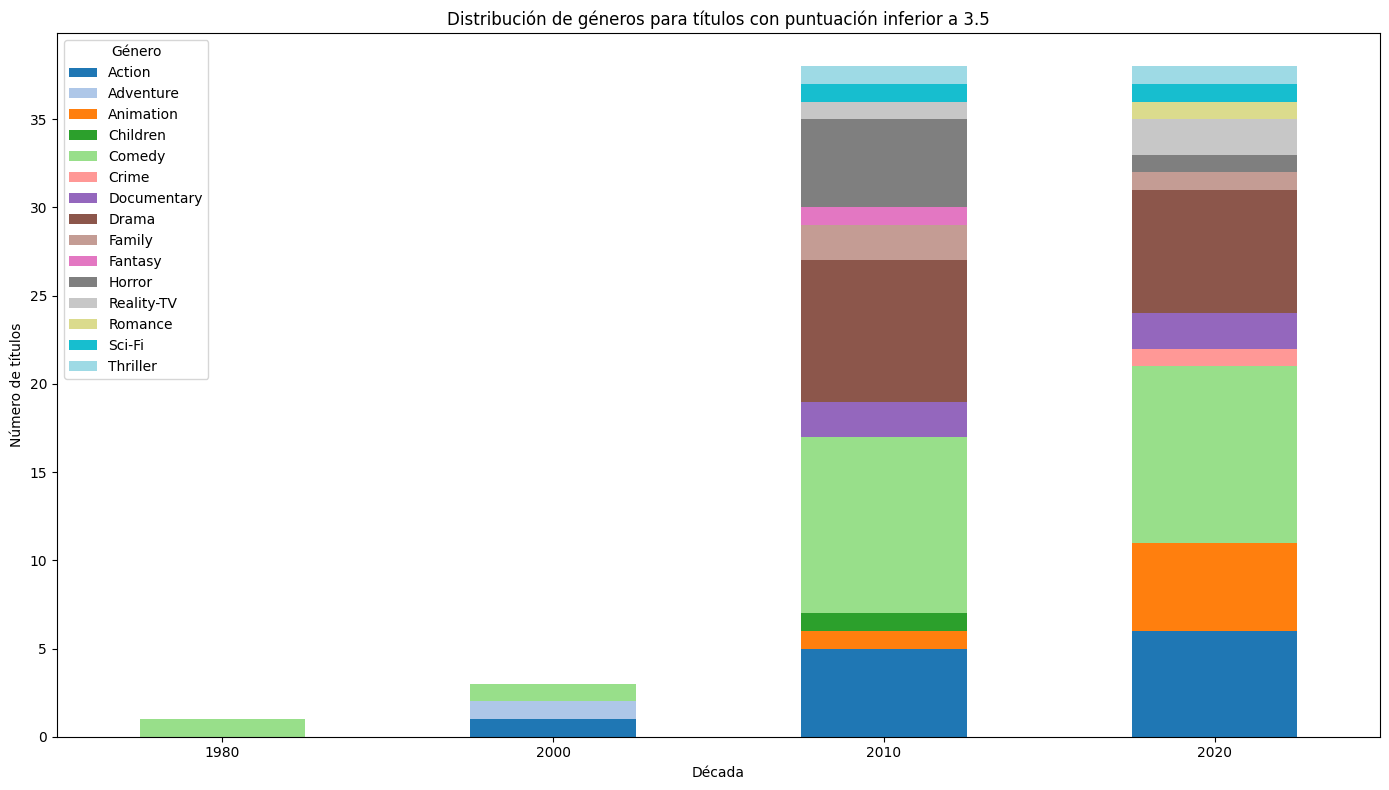

In [ ]:
outliers_imbd = df['imdb_score'] < 3.5 
df_outliers_imbd = df[outliers_imbd]

df_outliers_imbd['decade'] = (df_outliers_imbd['release_year'] // 10) * 10

df_outliers_imbd_genre = df_outliers_imbd.groupby(['decade', 'genre1']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
df_outliers_imbd_genre.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())
plt.title('Distribución de géneros para títulos con puntuación inferior a 3.5')
plt.xlabel('Década')
plt.ylabel('Número de títulos')
plt.xticks(rotation=0)  

plt.legend(title='Género')
plt.tight_layout()
plt.show()

Lo clasificado como Comedy tiene una presencia llamativa en esta visualización ya que desde los años 80 hay algunos títulos con una califcación muy baja en comedia, también en drama. Podemos ver como en los años 10 ha habido también un buen porcentaje de shows de terror y acción con bajas vaoraciones. En los años 20 de los que aún hay pocos datos podemos ver como la tendencia de valorar dramas, comedias y acción con baja valoración sigue siendo tendencia. Vamos a ampliar el foco sobre comedia : 

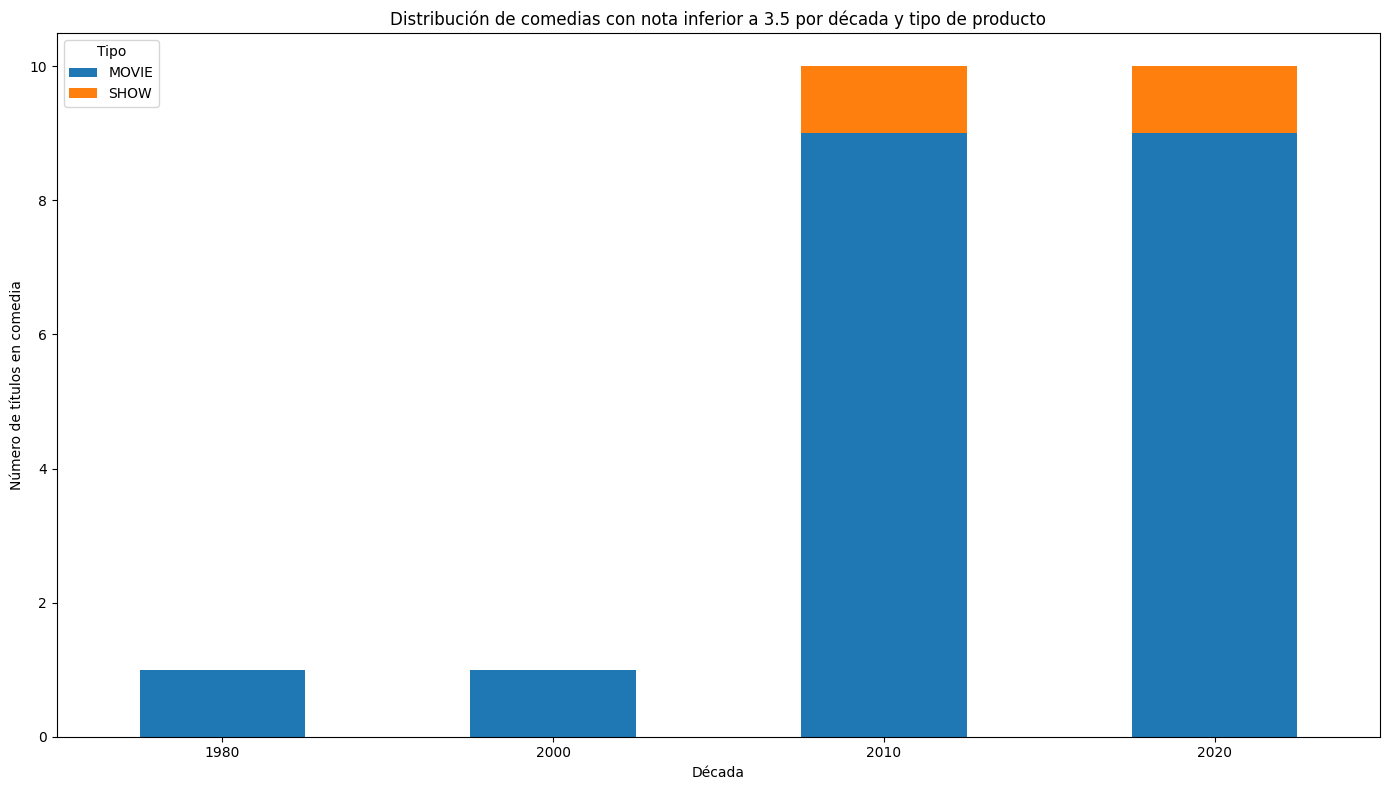

In [ ]:

df_outliers_imbd_comedy = df_outliers_imbd[df_outliers_imbd['genre1'] == 'Comedy']
df_outliers_comedy_by_type = df_outliers_imbd_comedy.groupby(['decade', 'type']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
df_outliers_comedy_by_type.plot(kind='bar', stacked=True, color=['tab:blue', 'tab:orange'], ax=plt.gca())
plt.title('Distribución de comedias con nota inferior a 3.5 por década y tipo de producto')
plt.xlabel('Década')
plt.ylabel('Número de títulos en comedia')
plt.xticks(rotation=0)  
plt.legend(title='Tipo')
plt.tight_layout()
plt.show()


Este gráfico nos muestra como las comedias peor valoradas se encuentran en los últimos años, y precisamente en la gráfica de 2020 que solo incluye 2 años vemos que hay tantas comedias mal valoradas como en el total de los años 10 lo que indica un posible descenso de la calidad en comedia. Básicamente se trata de películas menos dos series. 

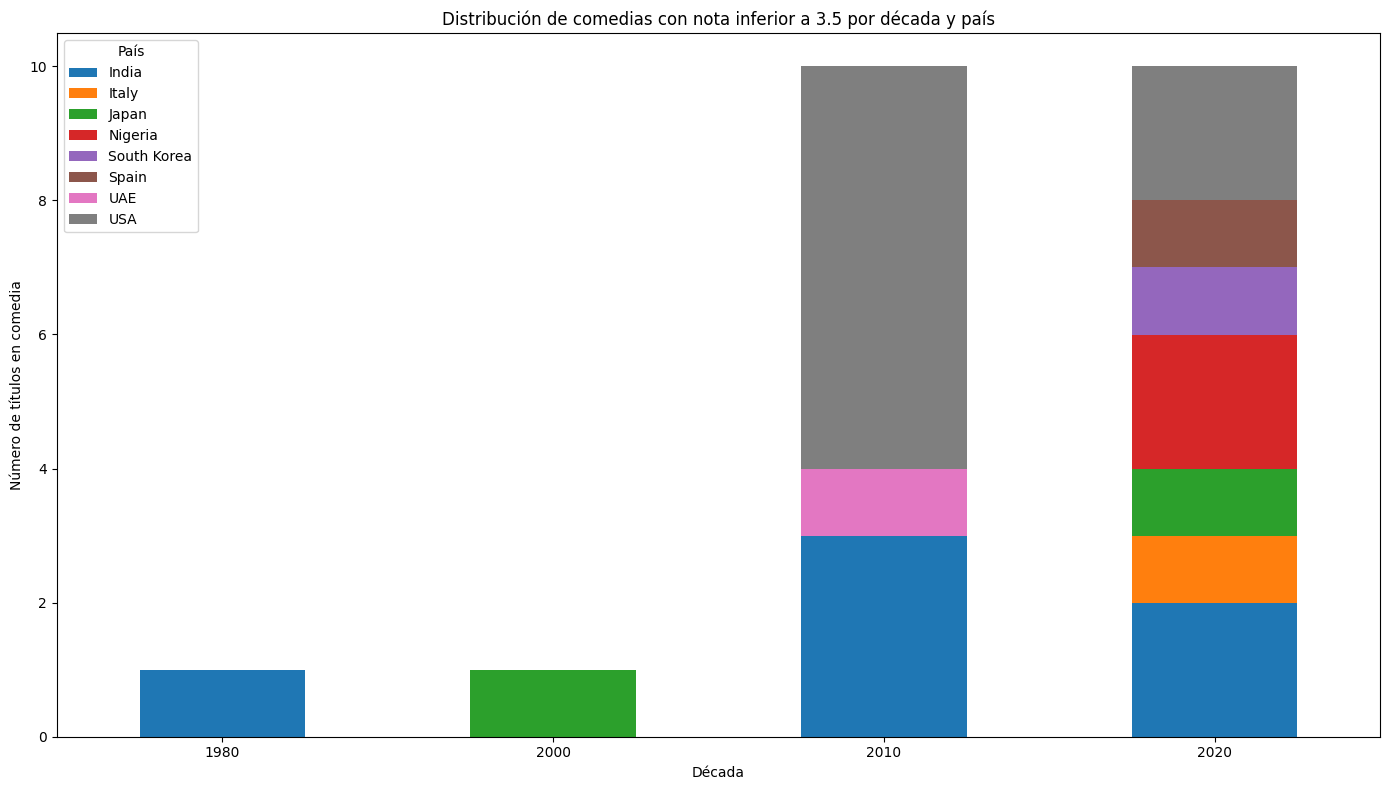

In [ ]:

df_outliers_imbd_comedy = df_outliers_imbd[df_outliers_imbd['genre1'] == 'Comedy']
df_outliers_comedy_by_type = df_outliers_imbd_comedy.groupby(['decade', 'Country']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
df_outliers_comedy_by_type.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Distribución de comedias con nota inferior a 3.5 por década y país')
plt.xlabel('Década')
plt.ylabel('Número de títulos en comedia')
plt.xticks(rotation=0)  
plt.legend(title='País')
plt.tight_layout()
plt.show()

Las comedias de Estados Unidos son las peor valoradas pero llama la atención como en los años 2020 hay una gran divergencia entre países que no se veía antes. Esto puede ser debido al incremento de Netflix de sus producciones en diferentes países. 

In [ ]:

comedy_count = df[df['genre1'] == 'Comedy'].groupby('Country').size()


total_titles_by_country = df.groupby('Country').size()
comedy_percentage = (comedy_count / total_titles_by_country * 100).fillna(0)

outliers_count = df[df['imdb_score'] < 3.5].groupby('Country').size()

outliers_percentage = (outliers_count / total_titles_by_country * 100).fillna(0)

total_outliers_global = df_country_stats['Outliers en comedia'].sum()


df_country_stats = pd.DataFrame({
    'Comedias': comedy_count,
    'Outliers en comedia': outliers_count,
    'Porcentaje de comedia': comedy_percentage,
    'Porcentaje de outliers del país': outliers_percentage
}).fillna(0)

df_country_stats_sorted = df_country_stats.sort_values(by='Outliers en comedia', ascending=False)
df_country_stats_sorted['Porcentaje del total outliers'] = (df_country_stats_sorted['Outliers en comedia'] / total_outliers_global) * 100


df_country_stats_sorted.head(10)


Comedias  Outliers en comedia  Porcentaje de comedia  \
Country                                                             
USA             669.0                 37.0              27.496917   
India           181.0                 20.0              28.105590   
Brazil           20.0                  3.0              22.727273   
South Korea      31.0                  3.0              16.756757   
Nigeria          16.0                  2.0              32.653061   
Poland            2.0                  2.0               8.695652   
Japan            10.0                  2.0               3.759398   
Italy            11.0                  2.0              22.448980   
UAE               2.0                  1.0              50.000000   
Lebanon           2.0                  1.0               8.695652   

             Porcentaje de outliers del país  Porcentaje del total outliers  
Country                                                                      
USA                                 1.520756                          46.25  
India                               3.105590                          25.00  
Brazil                              3.409091                           3.75  
South Korea                         1.621622                           3.75  
Nigeria                             4.081633                           2.50  
Poland                              8.695652                           2.50  
Japan                               0.751880                           2.50  
Italy                               4.081633                           2.50  
UAE                                25.000000                           1.25  
Lebanon                             4.347826                           1.25

En total vemos que el país con más outliers en comedia es en efecto EEUU. Algo bastante llamativo es que un 27.5% de su aportación al set de datos sea comedia teniendo en cuenta la variedad de géneros. Hay 37 comedias por debajo de 3.5 como nota, un 46,25% de los outliers. 

Al haber muchos títulos de USA en el dataset el porcentaje de outliers se mantiene en un 1.5%. India por su lado tiene incluso más porcentaje de comedia pero al aportar menos títulos al dataset vemos que es más sensible y un 3.1% de títuos de India tienen una puntuación media en IMDb de menos de 3.5 en el conjunto. 

Sería interesante ver la valoración media por serie / película y después fijarse también en los contenidos con puntuaciones más altas de todo el set de datos. 

Vemos que las series tienen una media superior a las películas pero también sabemos que hay muchas más pelíuclas y prácticamente todos los outliers negativos se concentran en las películas. Vamos a ver una distribución de estos valores. 

El gráfico de count de MOVIE y SHOW aparecía en el principio del análisis pero volverlo a presentar aquí es útil para el análisis comparativo de los dos gráficos. 

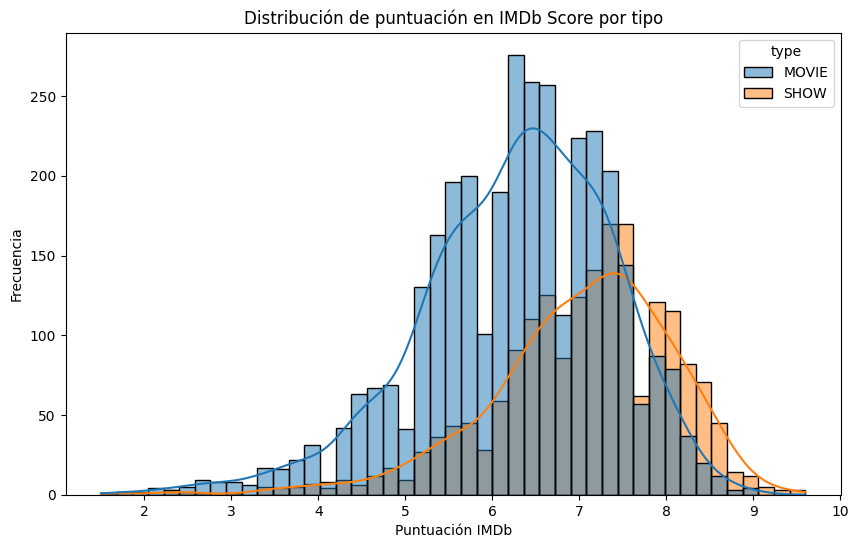

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='imdb_score', hue='type', kde=True, alpha=0.5)
plt.title('Distribución de puntuación en IMDb Score por tipo')
plt.xlabel('Puntuación IMDb')
plt.ylabel('Frecuencia')
plt.show()


Las series parecen tener una mayor dispersión en la parte baja del rango de calificación que las películas pese a contar con muchos menos valores por debajo de 3.5, lo que sugiere que hay más variabilidad en las calificaciones de las series mientras que las películas tienden a agruparse más hacia la media. 

Vemos que curiosamente aunque la curva desciende de forma muy parecida en la parte de 7.5 hasta 10 de las puntuaciones hay un mayor número de series valoradas muy positivamente. Esto es posible que tenga relación con el esfuerzo en contenidos nativos de Netflix y que aunque en el dataset haya más películas el esfuerzo curatorial de la plataforma se haya centrado en las series. 

Vamos a ver ahora las películas y series que cuentan con una puntuación mayor a 8 : 


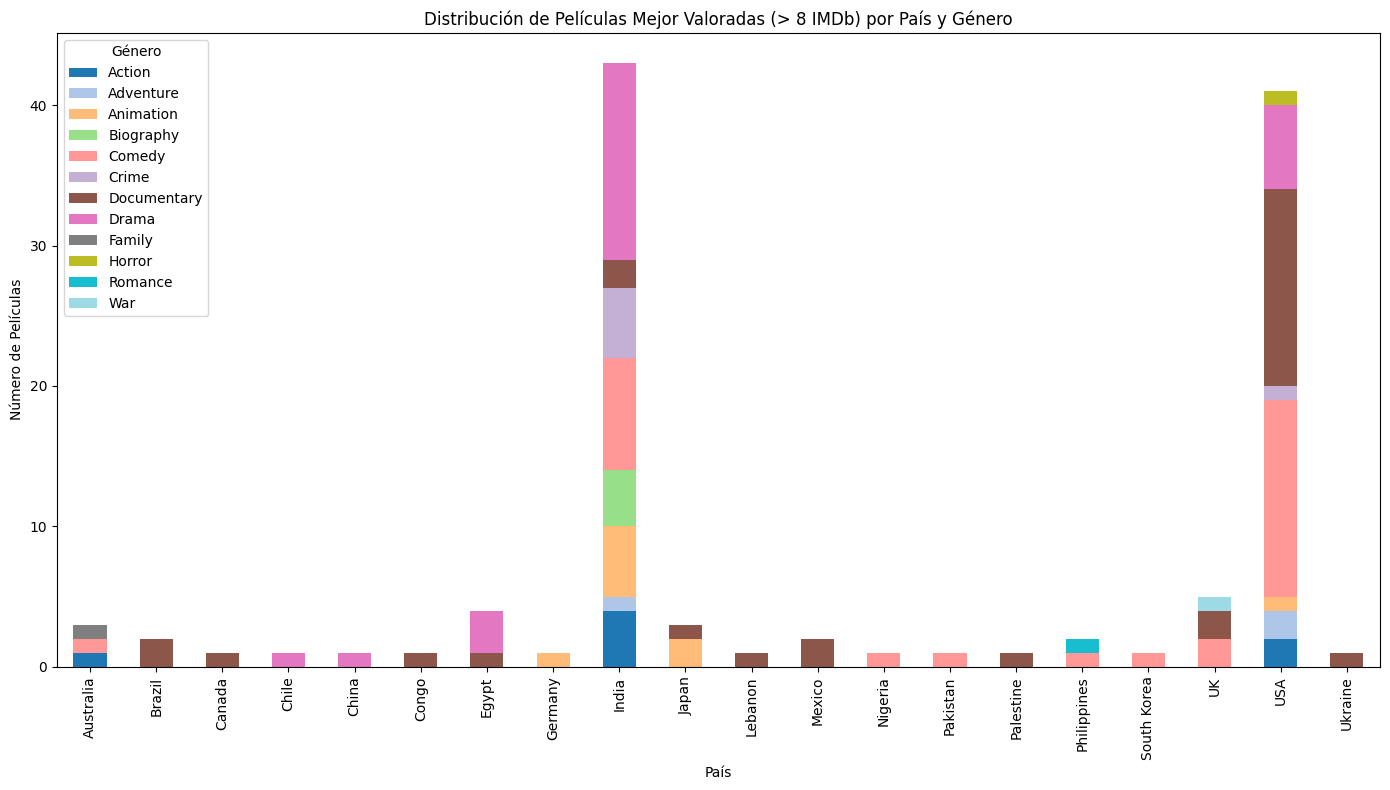

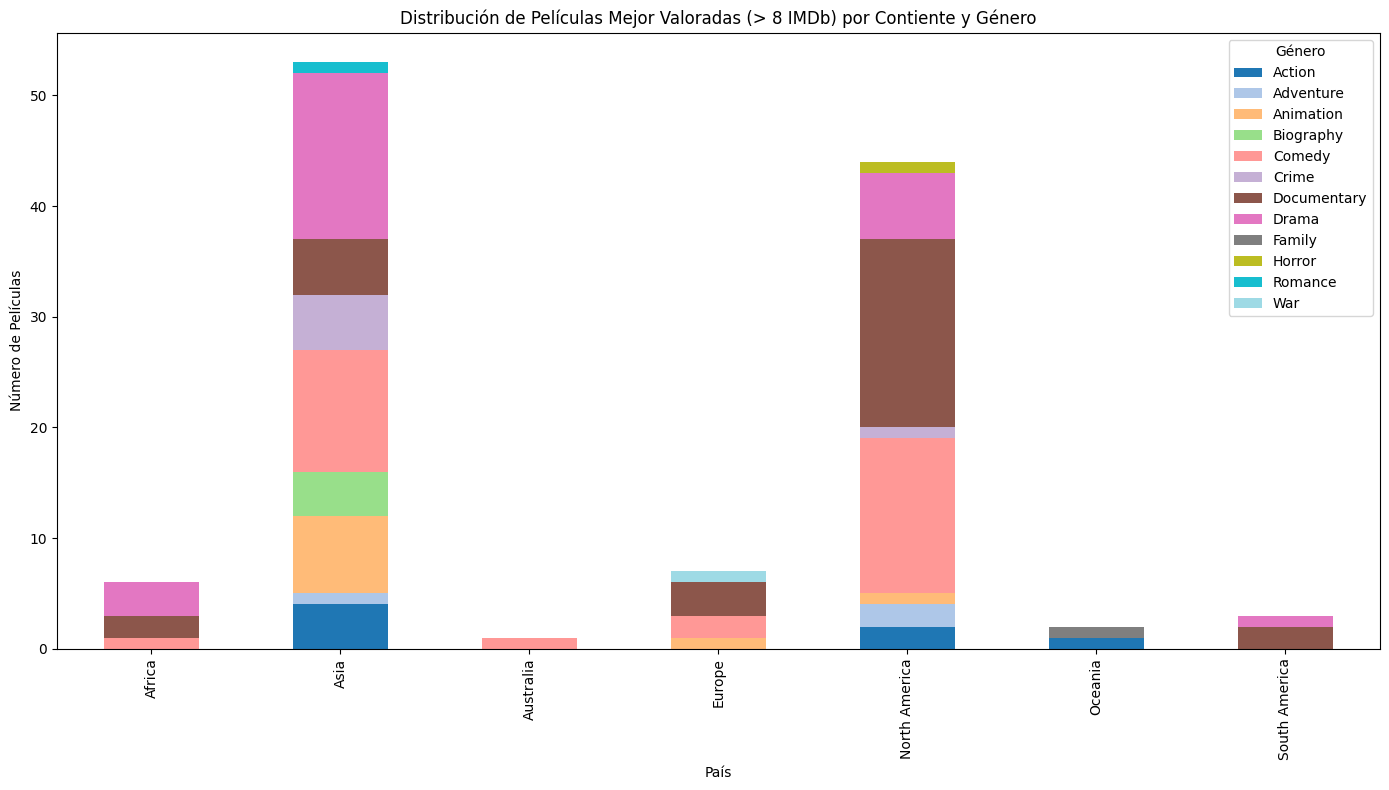

In [25]:
mejor_valorados = df[df['imdb_score'] > 8]

mejor_valorados_movies = mejor_valorados[mejor_valorados['type'] == 'MOVIE']
mejor_valorados_shows = mejor_valorados[mejor_valorados['type'] == 'SHOW']

plt.figure(figsize=(14, 8))
movie_plot = mejor_valorados_movies.groupby(['Country', 'genre1']).size().unstack(fill_value=0)
movie_plot.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())
plt.title('Distribución de Películas Mejor Valoradas (> 8 IMDb) por País y Género')
plt.xlabel('País')
plt.ylabel('Número de Películas')
plt.legend(title='Género')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
movie_plot = mejor_valorados_movies.groupby(['Continent', 'genre1']).size().unstack(fill_value=0)
movie_plot.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())
plt.title('Distribución de Películas Mejor Valoradas (> 8 IMDb) por Contiente y Género')
plt.xlabel('País')
plt.ylabel('Número de Películas')
plt.legend(title='Género')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




Vimos que la comedia era un factor importante en los outliers negativos de la puntuación pero también parece ser un factor influyente en las películas con alta puntuación. Vemos que en Asia y Norte América representan una buena parte de estos filmes. Es interesante como tiene mucho mayor peso el documental que el drama en las películas percibidas con alta calidad en Europa y Nore América, mientras que en las películas asiáticas si que tiene una parte importante debido a las películas indias , al igual que animación muy posiblemente por el anime ya que Japón solo aporta a estos datos animación y documental. 

Por otro lado si nos fijamos en el documental vemos que hay una cantidad de aportaciones interesantes de países del Sur Global o zonas en guerra. Brasil, Congo, Egipto, Líbano, México, Palestina, Ucránia son países que aportan básicamente documentales a esta estadística. Estados Unidos por su lado aporta una cantidad importante de documentales, vamos a verlo en detalle : 

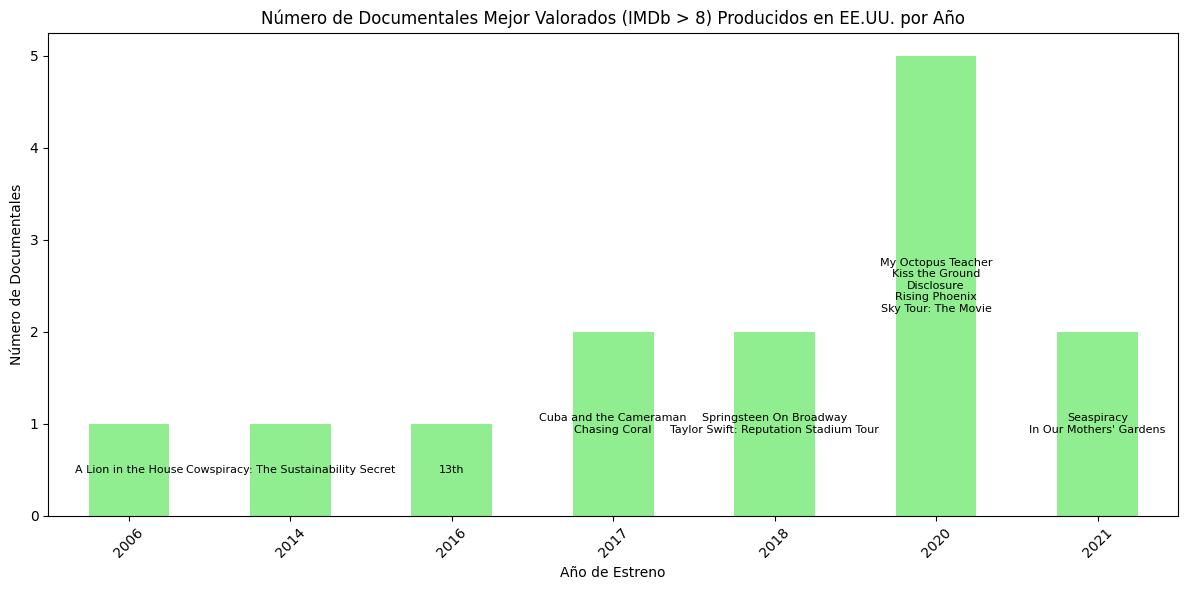

In [ ]:

mejor_valorados_movies_usa = mejor_valorados[(mejor_valorados['type'] == 'MOVIE') & (mejor_valorados['Country'] == 'USA')]

mejor_valorados_movies_usa_documentary = mejor_valorados_movies_usa[mejor_valorados_movies_usa['genre1'] == 'Documentary']

doc_counts = mejor_valorados_movies_usa_documentary.groupby('release_year').size()

plt.figure(figsize=(12, 6))
doc_counts.plot(kind='bar', color='lightgreen')

for i, (year, count) in enumerate(doc_counts.items()):
    titles = mejor_valorados_movies_usa_documentary[mejor_valorados_movies_usa_documentary['release_year'] == year]['title']
    titles_text = "\n".join(titles) 
    plt.text(i, count / 2, titles_text, ha='center', va='center', fontsize=8, color='black', rotation=0)

plt.title('Número de Documentales Mejor Valorados (IMDb > 8) Producidos en EE.UU. por Año')
plt.xlabel('Año de Estreno')
plt.ylabel('Número de Documentales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Vemos que los documentales con más alta nota del set de Netflix aon básicamente documentales de impacto ("conspiracy", "Seaspiracy"), musicales (Taylor Swift, Springsteen, Sky Tour)  de medio ambiente. Esto puede ser útil der cara a proponer a Neflix la incorporación de nuevos documentales de estos temas. 

Por lo estudiado vemos que las personas que valoran comedias en IMDb suelen mostrar un rango de opiniones con mucha dispersión ya que precisamente muchos outliers negativos y las películas mejor valoradas en ocasiones son comedias. Por ello a nivel de estudio de los datos podemos pensar que realizar campañas de marketing fuertes en relación a comedias puede estimular su viralidad, hacer que la gente opine sobre ellas, ya sea para bien o para mal. 

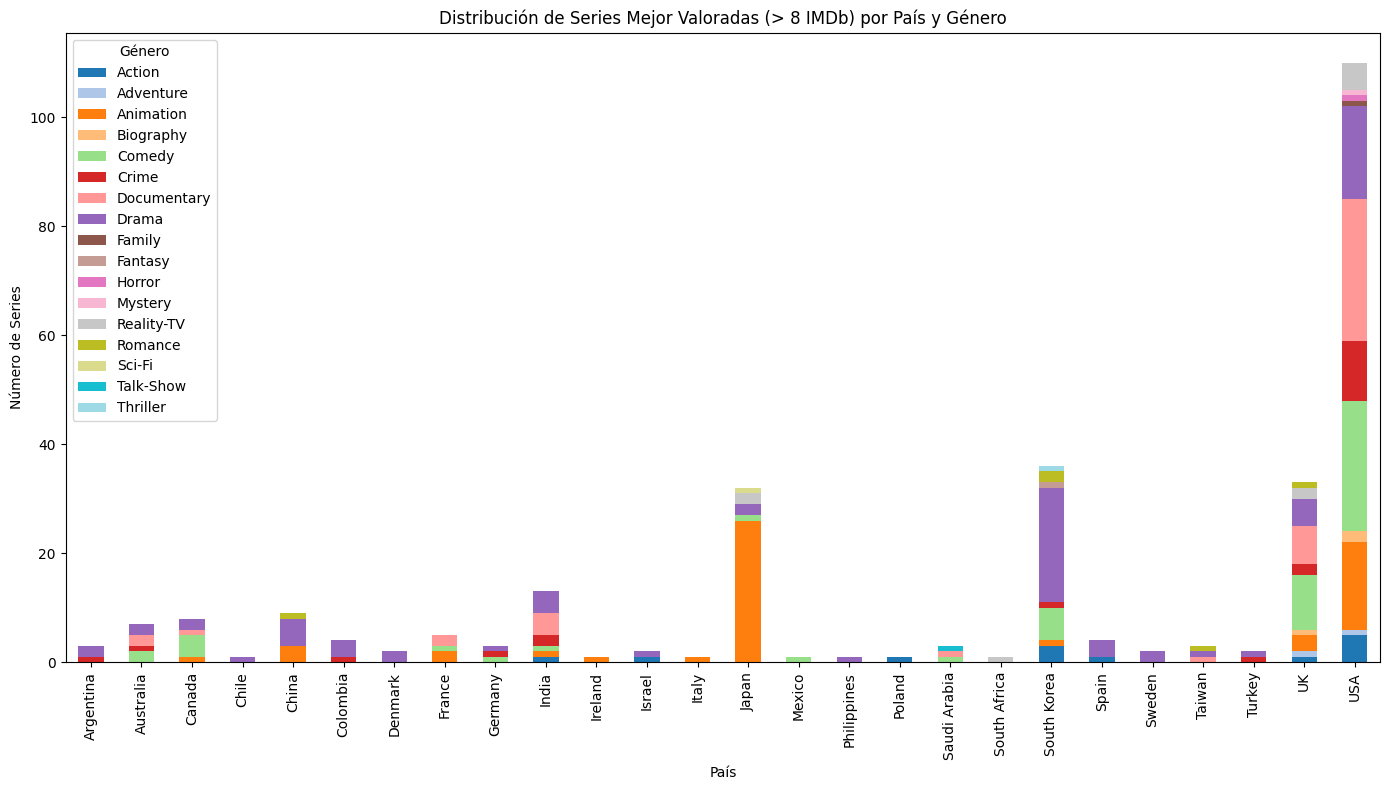

In [ ]:
plt.figure(figsize=(14, 8))
show_plot = mejor_valorados_shows.groupby(['Country', 'genre1']).size().unstack(fill_value=0)
show_plot.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())
plt.title('Distribución de Series Mejor Valoradas (> 8 IMDb) por País y Género')
plt.xlabel('País')
plt.ylabel('Número de Series')
plt.legend(title='Género')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

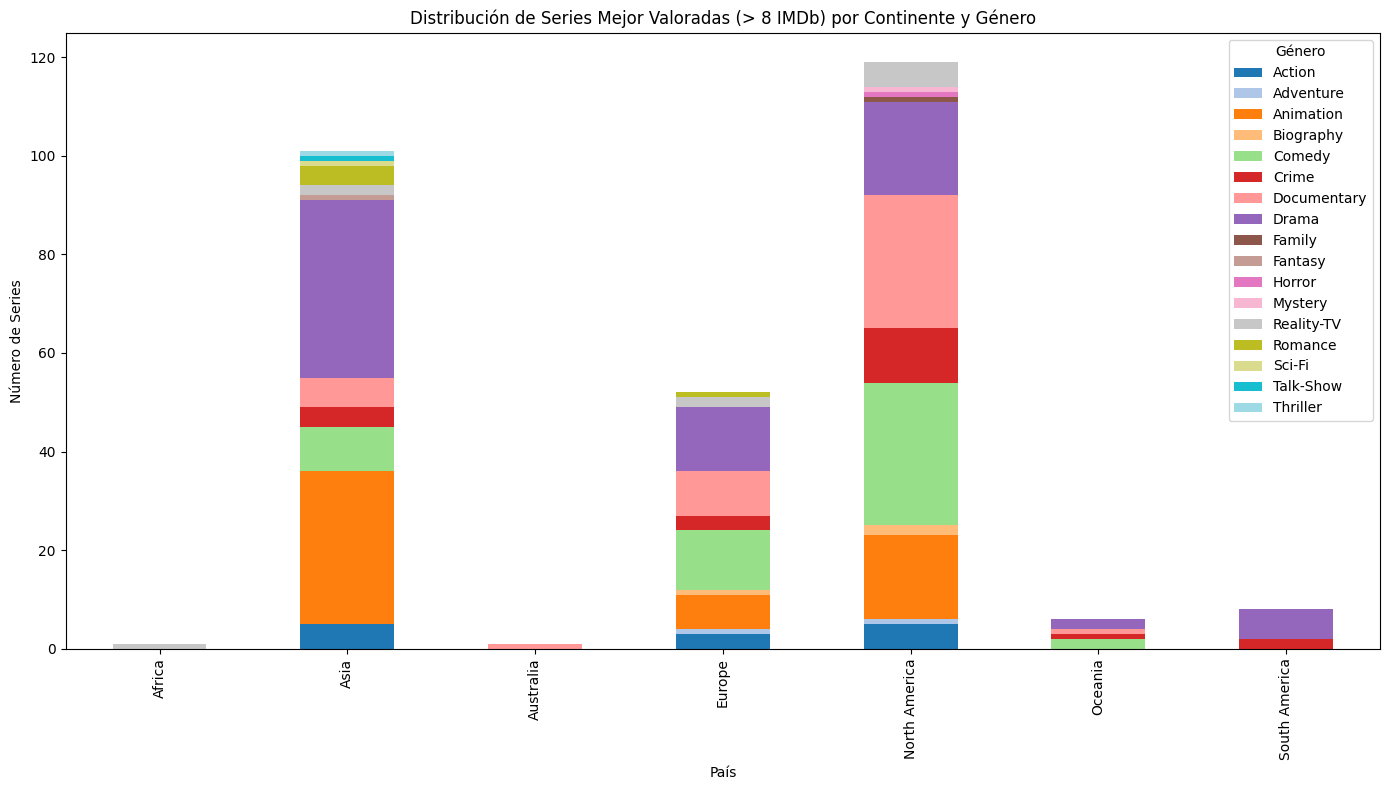

In [ ]:
plt.figure(figsize=(14, 8))
show_plot = mejor_valorados_shows.groupby(['Continent', 'genre1']).size().unstack(fill_value=0)
show_plot.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())
plt.title('Distribución de Series Mejor Valoradas (> 8 IMDb) por Continente y Género')
plt.xlabel('País')
plt.ylabel('Número de Series')
plt.legend(title='Género')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Con esto vemos que en las series hay una parte interesante de animación asiática (anime) en esta valoración. Los dramas de Corea del Sur también parecen recibir buenas valoraciones. Vemos que en series la comedia también está muy bien valorada especialmente la de América del Norte. La animación Norte Americana es un tema que vamos a ver más en detalle. 

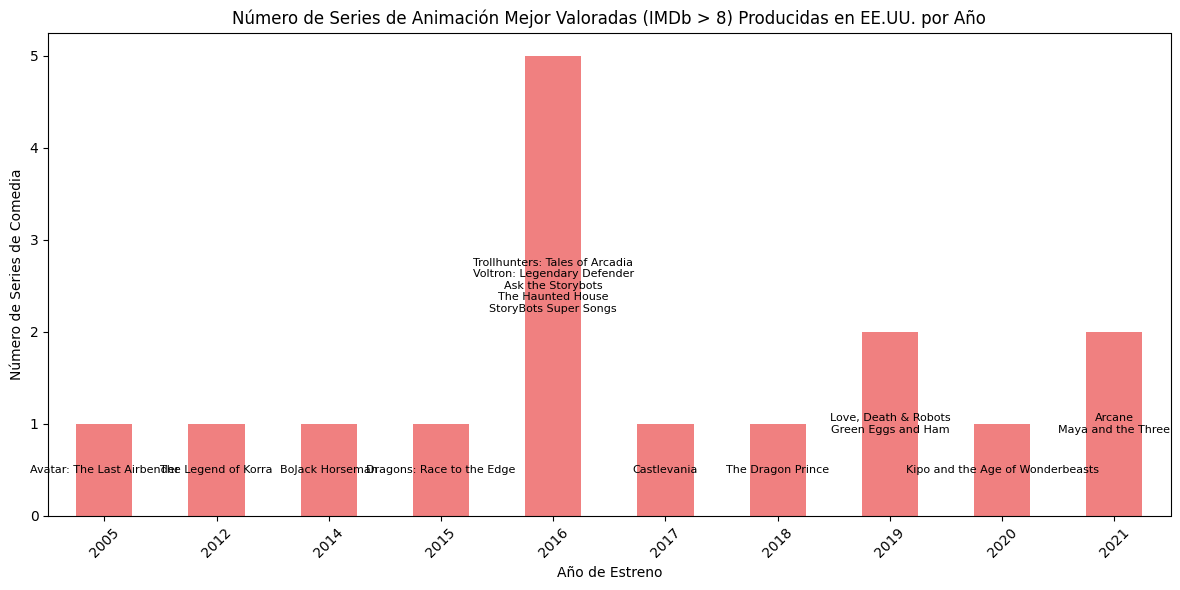

In [ ]:
mejor_valorados_shows_comedy = mejor_valorados[(mejor_valorados['type'] == 'SHOW') & 
                                               (mejor_valorados['genre1'] == 'Animation') & 
                                               (mejor_valorados['Country'] == 'USA')]

comedy_counts = mejor_valorados_shows_comedy.groupby('release_year').size()

plt.figure(figsize=(12, 6))
comedy_counts.plot(kind='bar', color='lightcoral')

for i, (year, count) in enumerate(comedy_counts.items()):
    titles = mejor_valorados_shows_comedy[mejor_valorados_shows_comedy['release_year'] == year]['title']
    titles_text = "\n".join(titles)  # Stacking titles vertically
    plt.text(i, count / 2, titles_text, ha='center', va='center', fontsize=8, color='black', rotation=0)

plt.title('Número de Series de Animación Mejor Valoradas (IMDb > 8) Producidas en EE.UU. por Año')
plt.xlabel('Año de Estreno')
plt.ylabel('Número de Series de Comedia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Vemos que en 2016 hubo una cantidad de animaciones claramente superior. 2 parece que son contenidos de Storybots : 

https://www.filmaffinity.com/es/film495201.html es una serie infantil educativa por lo que podemos ver. 

https://www.filmaffinity.com/es/film500190.html Catstlevania en 2017 es en realidad una producción Amercana pero con equipo japonés y también anime. Refuerza la teoría del interés en el anime.

También podemos ver que hay una serie de animaciones de EEUU dirigidas a un público adulto como Bojack Horseman o Love, Death & Robots. 

https://www.lavanguardia.com/peliculas-series/series/the-haunted-house-70288 The Haunted House es coreana, entonces es un error de etiquetado de los datos. La influencia de la animación asiática en el df es significativa. 

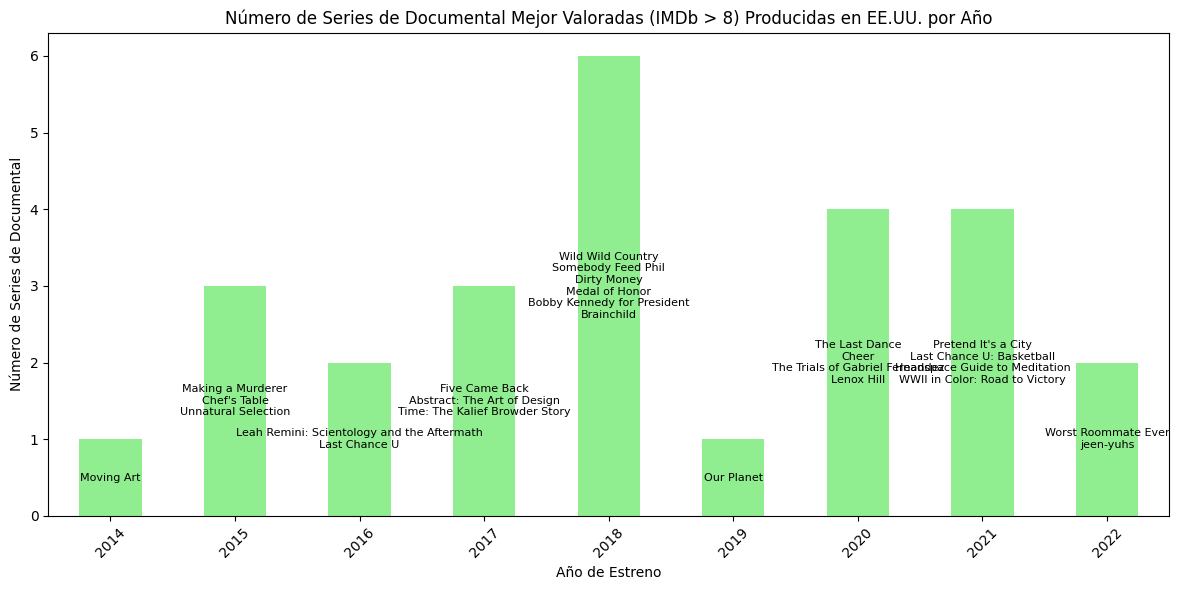

In [ ]:
mejor_valorados_shows_doc = mejor_valorados[(mejor_valorados['type'] == 'SHOW') & 
                                               (mejor_valorados['genre1'] == 'Documentary') & 
                                               (mejor_valorados['Country'] == 'USA')]

doc_counts = mejor_valorados_shows_doc.groupby('release_year').size()

plt.figure(figsize=(12, 6))
doc_counts.plot(kind='bar', color='lightgreen')

for i, (year, count) in enumerate(doc_counts.items()):
    titles = mejor_valorados_shows_comedy[mejor_valorados_shows_doc['release_year'] == year]['title']
    titles_text = "\n".join(titles)  # Stacking titles vertically
    plt.text(i, count / 2, titles_text, ha='center', va='center', fontsize=8, color='black', rotation=0)

# Setting titles and labels in Spanish
plt.title('Número de Series de Documental Mejor Valoradas (IMDb > 8) Producidas en EE.UU. por Año')
plt.xlabel('Año de Estreno')
plt.ylabel('Número de Series de Documental')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
mejor_valorados_shows_doc.describe() 

index  release_year    runtime  imdb_score     imdb_votes  \
count    26.000000     26.000000  26.000000   26.000000      26.000000   
mean   2697.500000   2018.346154  49.769231    8.373077   14218.269231   
std    1309.529511      2.331391  16.005768    0.338890   27227.836542   
min     995.000000   2014.000000  22.000000    8.100000       8.000000   
25%    1756.250000   2017.000000  45.250000    8.100000    1705.000000   
50%    2311.000000   2018.000000  50.500000    8.250000    4953.000000   
75%    3422.000000   2020.000000  59.000000    8.500000    8641.500000   
max    4930.000000   2022.000000  93.000000    9.300000  108321.000000   

        duration       decade  
count  26.000000    26.000000  
mean   39.730769  2013.846154  
std    12.154202     4.961389  
min    21.000000  2010.000000  
25%    29.750000  2010.000000  
50%    43.000000  2010.000000  
75%    50.250000  2020.000000  
max    58.000000  2020.000000

En este describe queríamos ver especialmente el runtime para valorar los documentales americanos que tienen más de 8.0 en IMDb scores. Podemos ver que la media del runtime es de aproximadamente 50 minutos, lo que se corresponde bastante con la media de runtime de SHOW en general, algún título llega a los 93 minutos, podría pasar como hemos visto par algún producto de Netflix puede llegar a estas duraciones. Por la std vemos que hay bastante varianza. Hay documentales de 22 minutos. 

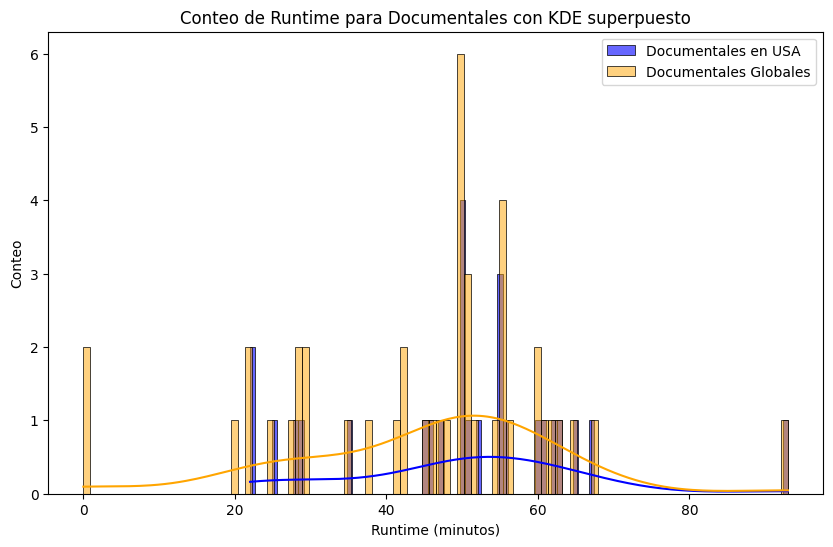

In [ ]:
mejor_valorados_shows_doc = mejor_valorados[(mejor_valorados['type'] == 'SHOW') & 
                                            (mejor_valorados['genre1'] == 'Documentary') & 
                                            (mejor_valorados['Country'] == 'USA')]

mejor_valorados_shows_doc_general = mejor_valorados[(mejor_valorados['type'] == 'SHOW') & 
                                                    (mejor_valorados['genre1'] == 'Documentary')]

plt.figure(figsize=(10, 6))
sns.histplot(mejor_valorados_shows_doc['runtime'], bins=100, kde=True, color='blue', label='Documentales en USA', alpha=0.6)
sns.histplot(mejor_valorados_shows_doc_general['runtime'], bins=100, kde=True, color='orange', label='Documentales Globales', alpha=0.5)
plt.title('Conteo de Runtime para Documentales con KDE superpuesto')
plt.xlabel('Runtime (minutos)')
plt.ylabel('Conteo')
plt.legend()
plt.show()


Vemos que en el runtime de documentales globales hay dos series documentales que son extremadamente breves y tenemos que ver que pasa con estos dos títulos. En general vemos que la mayoría están entre los 20 y 70 minutos aunque a nivel global son algo más largos.  Los documentales algo más cortos de EEUU parece que tienen buenos resultados así que para Netfllix puede ser interesante tener esto en cuenta. 

In [ ]:
filtro = mejor_valorados_shows_doc_general['runtime'] < 3
mejor_valorados_shows_doc_general_filtered = mejor_valorados_shows_doc_general[filtro]

mejor_valorados_shows_doc_general_filtered

index                 title  type  \
2503   2503  Daughters of Destiny  SHOW   
4132   4132             Twogether  SHOW   

                                            description  release_year  \
2503  Five girls from India's most impoverished fami...          2017   
4132                                        Travel show          2020   

     age_certification  runtime  imdb_score  imdb_votes       genre1 genre2  \
2503               NaN        0         8.6       900.0  Documentary    NaN   
4132               NaN        0         8.4       456.0  Documentary    NaN   

     Country Continent Language  duration  decade  
2503   India      Asia  English        55    2010  
4132  Taiwan      Asia   Korean        35    2020

https://www.imdb.com/title/tt1877895/?language=es-es Daughters of Destiny tiene una duración de 60 minutos, es un error de los datos. Viendo esto tenemos que ver de todo el df si hay más errores. 

https://www.netflix.com/es/title/81095953 Twogether es una serie documental Taiwanesa cuyos capítulos también duran 60 minutos. 

Vamos a ver si en el df hay otros problemas similares y corregir estos errores : 

In [ ]:
df.loc[df['title'].isin(["Daughters of Destiny", "Twogether"]), 'runtime'] = 60

df[df['title'].isin(["Daughters of Destiny", "Twogether"])]


index                 title  type  \
2503   2503  Daughters of Destiny  SHOW   
4132   4132             Twogether  SHOW   

                                            description  release_year  \
2503  Five girls from India's most impoverished fami...          2017   
4132                                        Travel show          2020   

     age_certification  runtime  imdb_score  imdb_votes       genre1 genre2  \
2503               NaN       60         8.6       900.0  Documentary    NaN   
4132               NaN       60         8.4       456.0  Documentary    NaN   

     Country Continent Language  duration  decade  
2503   India      Asia  English        55    2010  
4132  Taiwan      Asia   Korean        35    2020

Arreglado esto vamos a ver productos de 0 o 1 minutos (he observado que los de 2 o 3 minutos son contenidos válidos en su mayoría, infantiles, musicales, etc). 

In [ ]:
filtro_corto = df['runtime'] < 1 
df[filtro_corto]

index                                      title  type  \
450     450              Kung Fu Panda Awesome Secrets  SHOW   
455     455  Dreamworks Happy Holidays from Madagascar  SHOW   
535     535                          Pedro El Escamoso  SHOW   
840     840                                   Masameer  SHOW   
2996   2996                                   Afronta!  SHOW   
3528   3528                        Beyblade Burst Rise  SHOW   
3733   3733                      Basketball or Nothing  SHOW   
3743   3743                Bad Boy Billionaires: India  SHOW   
3757   3757               The Forest of Love: Deep Cut  SHOW   
4025   4025               Pili Fantasy: War of Dragons  SHOW   
4161   4161   Larry Charles' Dangerous World of Comedy  SHOW   
4961   4961                                   Sharkdog  SHOW   
5098   5098                                  Dive Club  SHOW   
5128   5128                         Metal Shop Masters  SHOW   
5210   5210                     Buried by the Bernards  SHOW   
5282   5282         Mighty Little Bheem: Kite Festival  SHOW   

                                            description  release_year  \
450   In this pair of adventures, Po tells the story...          2008   
455   Madagascar goes wild with holiday spirit in th...          2005   
535   Pedro el escamoso is a popular telenovela film...          2001   
840   A popular Saudi animation show talks sarcastic...          2011   
2996  Afronta invites contemporary black artists and...          2017   
3528  Beyblade Burst Rise, also known as Beyblade Bu...          2019   
3733  the lives of the Chinle High School boys' bask...          2019   
3743  This investigative docuseries explores the gre...          2020   
3757  Nothing's as it seems when a charismatic conma...          2020   
4025  Turmoil looms in the Martial World, and the Ei...          2019   
4161  Legendary comedy writer and director Larry Cha...          2019   
4961  10 year old Max and his best friend Sharkdog -...          2021   
5098  Dive Club follows the story of a feisty group ...          2021   
5128  A group of metal artists torch, cut and weld e...          2021   
5210  In this reality series, the bickering but big-...          2021   
5282  With winter behind them, Bheem and his townspe...          2021   

     age_certification  runtime  imdb_score  imdb_votes       genre1  \
450                NaN        0         7.2        55.0    Animation   
455              TV-PG        0         6.5        96.0    Animation   
535              TV-14        0         7.5       303.0       Comedy   
840              TV-MA        0         8.2       677.0       Comedy   
2996             TV-PG        0         7.4         8.0  Documentary   
3528               NaN        0         5.7       156.0    Animation   
3733             TV-PG        0         7.4       614.0  Documentary   
3743             TV-14        0         7.9      3010.0  Documentary   
3757             TV-MA        0         6.8       426.0        Drama   
4025             TV-14        0         6.7        37.0      Fantasy   
4161             TV-MA        0         7.3       570.0  Documentary   
4961              TV-Y        0         6.2       136.0    Animation   
5098             TV-PG        0         6.2       789.0    Adventure   
5128             TV-MA        0         5.6       546.0   Reality-TV   
5210             TV-14        0         7.3       339.0   Reality-TV   
5282               NaN        0         8.8        16.0    Animation   

            genre2       Country      Continent  Language  duration  decade  
450         Comedy           USA  North America   English        48    2000  
455         Family           USA  North America   English        27    2000  
535          Drama      Colombia  South America   Spanish        20    2000  
840            NaN  Saudi Arabia           Asia    Arabic        58    2010  
2996           NaN      Colombia  South America   English   

Viendo que estos productos tienen 0 minutos vamos a corregirlo. He pedido a Chat GPT que cree un diccionario con la corrección de los runtimes. 

In [ ]:
runtime_corrections = {
    "Kung Fu Panda Awesome Secrets": 22,
    "Dreamworks Happy Holidays from Madagascar": 22,
    "Pedro El Escamoso": 45,
    "Masameer": 20,
    "Daughters of Destiny": 60,
    "Afronta!": 25,
    "Beyblade Burst Rise": 24,
    "Basketball or Nothing": 30,
    "Bad Boy Billionaires: India": 60,
    "The Forest of Love: Deep Cut": 60,
    "Pili Fantasy: War of Dragons": 25,
    "Twogether": 60,
    "Larry Charles' Dangerous World of Comedy": 60,
    "Sharkdog": 7,
    "Dive Club": 30,
    "Metal Shop Masters": 45,
    "Buried by the Bernards": 30,
    "Mighty Little Bheem: Kite Festival": 5
}

df['runtime'] = df.apply(lambda x: runtime_corrections.get(x['title'], x['runtime']), axis=1)


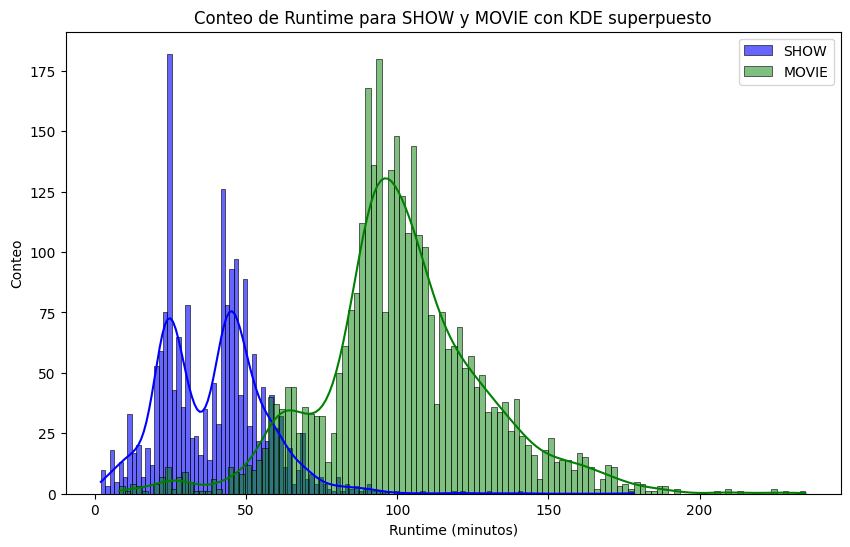

In [ ]:

df_show_runtime = df[(df['type'] == 'SHOW') & df['runtime'].notna()]['runtime']
df_movie_runtime = df[(df['type'] == 'MOVIE') & df['runtime'].notna()]['runtime']

plt.figure(figsize=(10, 6))
sns.histplot(df_show_runtime, bins=120, kde=True, color='blue', label='SHOW', alpha=0.6)
sns.histplot(df_movie_runtime, bins=120, kde=True, color='green', label='MOVIE', alpha=0.5)
plt.title('Conteo de Runtime para SHOW y MOVIE con KDE superpuesto')
plt.xlabel('Runtime (minutos)')
plt.ylabel('Conteo')
plt.legend()
plt.show()



Ahora con los pdoudctos de 0 minutos corregidos podemos ver como la distribución de series tiene algo interesante que es al ser bimodal podemos ver como hay dos tipos de series claramente marcadas, las más breves que posiblamente sean de animación o infantiles mientras que después están series documentales dirigidos a un público adulto que se concentran alrededor de 50 minutos. 

De lo que está etiquetado como MOVIE podemos ver que hay esa concentración central que ya habíamos comentado alrededor de los 100 minutos. La distribución tiene esta parte más plana de películas cortas entre 50 y 80 minutos. Los outliers ya los hemos comentado y estudiado. 


Vamos a ver si hay algún tipo de relación visible entre las puntuaciones de IMDb y la duración de los episodios. Vamos a dividir las puntuaciones en "Muy mala" de 0 a 2.5, "Mala" de 2.5, "Buena" de 2.5 a 7.5 y "Muy buena" de 7.5 a 10. Después veamos por la duración de type que tenemos: 

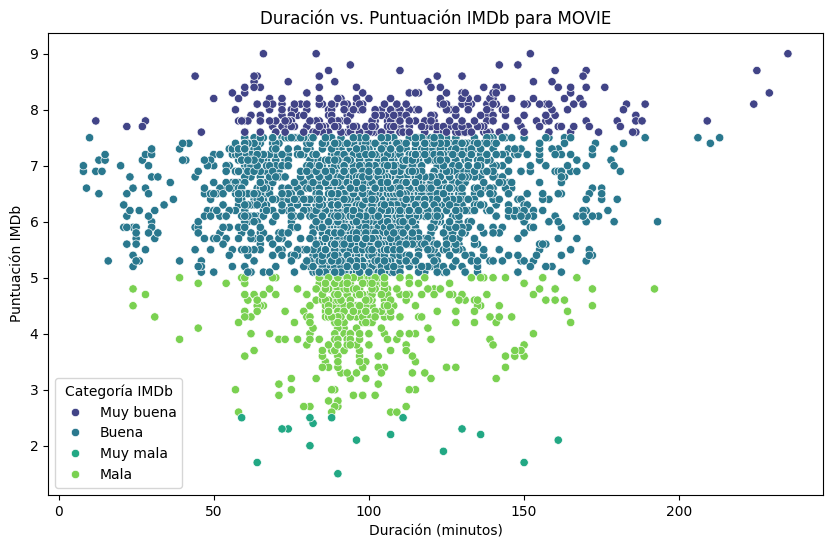

In [ ]:

def categorize_imdb_score(score):
    if score <= 2.5:
        return "Muy mala"
    elif score <= 5:
        return "Mala"
    elif score <= 7.5:
        return "Buena"
    else:
        return "Muy buena"

df['IMDB_Category'] = df['imdb_score'].apply(categorize_imdb_score)

df_movie = df[df['type'] == 'MOVIE']
df_show = df[df['type'] == 'SHOW']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_movie, x='runtime', y='imdb_score', hue='IMDB_Category', palette='viridis')
plt.title("Duración vs. Puntuación IMDb para MOVIE")
plt.xlabel("Duración (minutos)")
plt.ylabel("Puntuación IMDb")
plt.legend(title="Categoría IMDb")
plt.show()




En este gráfico podemos ver que en general al haber una cantidad mayor de películas en valoresde entre 90 y 130 o 140 minutos pues hay una mayor concentración de datos y por tanto mayor variedad en las puntuaciones pero podemos ver como la franja de clasificaciones Buena es especialmente densa entre los 90 y 110 minutos, siendo las otras más vacías. 

La franja de calificaciones muy buenas tiene algo interesante y es que en los títulos MOVIE muy cortos hay algunas notas en la parte baja de esta fanja (curiosamente nada en malas o muy malas) y en el último tramo de duraciones, a partir de 200 minutos ya solo quedan películas con muy buena calificación y 3 con buena. 

Los productos de larga duración aunque son más escasos han tenido buenas valoaciones, cuando más se extiende la duración menos notas bajas hay aunque haya menos frecuencia de productos. Esto hace pensar que Netflix podría estar interesado en incluir otras películas largas, sobretodo como hemos podido ver Indias ya que los fans de esos títulos parecen bastante fieles y se interesarán en el contenido parece indidcar el gráfico. 

La franja de películas con buena calificación vemos que estira más para el lado de las películas cortas, ahí hay más variedad de géneros, nacionalidades, etc. Vamos a hacer un pequeño estudio de las películas cortas con valoración de 5  a 7.5 para ver que insights podemos sacar de ahí : 

/var/folders/k5/0ckgxv2x46n7_p0qwn2h0hhh0000gn/T/ipykernel_742/143779821.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['IMDB_Category'] = df_filtered['imdb_score'].apply(categorize_imdb_score)
/var/folders/k5/0ckgxv2x46n7_p0qwn2h0hhh0000gn/T/ipykernel_742/143779821.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Country'] = pd.Categorical(df_filtered['Country'], categories=country_counts, ordered=True)


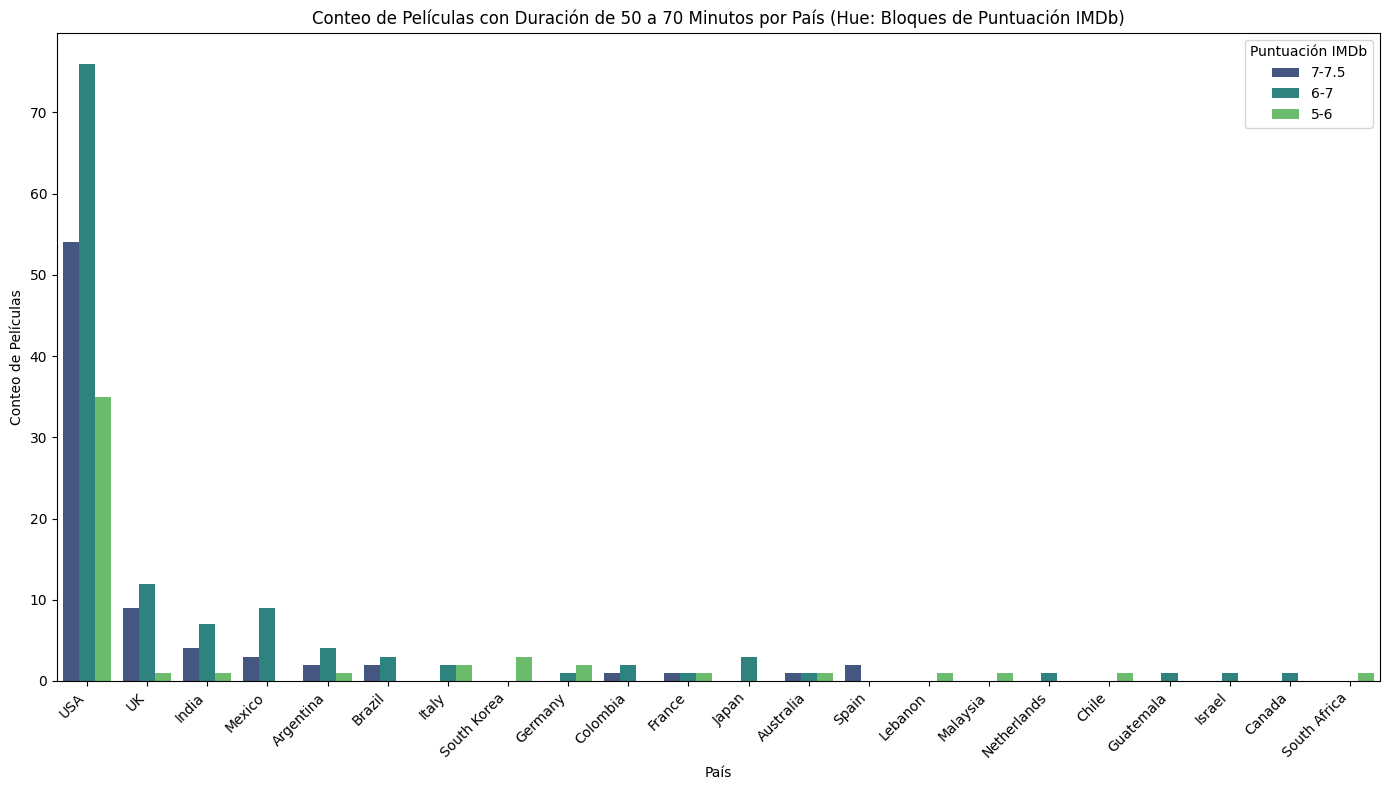

In [ ]:

df_filtered = df_movie[(df_movie['runtime'] >= 50) & (df_movie['runtime'] <= 70) & 
                       (df_movie['imdb_score'] >= 5) & (df_movie['imdb_score'] <= 7.5)]

df_filtered['IMDB_Category'] = df_filtered['imdb_score'].apply(categorize_imdb_score)

country_counts = df_filtered['Country'].value_counts().index
df_filtered['Country'] = pd.Categorical(df_filtered['Country'], categories=country_counts, ordered=True)

plt.figure(figsize=(14, 8))
sns.countplot(data=df_filtered, x='Country', hue='IMDB_Category', palette='viridis')
plt.title("Conteo de Películas con Duración de 50 a 70 Minutos por País (Hue: Bloques de Puntuación IMDb)")
plt.xlabel("País")
plt.ylabel("Conteo de Películas")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Puntuación IMDb")
plt.tight_layout()
plt.show()


Vemos que en este conjunto USA es claramente el país que más películas cortas con valoración correcta tiene en este conjunto. No es sorprendente teniendo en cuenta que en general es el país que más aporta en el dataset y un valor muy importante para Netflix, vamos a analizar por géneros estas películas de cortas de 50 a 70 minutos que tienen de 7 a 7.5 de puntuación para ver que géneros aportan este volumen:  

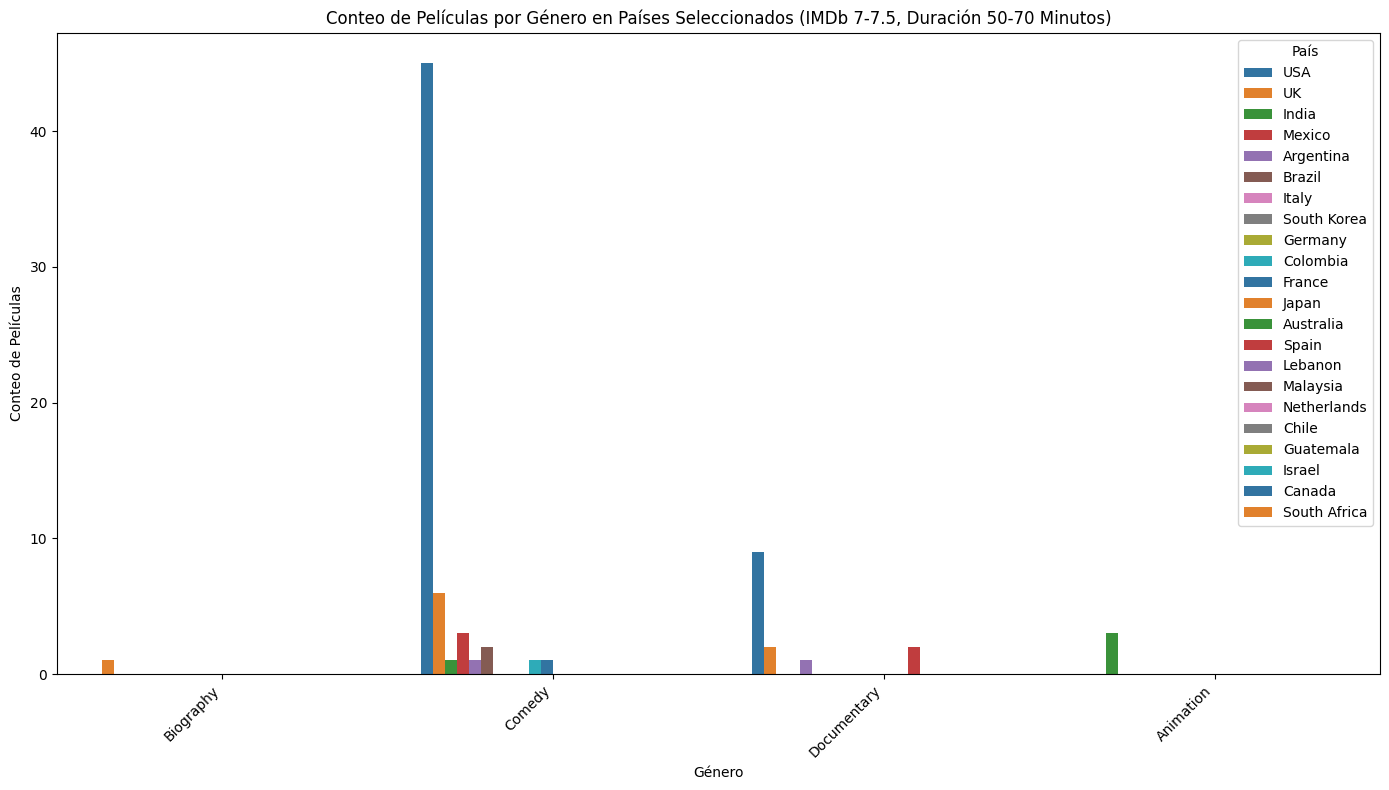

In [ ]:
countries_of_interest = ['USA', 'India', 'Mexico', 'Argentina', 'Spain', 'UK', 'Colombia', 'Brazil','France']
df_filtered_genre = df_filtered[
    (df_filtered['Country'].isin(countries_of_interest)) &
    (df_filtered['imdb_score'] >= 7) &
    (df_filtered['imdb_score'] <= 7.5)
]

plt.figure(figsize=(14, 8))
sns.countplot(data=df_filtered_genre, x='genre1', hue='Country', palette='tab10')  # Usar una paleta con colores distintos
plt.title("Conteo de Películas por Género en Países Seleccionados (IMDb 7-7.5, Duración 50-70 Minutos)")
plt.xlabel("Género")
plt.ylabel("Conteo de Películas")
plt.xticks(rotation=45, ha='right')
plt.legend(title="País")
plt.tight_layout()
plt.show()

La conclusión es clara. Las comedias, sobretodo las de USA son las protagonistas de esta franja de películas cortas que rondan el 7 - 7.5 . Esto es interesante para el análisis ya que producir películas breves suele ser más barato que producir películas más largas, por lo que Netflix puede beneficiarse de una producción de películas de comedia cortas estable en Estados Unidos que serán del gusto de la audiencia. Aunque no sea una puntuación brillante es suficiente como para ser un driver a su consumo. Vamos a ver si tenemos informació suficiente sobre el la clasificación por edad para aportar más insights : 

/var/folders/k5/0ckgxv2x46n7_p0qwn2h0hhh0000gn/T/ipykernel_742/1256144568.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_cert_counts.index, y=age_cert_counts.values, palette="coolwarm")


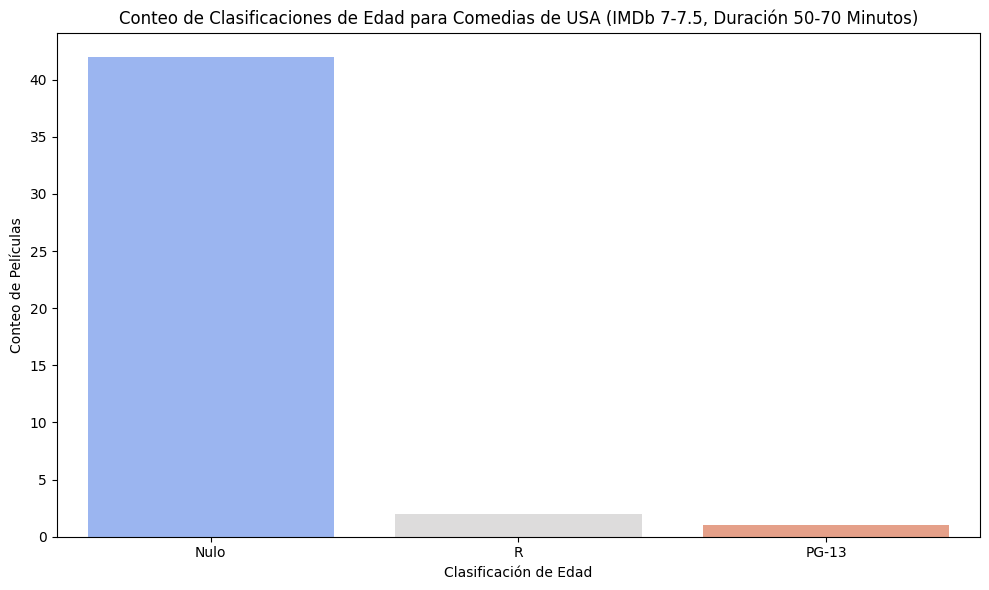

In [ ]:
df_usa_comedy = df_filtered_genre[(df_filtered_genre['Country'] == 'USA') & (df_filtered_genre['genre1'] == 'Comedy')]

age_cert_counts = df_usa_comedy['age_certification'].value_counts(dropna=False)

age_cert_counts.index = age_cert_counts.index.fillna('Nulo')

plt.figure(figsize=(10, 6))
sns.barplot(x=age_cert_counts.index, y=age_cert_counts.values, palette="coolwarm")
plt.title("Conteo de Clasificaciones de Edad para Comedias de USA (IMDb 7-7.5, Duración 50-70 Minutos)")
plt.xlabel("Clasificación de Edad")
plt.ylabel("Conteo de Películas")
plt.tight_layout()
plt.show()


No, podemos decir que no tenemos información relevante ya que la mayoría son nulos, sólo vemos que la información que tenemos sobre estos datos es que son R de Restricted y PG-13 lo que hace pensar que estas comedias están orientadas a un público adolescente o adultos jóvenes pero son muy pocos datos. Vamos a ver ahora las series: 

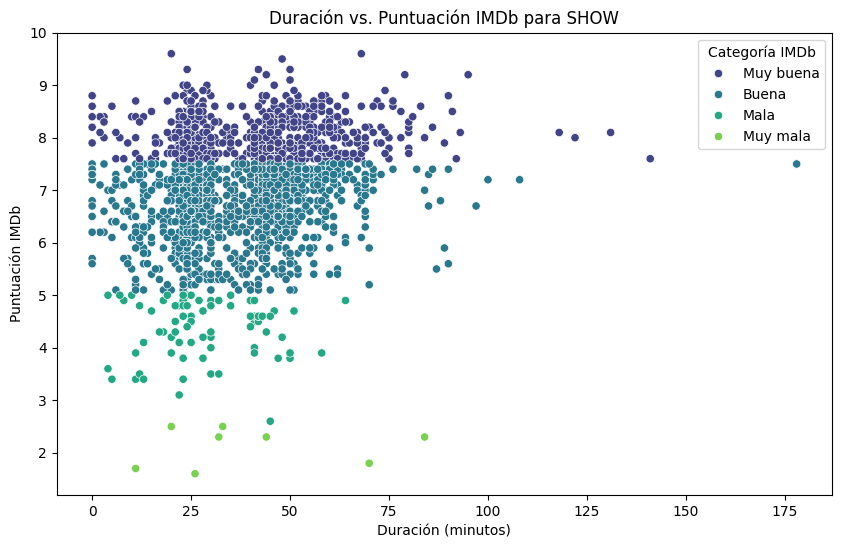

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_show, x='runtime', y='imdb_score', hue='IMDB_Category', palette='viridis')
plt.title("Duración vs. Puntuación IMDb para SHOW")
plt.xlabel("Duración (minutos)")
plt.ylabel("Puntuación IMDb")
plt.legend(title="Categoría IMDb")
plt.show()

Sobre los shows podemos hacer una serie de observaciones : 

- Los shows en general no suelen caer mucho en la categoría muy mala y si lo hacen curiosamente nunca es en los que son realmente largos para ser show. Los shows más largos de 90 miuntos aprox sólo son valorados como buenos o muy buenos. 

- En la distribución por densidad vemos los dos grupos de shos cortos uniforme que tiran más hacia bueno y muy bueno y los más largos, que a medida que se alargan tienen la misma cantidad de buena/muy buena pero nunca caen en valores bajos. 

- En este caso sería interesante tomar dos muestras para estudio : Las series con calificaciones muy buenas de menos de 24 minutos y las de más de 100 minutos. 

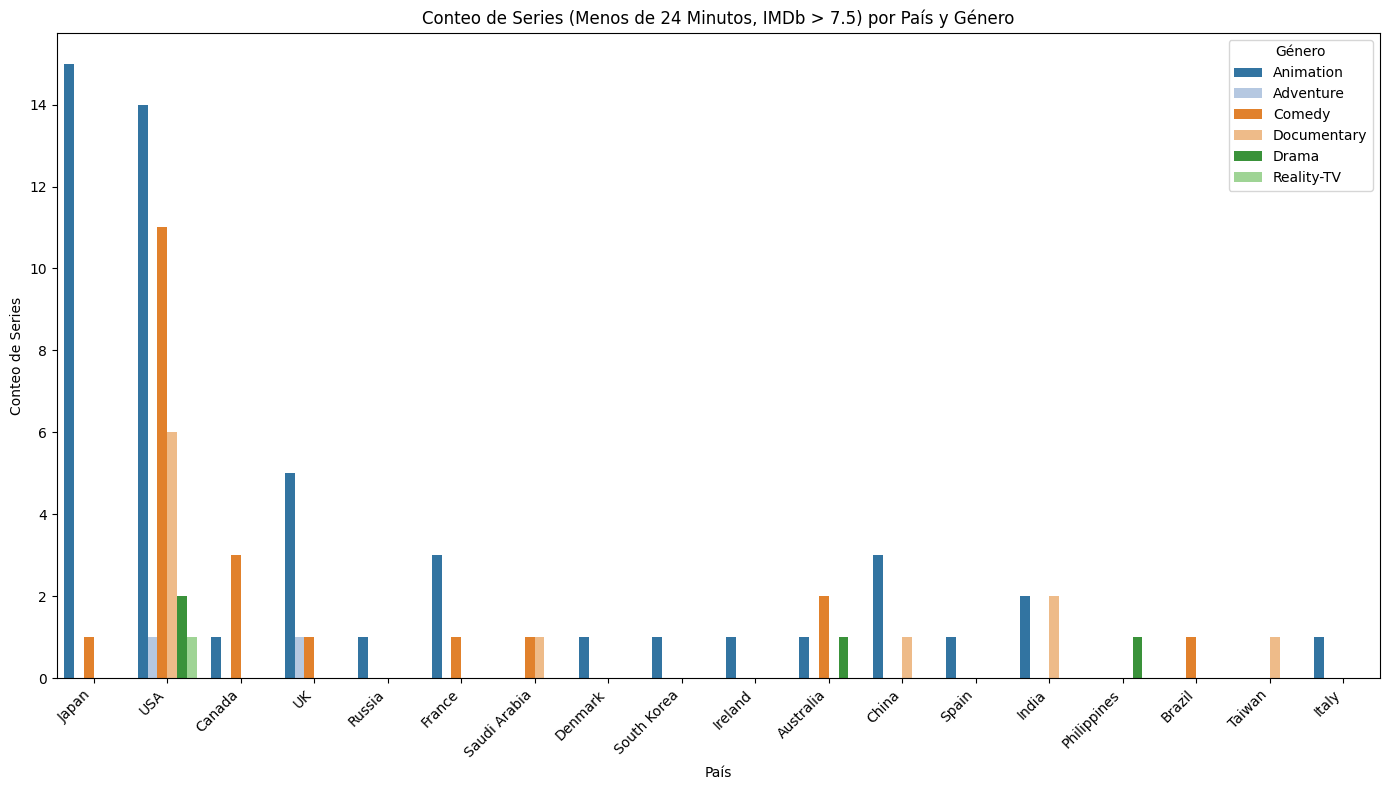

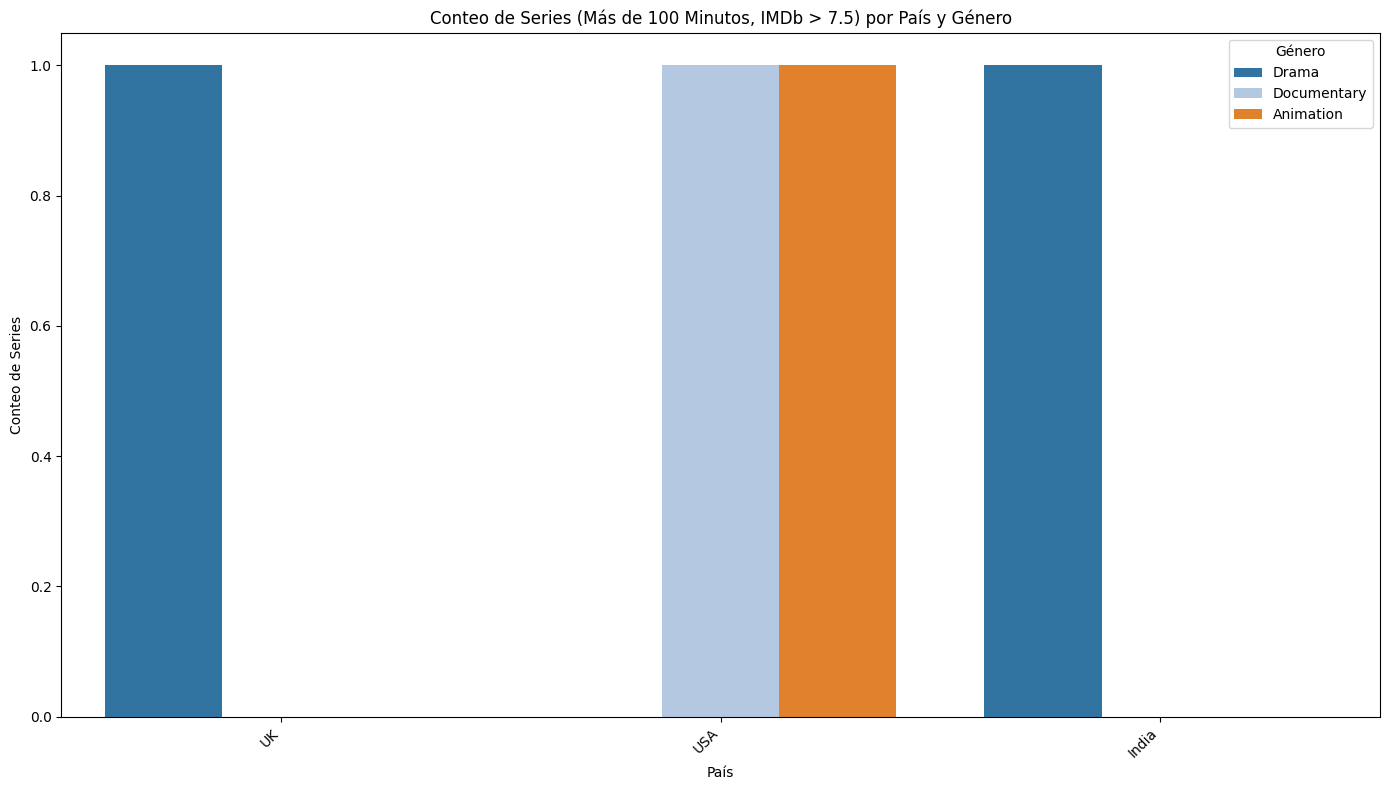

In [ ]:
df_show_very_good = df[(df['type'] == 'SHOW') & (df['imdb_score'] > 7.5)]

df_show_short = df_show_very_good[df_show_very_good['runtime'] < 24]
df_show_long = df_show_very_good[df_show_very_good['runtime'] > 100]

plt.figure(figsize=(14, 8))
sns.countplot(data=df_show_short, x='Country', hue='genre1', palette='tab20')
plt.title("Conteo de Series (Menos de 24 Minutos, IMDb > 7.5) por País y Género")
plt.xlabel("País")
plt.ylabel("Conteo de Series")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Género")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data=df_show_long, x='Country', hue='genre1', palette='tab20')
plt.title("Conteo de Series (Más de 100 Minutos, IMDb > 7.5) por País y Género")
plt.xlabel("País")
plt.ylabel("Conteo de Series")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Género")
plt.tight_layout()
plt.show()


Viendo estos gráficos vemos que en el formato croto claramente el ganador es la animación. Las series de animación reciben por lo general muy buena valoración en IMDd, vamos a ver si el número de series de animación bien valoradas es cada vez mayor o sigue algún patrón: 

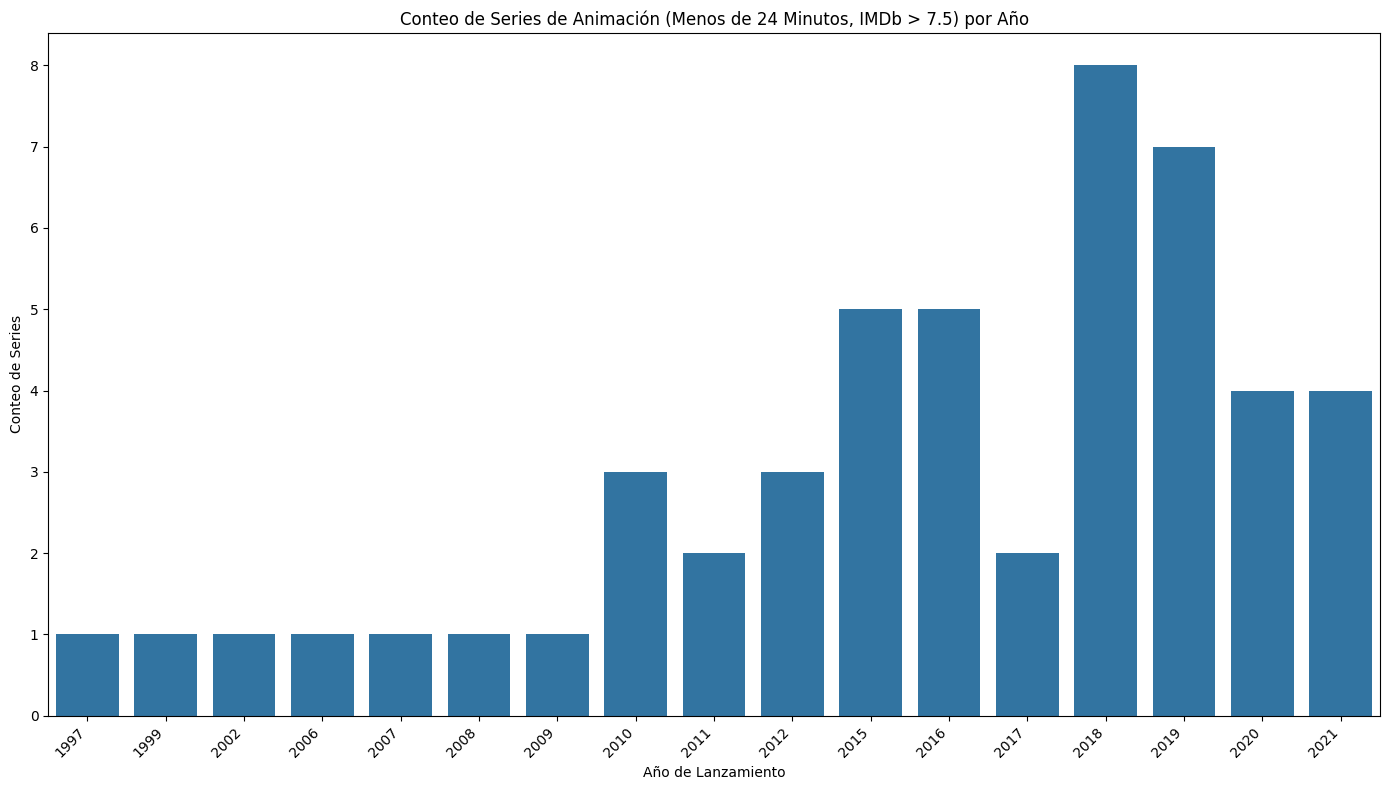

In [ ]:
df_show_animation_short = df_show_short[df_show_short['genre1'] == 'Animation']

plt.figure(figsize=(14, 8))
sns.countplot(data=df_show_animation_short, x='release_year')
plt.title("Conteo de Series de Animación (Menos de 24 Minutos, IMDb > 7.5) por Año")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Conteo de Series")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


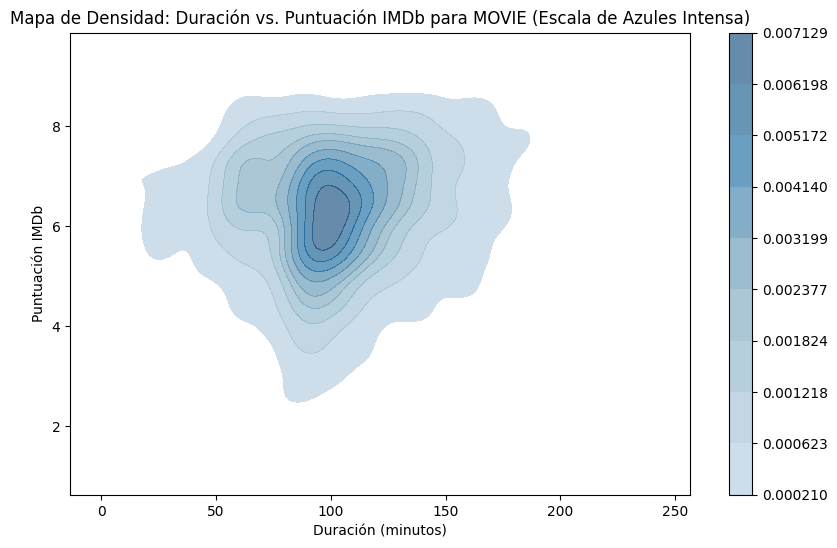

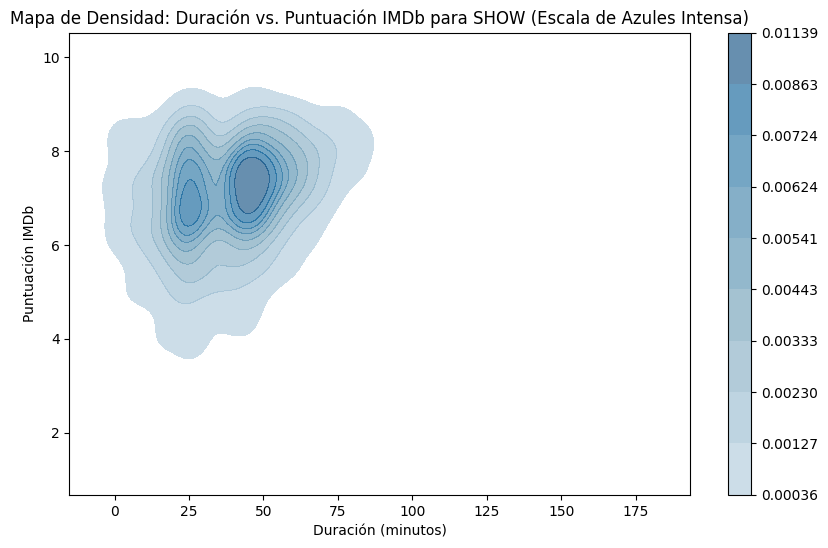

In [ ]:
from matplotlib.colors import LinearSegmentedColormap



df_movie = df[df['type'] == 'MOVIE']
df_show = df[df['type'] == 'SHOW']

blues_strong = LinearSegmentedColormap.from_list("Blues_Strong", ["#b3cde0", "#6497b1", "#005b96", "#03396c"])

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_movie, x='runtime', y='imdb_score', fill=True, cmap=blues_strong, alpha=0.6, cbar=True)
plt.title("Mapa de Densidad: Duración vs. Puntuación IMDb para MOVIE (Escala de Azules Intensa)")
plt.xlabel("Duración (minutos)")
plt.ylabel("Puntuación IMDb")
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_show, x='runtime', y='imdb_score', fill=True, cmap=blues_strong, alpha=0.6, cbar=True)
plt.title("Mapa de Densidad: Duración vs. Puntuación IMDb para SHOW (Escala de Azules Intensa)")
plt.xlabel("Duración (minutos)")
plt.ylabel("Puntuación IMDb")
plt.show()





En resumen con estos mapas de densidad no solo vemos como las películas y series se agrupan en estos núcleos de duración. Por un lado en películas vemos claramente la parte de la curva de la derecha en la que van quedando vacías las puntuaciones bajas a medida que aumenta el tiempo. En el de series tenemos el doble cluster de longitudes y vambién vemos claramentne en que parte se acumulan las notas más bajas. 

En el tema del age_certification hay una serie de nulls. Hemos visto solo algún detalle pero vamos a profundizar sobre el tema.  Vamos a ver cuántos hay y hacer una visualización de los datos para ver si podemos dar algún insight sobre ello. Haremos un heatmap normal y otro en el que los 0 no se vean para poder que valores realmente tienen datos de los que disponemos: 

In [ ]:

genre_age_cert_sum = age_cert_distribution.drop(columns=['Nulos']).sum(axis=0).to_frame().T
genre_age_cert_sum.index = ["Total por Clasificación"]

age_cert_distribution_sums = pd.concat([age_cert_distribution.drop(columns=['Nulos']), genre_age_cert_sum])

In [ ]:
nulls_by_genre = age_cert_distribution[['Nulos']].copy()
nulls_by_genre.columns = ['Cantidad de Nulos'] 


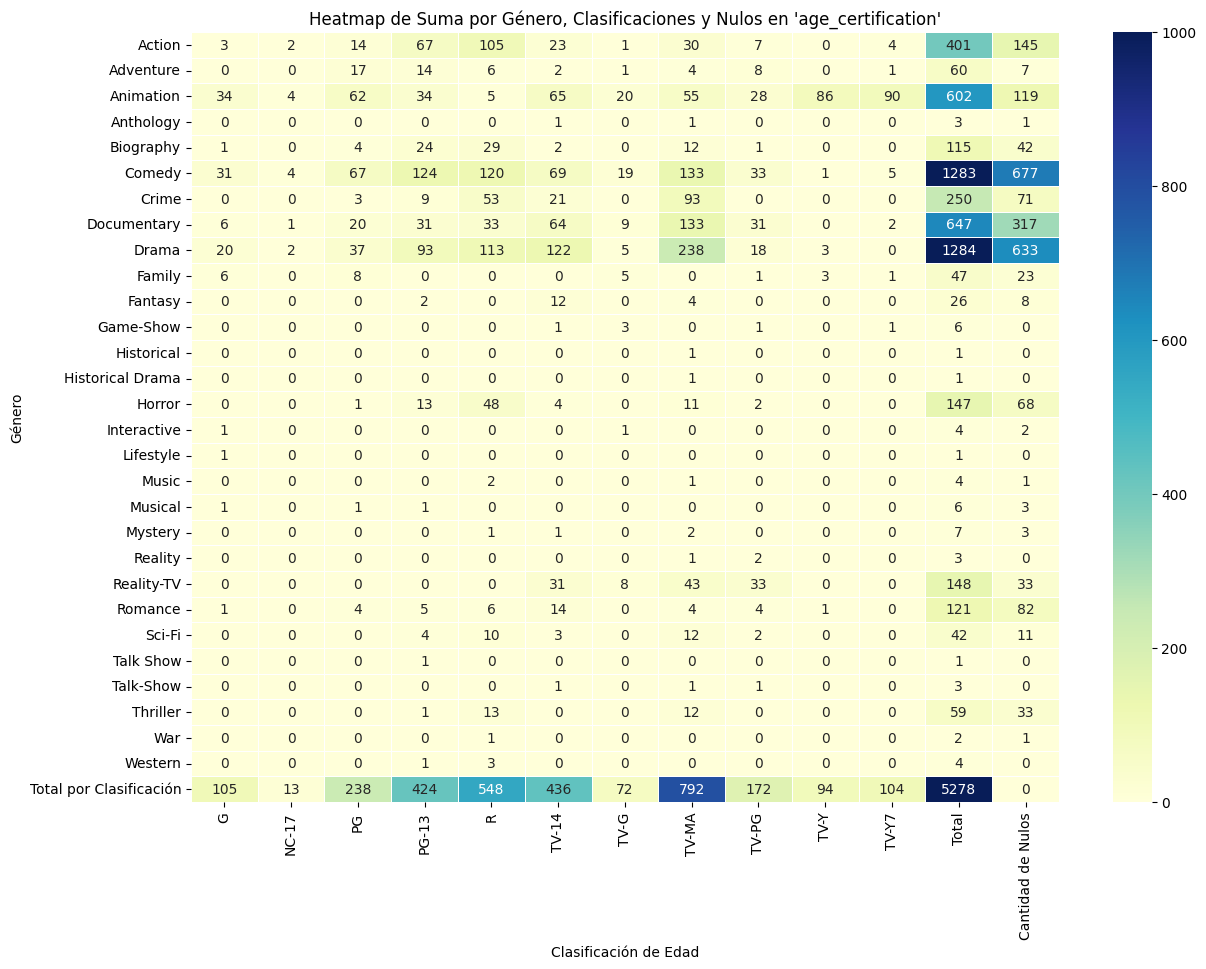

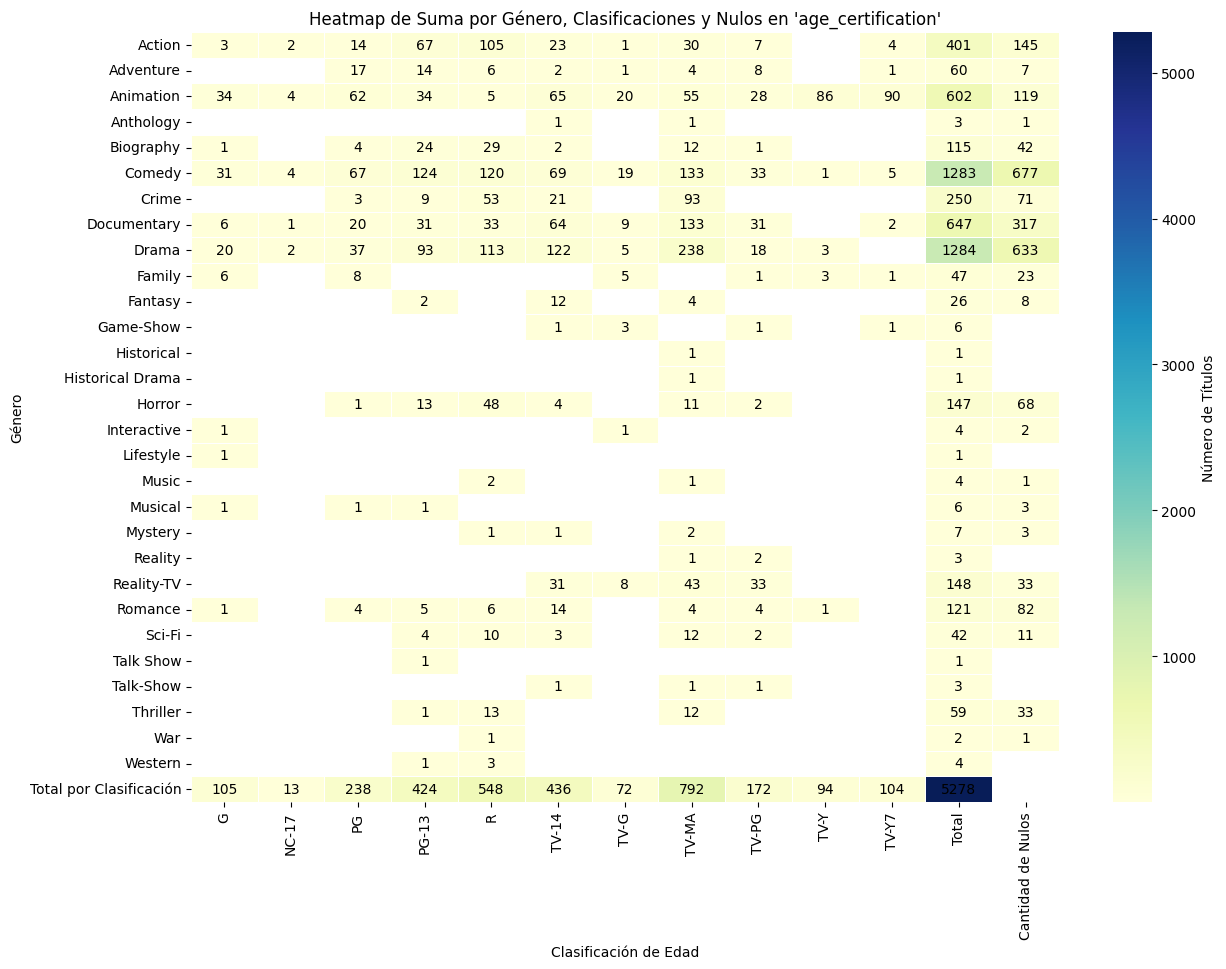

In [ ]:

combined_df = pd.concat([age_cert_distribution_sums, nulls_by_genre], axis=1)

combined_df = combined_df.fillna(0)

plt.figure(figsize=(14, 10))
sns.heatmap(combined_df, annot=True, fmt=".0f", cmap="YlGnBu", cbar=True, linewidths=0.5, norm=plt.Normalize(vmin=0, vmax=1000))
plt.title("Heatmap de Suma por Género, Clasificaciones y Nulos en 'age_certification'")
plt.xlabel("Clasificación de Edad")
plt.ylabel("Género")
plt.show()


plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(combined_df, annot=True, fmt=".0f", cmap="YlGnBu", cbar=True, linewidths=0.5,
                      mask=combined_df == 0, cbar_kws={'label': 'Número de Títulos'}, annot_kws={"color": "black"})

for text in heatmap.texts:
    if text.get_text() == '0':
        text.set_color("black")  

plt.title("Heatmap de Suma por Género, Clasificaciones y Nulos en 'age_certification'")
plt.xlabel("Clasificación de Edad")
plt.ylabel("Género")
plt.show()


Explicación de las clasificaciones de edad: 

G: "General Audience" – Apta para todo público, sin contenido inapropiado para ninguna edad.

PG: "Parental Guidance" – Se recomienda supervisión de un adulto. Contiene material que podría no ser adecuado para niños pequeños.

PG-13: "Parents Strongly Cautioned" – Algunos materiales podrían no ser apropiados para menores de 13 años. Se recomienda supervisión.

R: "Restricted" – Restringido para menores de 17 años sin acompañante adulto debido a contenido explícito.

NC-17: "Adults Only" – Solo para adultos (mayores de 17 o 18 años), debido a contenido explícito o violento.

TV-Y: "All Children" – Apta para todos los niños, contenido diseñado para un público infantil muy joven.

TV-Y7: "Older Children" – Apta para niños mayores de 7 años; puede incluir contenido leve que no sería adecuado para niños menores.

TV-G: "General Audience" – Similar a la clasificación G, es apropiada para todo público.

TV-PG: "Parental Guidance Suggested" – Se sugiere la supervisión de un adulto, debido a contenido leve.

TV-14: "Parents Strongly Cautioned" – No se recomienda para menores de 14 años sin supervisión de adultos, debido a material que podría no ser adecuado.

TV-MA: "Mature Audience" – Solo para adultos, debido a material explícito o violento que no es adecuado para menores.

------------------------------------------------------------------------------------------

Insights del Heatmap:

Concentración de Contenido Infantil: 

Vemos que los géneros de Animación y Comedia tienen una alta concentración de títulos con clasificaciones como G, TV-Y, y TV-G. Esto indica que estas categorías suelen ser accesibles y diseñadas para un público infantil o familiar.También vemos como estos géneros tienen valores para todos los rangos de edad mientras que otros tienen nulos en casi todas las franjas. 

Contenido Adolescente en Géneros Populares:

 Las clasificaciones TV-14 y PG-13 están distribuidas principalmente en géneros como Acción, Aventura, y Fantasía. Esto sugiere que estos géneros captan el interés de una audiencia adolescente y joven, con contenido moderadamente restrictivo.

Contenido para Audiencias Adultas: 

Los géneros como Drama, Documental, y Crimen tienen altas concentraciones en las clasificaciones R, NC-17, y TV-MA. En estos géneros contenido sexual, de violencia, drogas, etc puede ser mucho más frecuente. 

Valores Nulos por Género:

 Un número considerable de títulos en categorías como Biografía, Historia, y Deporte carecen de clasificación de edad.  Esto podría sugerir que estos géneros, especialmente en formatos documentales, no siempre tienen una evaluación de contenido, posiblemente debido a que las plataformas no consideran una restricción particular. También es posible que se trate de una inconsistencia en los datos de Kaggle. 

Conclusión
Este heatmap revela cómo las clasificaciones de edad se distribuyen de manera consistente con las audiencias objetivo de cada género. Además, destaca algunos vacíos en la clasificación para ciertos géneros, lo que podría indicar áreas donde la plataforma podría mejorar la evaluación de contenido para ayudar a los usuarios a elegir títulos apropiados. El segundo heatmap tiene como objetivo ver los "huecos" en los datos y parece bastante claro que como hemos apuntado las dos causas son los géneros y seguramente la inconsistencia en los datos del dataset original. 

Usando la técnica del heatmap vamos a analizar los géneros y países en relación a las puntuaciones en IMDB para ver si encontramos correlaciones interesantes: 





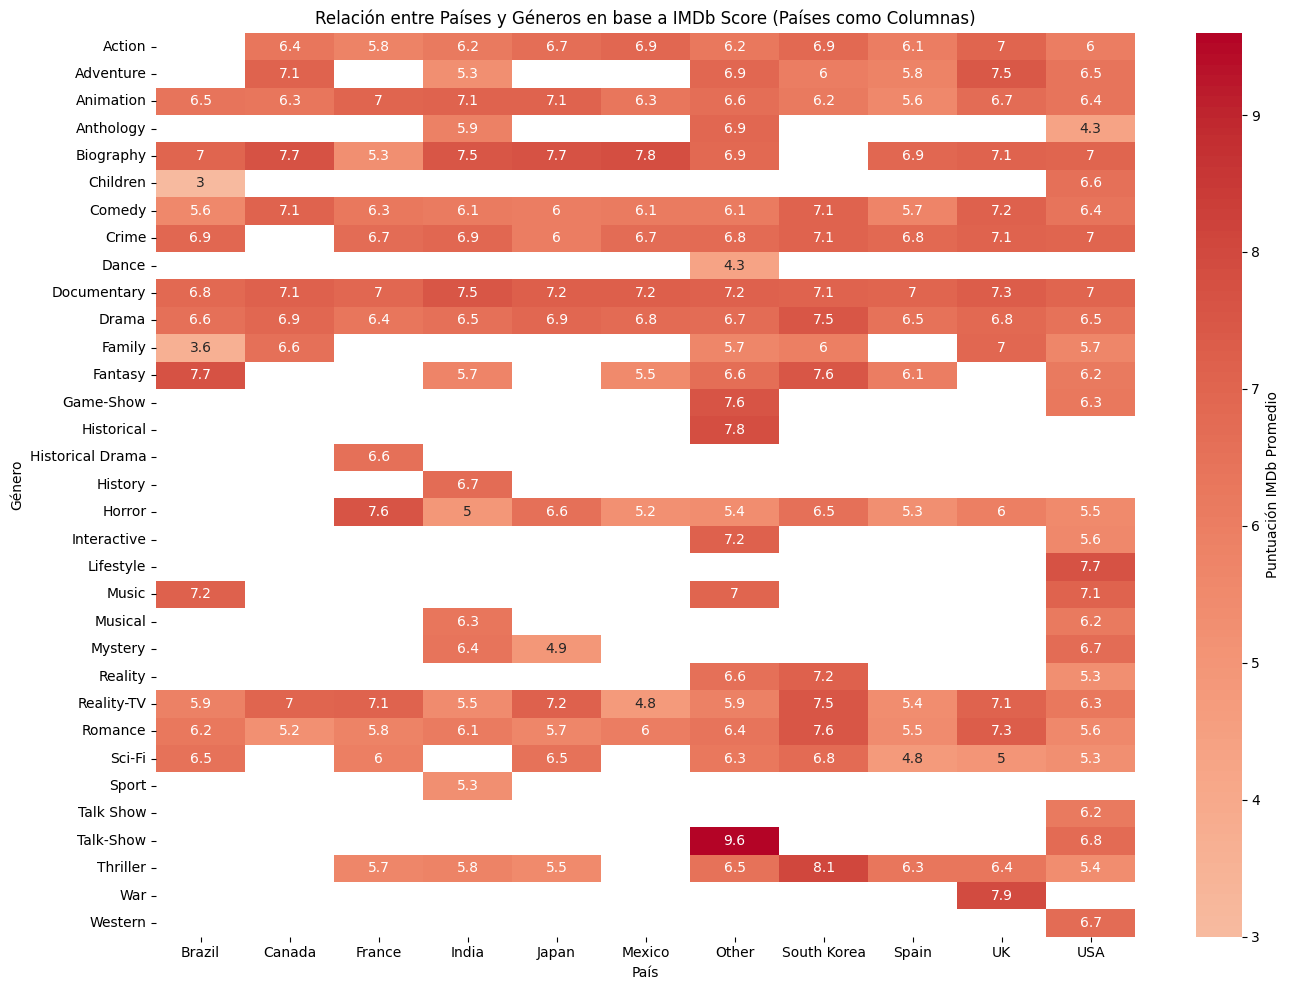

In [ ]:
df_genre_dummies = pd.get_dummies(df['genre1'], prefix='Genre')

df_genre_dummies['imdb_score'] = df['imdb_score']
df_genre_dummies['Country_Grouped'] = df['Country_Grouped']

correlation_genre_country_imdb = df_genre_dummies.groupby('Country_Grouped').mean().drop(columns=['imdb_score']).T.corrwith(df_genre_dummies.groupby('Country_Grouped')['imdb_score'].mean())

correlation_df_genre_country = pd.DataFrame(correlation_genre_country_imdb, columns=['IMDb Score Correlation']).sort_values(by='IMDb Score Correlation', ascending=False)
 
country_genre_imdb_pivot = df.pivot_table(values='imdb_score', index='Country_Grouped', columns='genre1', aggfunc='mean')


plt.figure(figsize=(14, 10))
sns.heatmap(country_genre_imdb_pivot.T, annot=True, cmap="coolwarm", center=0, cbar_kws={'label': 'Puntuación IMDb Promedio'})
plt.title("Relación entre Países y Géneros en base a IMDb Score (Países como Columnas)")
plt.xlabel("País")
plt.ylabel("Género")
plt.tight_layout()
plt.show()



Viendo este mapa podemos identificar tipos de contenidos que han tenido altas o bajas valoraciones lo que puede servir para identificar tipos de productos que están funcionando bien a nivel de crítica en la plataforma. Hay algunos datos que llaman la atención : 

- El 9.6 de Talk-Show en Other (la suma de países fuera del top 10 por volumen de contenido).

- Por encima de 8 sólo encontramos el Thriller surcoreano. Los títulos de este país generan consenso crític en la audiencia pues las valoraciones suelen tener medias más altas que otros países por géneros. 

- El 7.9 de UK en War, el único país que parece disponer de algún título del género. 

- Las mejores valoraciones en Música y Fantasía de Brazil. Al mismo tiempo las peores en Family y Children. 

- Documentary y Biography en India son los géneros más valorados de media con 7.5, podemos ver que títulos son. 

- México es el país con menos variedad de géneros pero tiene la mejor valoración para Biography con 7.8 de media. 

- En el conjunto del dataframe los títulos o el título con género Dance tienen valoración media de 4,3 por debajo del 5. 





In [ ]:
df_talk_show_other_countries = df[(df['genre1'] == 'Talk-Show') & (~df['Country'].isin(top_10_countries))]

df_talk_show_other_countries

index     title  type  \
2787   2787  #ABtalks  SHOW   

                                            description  release_year  \
2787  #ABtalks is a YouTube interview show hosted by...          2018   

     age_certification  runtime  imdb_score  imdb_votes     genre1 genre2  \
2787             TV-PG       68         9.6         7.0  Talk-Show    NaN   

           Country Continent Language Country_Grouped    Country_Genre  
2787  Saudi Arabia      Asia   Arabic           Other  Other_Talk-Show

https://www.abtalks.ae/ Esta combinación es la mejor valorada del dataset pero solo con 7 votos. Es una serie de entrevistas con personalidades relevantes de Emiratos Árabes. Es un contenido dirigido a un público adulto pero podría ser visto por cualquier edad. Al sólo tener 7 votos y un único titulo no es muy significativo el tener esta media de 9.6 de puntuación.

In [ ]:
thriller_korea = df[(df['genre1'] == 'Thriller') & (df['Country'] == 'South Korea')]
thriller_korea

index        title  type  \
4445   4445   Squid Game  SHOW   
4751   4751  Beyond Evil  SHOW   

                                            description  release_year  \
4445  Hundreds of cash-strapped players accept a str...          2021   
4751  A serial murder case takes place in the small,...          2021   

     age_certification  runtime  imdb_score  imdb_votes    genre1  genre2  \
4445             TV-MA       54         8.0    416738.0  Thriller   Drama   
4751             TV-MA       66         8.1      2776.0  Thriller   Drama   

          Country Continent Language Country_Grouped         Country_Genre  
4445  South Korea      Asia   Korean     South Korea  South Korea_Thriller  
4751  South Korea      Asia   Korean     South Korea  South Korea_Thriller

Los thrillers coreanos con alta valoracion son Squid Game y Beyond Evil. Son dos títulos pero podemos considerar especialmente interesante Squid Game como fenómeno de 2021 por la cantidad de votos recibidos. Ha sido un éxito de crítica y público que ha dado una gran visibilización a los productos coreanos de Netflix en general.  En la casilla siguiente vemos como la media de votos desde la salida de Squid Game ha casi duplicado la media de votos. 

In [ ]:
df_south_korea = df[df['Country'] == 'South Korea']

mean_votes_pre_2021 = df_south_korea[df_south_korea['release_year'] < 2021]['imdb_votes'].mean()
mean_votes_2021_2022 = df_south_korea[df_south_korea['release_year'].isin([2021, 2022])]['imdb_votes'].mean()

south_korea_votes_summary = pd.DataFrame({
    "Periodo": ["Antes de 2021", "2021 y 2022"],
    "Media de Votos IMDb": [mean_votes_pre_2021, mean_votes_2021_2022]
})

south_korea_votes_summary

Periodo  Media de Votos IMDb
0  Antes de 2021          5422.433824
1    2021 y 2022         13046.959184

In [ ]:
war_uk = df[(df['genre1'] == 'War') & (df['Country'] == 'UK')]
war_uk

index                 title   type  \
10     10  The Guns of Navarone  MOVIE   
48     48     Full Metal Jacket  MOVIE   

                                          description  release_year  \
10  A team of allied saboteurs are assigned an imp...          1961   
48  A pragmatic U.S. Marine observes the dehumaniz...          1987   

   age_certification  runtime  imdb_score  imdb_votes genre1   genre2 Country  \
10               NaN      158         7.5     50150.0    War   Action      UK   
48                 R      116         8.3    723306.0    War    Drama      UK   

   Continent Language Country_Grouped Country_Genre  
10    Europe  English              UK        UK_War  
48    Europe  English              UK        UK_War

La nota media de 7.9 de dos títulos es alzada por Full Metal Jacket, un clásico del cine bélico que cuenta además con una alta cantidad de valoraciones. El insight de esto es que Netflix puede beneficiarse de la incorporación de clásicos en su plataforma dirigidos a un público adulto o de más edad que puede estar interesado en productos críticamente aclamados de antes de la existencia de la plataforma. Sería interesante ver las visitas que ha tenido en Netflix y la valoración interna de sus usuarios. 

In [ ]:
brazil_fantasia = df[(df['genre1'] == 'Fantasy') & (df['Country'] == 'Brazil')]

brazil_fantasia


index           title  type  \
4914   4914  Invisible City  SHOW   

                                            description  release_year  \
4914  An environmental police officer uncovers a hid...          2021   

     age_certification  runtime  imdb_score  imdb_votes   genre1    genre2  \
4914             TV-MA       36         7.7        18.0  Fantasy   Mystery   

     Country      Continent Language Country_Grouped   Country_Genre  
4914  Brazil  South America  Spanish          Brazil  Brazil_Fantasy

https://en.wikipedia.org/wiki/Invisible_City_(TV_series) Producción de Neflix, el lenguaje debería ser Portuguese. 18 votos, no son datos que hagan pensar que haya generado interés en IMDb. Serie de 2021 , dos temporadas, finalmente fue cancelada.

In [ ]:
df.loc[df['title'] == "Invisible City", 'Language'] = 'Portuguese'

In [ ]:
brazil_children = df[(df['genre1'] == 'Children') & (df['Country'] == 'Brazil')]
brazil_children

index                                     title   type  \
4225   4225  Luccas Neto em: Uma Babá Muito Esquisita  MOVIE   

                                            description  release_year  \
4225  Luccas and Gi forgot about Mother's Day and no...          2019   

     age_certification  runtime  imdb_score  imdb_votes    genre1 genre2  \
4225               NaN       75         3.0        36.0  Children    NaN   

     Country      Continent    Language Country_Grouped    Country_Genre  
4225  Brazil  South America  Portuguese          Brazil  Brazil_Children

https://www.instagram.com/luccastoon Luccas Neto es un influencer de contenido infantil en Brasil. La película de 2019 es una comedia infantil en el estilo de la comedia estadounidense "Esta Abuela es un Peligro". Posiblemente IMDb no se la plataforma donde se encuentre el público de Neto y por ello estas valoraciones , además solo 36 podrían ser poco significativas del sentimiento general del público sobre este producto. 

In [ ]:
brazil_family = df[(df['genre1'] == 'Family') & (df['Country'] == 'Brazil')]
brazil_family

index                           title   type  \
4363   4363  Luccas Neto in: Children's Day  MOVIE   
4404   4404     Luccas Neto in: Summer Camp  MOVIE   
5139   5139                      Double Dad  MOVIE   

                                            description  release_year  \
4363  Luccas Neto is planning a big Children's Day c...          2019   
4404  Luccas and Gi are heading to a world famous gy...          2019   
5139  While her mom is away, a teen sneaks out of th...          2021   

     age_certification  runtime  imdb_score  imdb_votes  genre1   genre2  \
4363               NaN       81         2.5        12.0  Family      NaN   
4404                 G       87         2.8        52.0  Family      NaN   
5139               NaN      103         5.6      1262.0  Family   Comedy   

     Country      Continent    Language Country_Grouped  Country_Genre  
4363  Brazil  South America  Portuguese          Brazil  Brazil_Family  
4404  Brazil  South America  Portuguese          Brazil  Brazil_Family  
5139  Brazil  South America     Spanish          Brazil  Brazil_Family

https://pt.wikipedia.org/wiki/Pai_em_Dobro Double Dad es una película brasileña producida por Neflix en Portugués (debe corregirse esta información en el df) que tiene una cantidad significativa de votos y parece que ha tenido una valoración de 5.6 , aprobada, por la audencia con 1262 votos. Los otros dos titulos vuelven a ser de Luccas Neto, lo que nos hace pensar que puede haber una comunidad "hater" hacia el personaje de Neto en IMDb más que tratarse de un fenómeno crítico general. 

In [ ]:
df.loc[df['title'] == "Double Dad", 'Language'] = 'Portuguese'

In [ ]:
india_75 = df[(df['genre1'].isin(['Documentary', 'Biography'])) & (df['Country'] == 'India')]
india_75.describe()


index  release_year     runtime  imdb_score    imdb_votes
count    29.000000     29.000000   29.000000   29.000000     29.000000
mean   2419.172414   2015.448276  103.689655    7.520690   8683.827586
std    1509.492466      5.137997   49.736523    1.054033  13053.049436
min     428.000000   2002.000000   28.000000    3.900000     25.000000
25%    1033.000000   2014.000000   60.000000    7.200000    584.000000
50%    2503.000000   2017.000000  112.000000    7.600000   2464.000000
75%    3854.000000   2019.000000  141.000000    8.300000   9522.000000
max    5109.000000   2021.000000  213.000000    9.000000  52227.000000

Hay 29 títulos de Biography y Documentary en India del df. Vemos que hay desde formato serie de 28 minutos hasta un largo que llega a las 3 horas y media. No todos están tan bien valorados pero la media sería de 7.6 y el 25% de 7.2 lo que indica que las valoraiones bajas son minoría. Con estas cifras podemos pensar que los títulos de estos géneros en India generan interés por lo que suelen ser una buena incorporación al catálogo. 

In [ ]:
mexico_bio = df[(df['genre1'] == 'Biography') & (df['Country'] == 'Mexico')]
mexico_bio

index                    title  type  \
2111   2111                 El Chapo  SHOW   
2188   2188  Luis Miguel: The Series  SHOW   
2571   2571       Mariposa de barrio  SHOW   

                                            description  release_year  \
2111  A look at the life of notorious drug kingpin, ...          2017   
2188  The series dramatizes the life story of Mexica...          2018   
2571  This drama reveals the difficult rise to fame ...          2017   

     age_certification  runtime  imdb_score  imdb_votes     genre1  genre2  \
2111             TV-MA       44         7.8     17992.0  Biography   Crime   
2188             TV-14       56         8.0      4556.0  Biography   Drama   
2571             TV-MA       46         7.6       238.0  Biography   Drama   

     Country      Continent Language Country_Grouped     Country_Genre  
2111  Mexico  North America  Spanish          Mexico  Mexico_Biography  
2188  Mexico  North America  Spanish          Mexico  Mexico_Biography  
2571  Mexico  North America  Spanish          Mexico  Mexico_Biography

https://es.wikipedia.org/wiki/Mariposa_de_barrio Las 3 series biográficas speran la media del 7.5 en votos y se basan en personajes mexicanos famosos. El Chapo y Luis Miguel son personajes que pueden tener un interés que sobrepase el mercado nacional y por ello tener una cantidad de votos elevada manteniendo una media alta. El insight aquí es que las biografías de personajes que pueden generar este interés a un nivel más internacioanl pueden ser títulos atractivos. Jenni Rivera por su lado es un personaje con menos trascendencia fuera del país y de ahí sus pocos votos en comparación. 

In [ ]:
dance_df = df[(df['genre1'] == 'Dance')]
dance_df

index              title   type  \
4954   4954  Battle: Freestyle  MOVIE   

                                            description  release_year  \
4954  Amalie and Mikael lead their street dance team...          2022   

     age_certification  runtime  imdb_score  imdb_votes genre1  genre2  \
4954               NaN       88         4.3       313.0  Dance   Drama   

          Country Continent Language Country_Grouped Country_Genre  
4954  Netherlands    Europe  Spanish           Other   Other_Dance

https://www.filmaffinity.com/es/film376689.html Podemos ver que se trata de un caso aíslado, de una producción de Netflix para Noruega. Las valoraciones en otras plataformas parecen indicar que el título no tuvo una gran acogida. 

In [ ]:
df.loc[df['title'] == "Battle: Freestyle", 'Country'] = 'Norway'

Para finalizar vamos a experimentar con una serie de tests estadísticos para ver si refuerzan las tesis del análisis previo: 

In [ ]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


df['genre1'] = df['genre1'].astype('category')
df['Country_Grouped'] = df['Country_Grouped'].astype('category')
df['type'] = df['type'].astype('category')

# 1. ANOVA para comparar puntuaciones IMDb entre géneros
anova_genre_model = ols('imdb_score ~ genre1', data=df).fit()
anova_genre_results = sm.stats.anova_lm(anova_genre_model, typ=2)

# 2. ANOVA para comparar puntuaciones IMDb entre países agrupados
anova_country_model = ols('imdb_score ~ Country_Grouped', data=df).fit()
anova_country_results = sm.stats.anova_lm(anova_country_model, typ=2)

# 3. ANOVA para el efecto del tipo de contenido sobre la puntuación IMDb
anova_type_model = ols('imdb_score ~ type', data=df).fit()
anova_type_results = sm.stats.anova_lm(anova_type_model, typ=2)

# 4. Chi-cuadrado de independencia entre país agrupado y género
country_genre_contingency = pd.crosstab(df['Country_Grouped'], df['genre1'])
chi2_country_genre, p_country_genre, _, _ = stats.chi2_contingency(country_genre_contingency)

# 5. Chi-cuadrado de independencia entre clasificación por edad y tipo de contenido
# Filtrar filas donde `age_certification` no sea nulo para el análisis
df_age_type = df.dropna(subset=['age_certification'])
age_type_contingency = pd.crosstab(df_age_type['age_certification'], df_age_type['type'])
chi2_age_type, p_age_type, _, _ = stats.chi2_contingency(age_type_contingency)

# Calcular la prueba Kolmogorov-Smirnov en lugar de Shapiro-Wilk para grandes muestras
normality_test = stats.kstest(df['imdb_score'].dropna(), 'norm')

# Actualizar los valores en el diccionario de resultados usando .iloc para evitar FutureWarning
test_results = {
    "ANOVA IMDb por Género (p-valor)": anova_genre_results['PR(>F)'].iloc[0],
    "ANOVA IMDb por País (p-valor)": anova_country_results['PR(>F)'].iloc[0],
    "ANOVA IMDb por Tipo de Contenido (p-valor)": anova_type_results['PR(>F)'].iloc[0],
    "Chi-cuadrado País-Género (p-valor)": p_country_genre,
    "Chi-cuadrado Edad-Tipo (p-valor)": p_age_type,
    "Normalidad IMDb Score (p-valor)": normality_test.pvalue,
    "Homocedasticidad IMDb entre Géneros (p-valor)": homogeneity_test.pvalue,
    "Correlación Duración vs. IMDb Score (p-valor)": correlation_test[1]
}


test_results


{'ANOVA IMDb por Género (p-valor)': 5.690826349765694e-89,
 'ANOVA IMDb por País (p-valor)': 6.316445723177895e-33,
 'ANOVA IMDb por Tipo de Contenido (p-valor)': 1.5744809869298932e-117,
 'Chi-cuadrado País-Género (p-valor)': 3.103167419043226e-215,
 'Chi-cuadrado Edad-Tipo (p-valor)': 0.0,
 'Normalidad IMDb Score (p-valor)': 0.0,
 'Homocedasticidad IMDb entre Géneros (p-valor)': 5.20300242242965e-13,
 'Correlación Duración vs. IMDb Score (p-valor)': 7.131428266031567e-31}

1. ANOVA IMDb por Género (p-valor = 5.69e-89)

Interpretación: El p-valor tan bajo sugiere que existen diferencias significativas en las puntuaciones IMDb entre distintos géneros. Esto indica que la variabilidad en IMDb podría estar parcialmente explicada por el género de la producción.


2. ANOVA IMDb por País (p-valor = 6.31e-33)

Interpretación: Este p-valor también es muy bajo, lo que sugiere diferencias significativas en las puntuaciones IMDb entre producciones de diferentes países. Esto puede reflejar diferencias en las calificaciones promedio por país, posiblemente debido a las variaciones culturales o de producción en cada región. Los insights presentados por las graficaciones anteriores son apoyados por los tests. 


3. ANOVA IMDb por Tipo de Contenido (p-valor = 1.57e-117)

Interpretación: Este resultado indica una diferencia estadísticamente significativa en las puntuaciones IMDb entre películas y series. La diferencia es lo suficientemente fuerte como para suponer que el tipo de contenido puede influir notablemente en la calificación promedio de IMDb.


4. Chi-cuadrado País-Género (p-valor = 3.10e-215)

Interpretación: El p-valor extremadamente bajo sugiere una relación significativa entre el país de origen y el género del contenido. Esto implica que ciertos países tienden a producir más contenido de géneros específicos, reflejando posiblemente una preferencia o especialización en determinados géneros según la región.


5. Chi-cuadrado Edad-Tipo (p-valor = 0.0)

Interpretación: Un p-valor de 0 indica una relación significativa entre la clasificación por edad y el tipo de contenido (película o serie). Esto podría reflejar diferencias en la orientación de contenido según la clasificación de edad, por ejemplo, las series pueden estar más orientadas a públicos jóvenes o adultos. En análisis anteriores igualmente hemos observado las distribuciones de la clasificación por edad entre géneros así como los nulos en el dataset. 


6. Normalidad IMDb Score (p-valor = 0.0)

Interpretación: Un p-valor de 0 en la prueba Kolmogorov-Smirnov indica que las puntuaciones de IMDb no siguen una distribución normal. Esto podría sugerir la presencia de sesgo en las puntuaciones o una distribución multimodal como hemos comprobado con anterioridad. 


7. Homocedasticidad IMDb entre Géneros (p-valor = 5.20e-13)

Interpretación: Este p-valor bajo en la prueba de Levene sugiere que la varianza de las puntuaciones IMDb entre géneros no es homogénea. En otras palabras, algunos géneros pueden tener una mayor dispersión en sus calificaciones de IMDb que otros.


8. Correlación Duración vs. IMDb Score (p-valor = 7.13e-31)

Interpretación: El p-valor indica una correlación significativa entre la duración (runtime) y la puntuación IMDb. Aunque la prueba indica significancia, el valor de correlación debe analizarse para ver si la relación es positiva, negativa, o muy débil (es decir, significativa pero poco relevante). Hemos hecho a lo largo del análisis una serie de consideraciones sobre la relación entre runtime y la puntuación en IMDb.


Conclusión general: 

Estos resultados sugieren que tanto los géneros, países, tipos de contenido y clasificaciones por edad tienen relaciones estadísticamente significativas con las puntuaciones IMDb, mostrando que son factores potencialmente influyentes en la percepción y evaluación del contenido en la plataforma. La falta de normalidad en las puntuaciones y las diferencias de varianza entre géneros sugieren también que podrían estar presentes subgrupos con características únicas dentro del contenido. En esencia lo que hemos observado durante los análisis más pormenorizados se confirma con estos tests estadísticos. 

RMSE del modelo XGBoost: 1.1753
RMSE del modelo CatBoost: 1.1927
RMSE del modelo meta (CatBoost): 0.8957


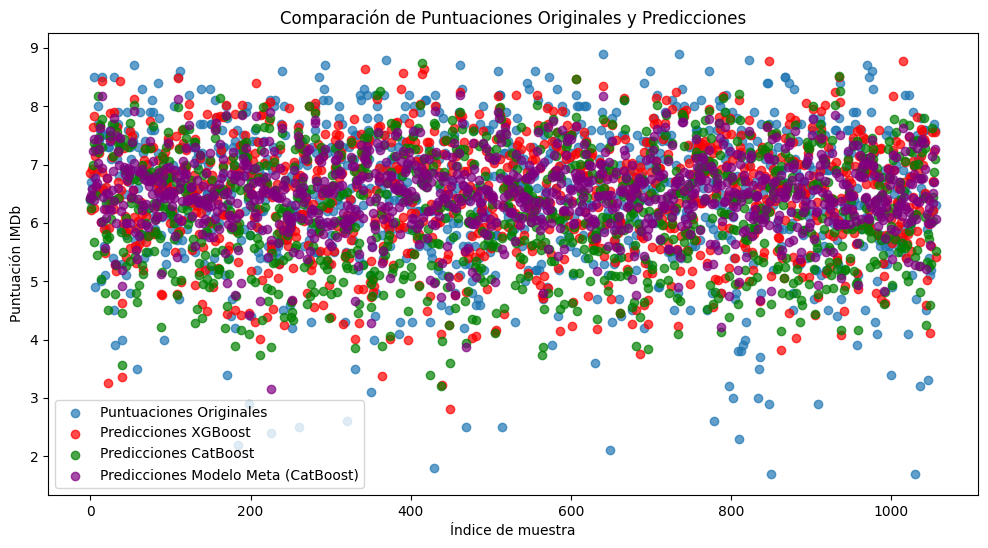

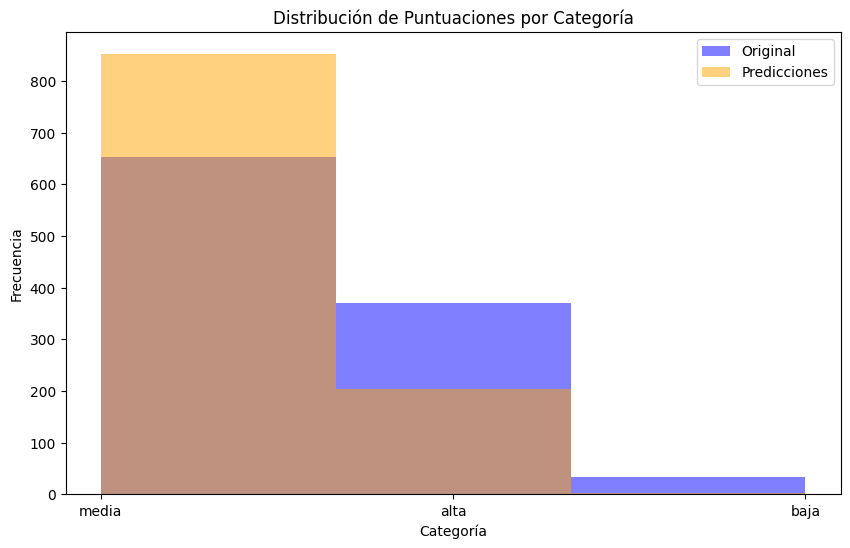

In [3]:
# Importar bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import numpy as np
import matplotlib.pyplot as plt


# Filtrar columnas relevantes y eliminar nulos
df_filtrado = df[['imdb_score', 'Country', 'genre1', 'release_year', 'type', 'runtime']].dropna()

# Codificar variables categóricas
codificadores = {}
for columna in ['Country', 'genre1', 'type']:
    codificador = LabelEncoder()
    df_filtrado[columna] = codificador.fit_transform(df_filtrado[columna])
    codificadores[columna] = codificador

# Definir variables independientes y dependientes
X = df_filtrado[['Country', 'genre1', 'release_year', 'type', 'runtime']]
y = df_filtrado['imdb_score']

# Dividir en entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear categorías de puntuaciones para rebalanceo
def asignar_categoria(puntuacion):
    if puntuacion < 4:
        return 'baja'
    elif puntuacion > 7:
        return 'alta'
    else:
        return 'media'

categorias = y_entrenamiento.apply(asignar_categoria)
pesos_categoria = 1 / categorias.value_counts(normalize=True)
pesos = categorias.map(pesos_categoria)

# Entrenar el modelo XGBoost con pesos ajustados
modelo_xgb = XGBRegressor(random_state=42, n_estimators=200, learning_rate=0.1, max_depth=6)
modelo_xgb.fit(X_entrenamiento, y_entrenamiento, sample_weight=pesos)

# Optimización de CatBoost
modelo_catboost = CatBoostRegressor(
    iterations=300, 
    learning_rate=0.05, 
    depth=8, 
    l2_leaf_reg=3, 
    random_seed=42, 
    verbose=0
)
modelo_catboost.fit(X_entrenamiento, y_entrenamiento, sample_weight=pesos)

# Predicciones de ambos modelos en el conjunto de prueba
y_pred_xgb = modelo_xgb.predict(X_prueba)
y_pred_catboost = modelo_catboost.predict(X_prueba)

# Crear un nuevo conjunto de datos para el modelo meta
X_meta = np.column_stack((y_pred_xgb, y_pred_catboost))

# Entrenar un modelo meta con CatBoost
modelo_meta = CatBoostRegressor(
    iterations=200, 
    learning_rate=0.1, 
    depth=6, 
    random_seed=42, 
    verbose=0
)
modelo_meta.fit(X_meta, y_prueba)

# Predicciones del modelo meta
y_pred_meta = modelo_meta.predict(X_meta)

# Evaluar los modelos
rmse_xgb = np.sqrt(mean_squared_error(y_prueba, y_pred_xgb))
rmse_catboost = np.sqrt(mean_squared_error(y_prueba, y_pred_catboost))
rmse_meta = np.sqrt(mean_squared_error(y_prueba, y_pred_meta))

# Imprimir resultados
print(f"RMSE del modelo XGBoost: {rmse_xgb:.4f}")
print(f"RMSE del modelo CatBoost: {rmse_catboost:.4f}")
print(f"RMSE del modelo meta (CatBoost): {rmse_meta:.4f}")

# Gráfica comparativa de los modelos
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_prueba)), y_prueba, label='Puntuaciones Originales', alpha=0.7)
plt.scatter(range(len(y_pred_xgb)), y_pred_xgb, label='Predicciones XGBoost', alpha=0.7, color='r')
plt.scatter(range(len(y_pred_catboost)), y_pred_catboost, label='Predicciones CatBoost', alpha=0.7, color='g')
plt.scatter(range(len(y_pred_meta)), y_pred_meta, label='Predicciones Modelo Meta (CatBoost)', alpha=0.7, color='purple')
plt.xlabel('Índice de muestra')
plt.ylabel('Puntuación IMDb')
plt.title('Comparación de Puntuaciones Originales y Predicciones')
plt.legend()
plt.show()

# Gráfico de distribución por categoría
categorias_prueba = y_prueba.apply(asignar_categoria)
categorias_predicciones = pd.Series(y_pred_meta).apply(asignar_categoria)

plt.figure(figsize=(10, 6))
plt.hist(categorias_prueba, bins=3, alpha=0.5, label='Original', color='blue')
plt.hist(categorias_predicciones, bins=3, alpha=0.5, label='Predicciones', color='orange')
plt.title('Distribución de Puntuaciones por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()



Fitting 10 folds for each of 162 candidates, totalling 1620 fits
Mejores parámetros de CatBoost: {'bagging_temperature': 0.1, 'depth': 10, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.05, 'random_seed': 42}
RMSE del CatBoost optimizado: 1.1565
RMSE del modelo meta optimizado: 0.9886
Errores residuales: Percentil 5: -1.7277, Mediana: 0.0774, Percentil 95: 1.4399
Errores extremos:
              Real  Predicción       Error
count  273.000000  273.000000  273.000000
mean     6.125641    6.314334   -0.188693
std      1.840077    0.566379    1.716187
min      1.700000    4.927491   -4.733964
25%      4.700000    5.939090   -1.487815
50%      6.300000    6.426208   -1.002731
75%      7.800000    6.722601    1.335799
max      8.900000    7.572677    2.415462


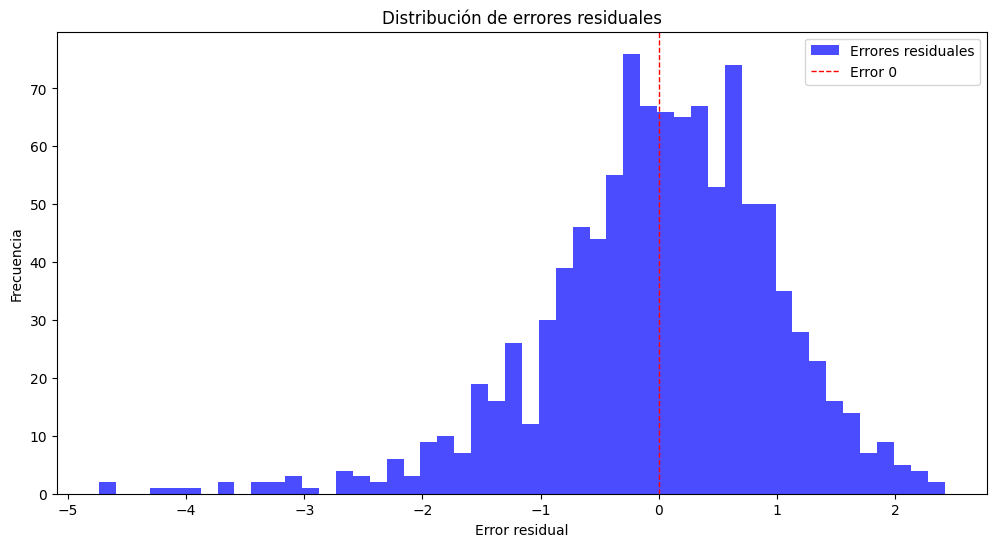

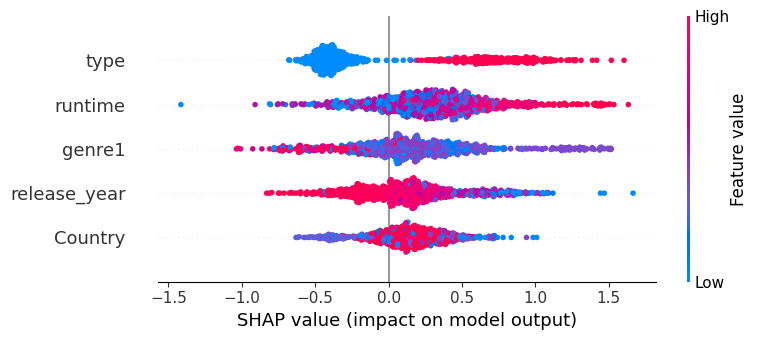

In [19]:
# Importar bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import numpy as np
import shap
import matplotlib.pyplot as plt


# Filtrar columnas relevantes y eliminar nulos
df_filtrado = df[['imdb_score', 'Country', 'genre1', 'release_year', 'type', 'runtime']].dropna()

# Codificar variables categóricas
codificadores = {}
for columna in ['Country', 'genre1', 'type']:
    codificador = LabelEncoder()
    df_filtrado[columna] = codificador.fit_transform(df_filtrado[columna])
    codificadores[columna] = codificador

# Definir variables independientes y dependientes
X = df_filtrado[['Country', 'genre1', 'release_year', 'type', 'runtime']]
y = df_filtrado['imdb_score']

# Dividir en entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear categorías de puntuaciones para rebalanceo
def asignar_categoria(puntuacion):
    if puntuacion < 4:
        return 'baja'
    elif puntuacion > 7:
        return 'alta'
    else:
        return 'media'

categorias = y_entrenamiento.apply(asignar_categoria)
pesos_categoria = 1 / categorias.value_counts(normalize=True)
pesos = categorias.map(pesos_categoria)

# Configuración de parámetros para GridSearchCV
parametros_catboost = {
    'iterations': [300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [6, 8, 10],
    'bagging_temperature': [0.1, 1.0, 5.0],
    'l2_leaf_reg': [1, 3, 5],
    'random_seed': [42]
}

# Configurar búsqueda de hiperparámetros con validación cruzada de 10 folds
modelo_catboost_grid = CatBoostRegressor(verbose=0)
grid_search_catboost = GridSearchCV(
    estimator=modelo_catboost_grid,
    param_grid=parametros_catboost,
    scoring='neg_mean_squared_error',
    cv=10,  # Validación cruzada de 10 folds
    verbose=1,
    n_jobs=-1
)

# Entrenar búsqueda de hiperparámetros
grid_search_catboost.fit(X_entrenamiento, y_entrenamiento, sample_weight=pesos)
mejor_catboost = grid_search_catboost.best_estimator_
mejor_params = grid_search_catboost.best_params_

print("Mejores parámetros de CatBoost:", mejor_params)

# Predicción con el mejor modelo
y_pred_catboost_optimizado = mejor_catboost.predict(X_prueba)

# Evaluar el modelo optimizado
rmse_catboost_optimizado = np.sqrt(mean_squared_error(y_prueba, y_pred_catboost_optimizado))
print(f"RMSE del CatBoost optimizado: {rmse_catboost_optimizado:.4f}")

# Reentrenar modelo meta con CatBoost optimizado
modelo_meta_optimizado = CatBoostRegressor(
    iterations=300,
    learning_rate=0.05,
    depth=8,
    random_seed=42,
    verbose=0
)
X_meta_optimizado = np.column_stack((y_pred_catboost_optimizado, y_pred_catboost_optimizado))
modelo_meta_optimizado.fit(X_meta_optimizado, y_prueba)

# Predicciones del modelo meta optimizado
y_pred_meta_optimizado = modelo_meta_optimizado.predict(X_meta_optimizado)

# Evaluar modelo meta optimizado
rmse_meta_optimizado = np.sqrt(mean_squared_error(y_prueba, y_pred_meta_optimizado))
print(f"RMSE del modelo meta optimizado: {rmse_meta_optimizado:.4f}")

# Análisis de errores residuales
errores = y_prueba - y_pred_meta_optimizado
percentiles = np.percentile(errores, [5, 50, 95])
print(f"Errores residuales: Percentil 5: {percentiles[0]:.4f}, Mediana: {percentiles[1]:.4f}, Percentil 95: {percentiles[2]:.4f}")

# Identificar patrones en los errores más grandes
df_errores = pd.DataFrame({'Real': y_prueba, 'Predicción': y_pred_meta_optimizado, 'Error': errores})
errores_extremos = df_errores[np.abs(df_errores['Error']) > 1]
print("Errores extremos:\n", errores_extremos.describe())

# Gráfico de errores residuales
plt.figure(figsize=(12, 6))
plt.hist(errores, bins=50, alpha=0.7, color='blue', label='Errores residuales')
plt.axvline(0, color='red', linestyle='dashed', linewidth=1, label='Error 0')
plt.xlabel('Error residual')
plt.ylabel('Frecuencia')
plt.title('Distribución de errores residuales')
plt.legend()
plt.show()

# Interpretación con SHAP
explainer = shap.TreeExplainer(mejor_catboost)
shap_values = explainer.shap_values(X_prueba)

# Gráfico de resumen de SHAP
shap.summary_plot(shap_values, X_prueba, feature_names=X.columns)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
RMSE del modelo combinado ajustado: 0.8939


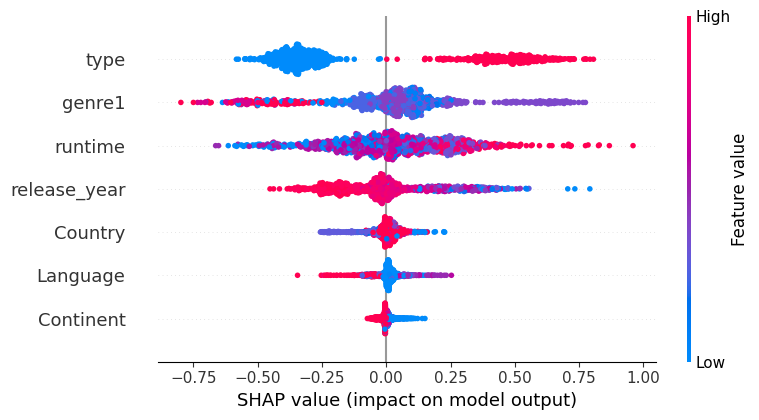

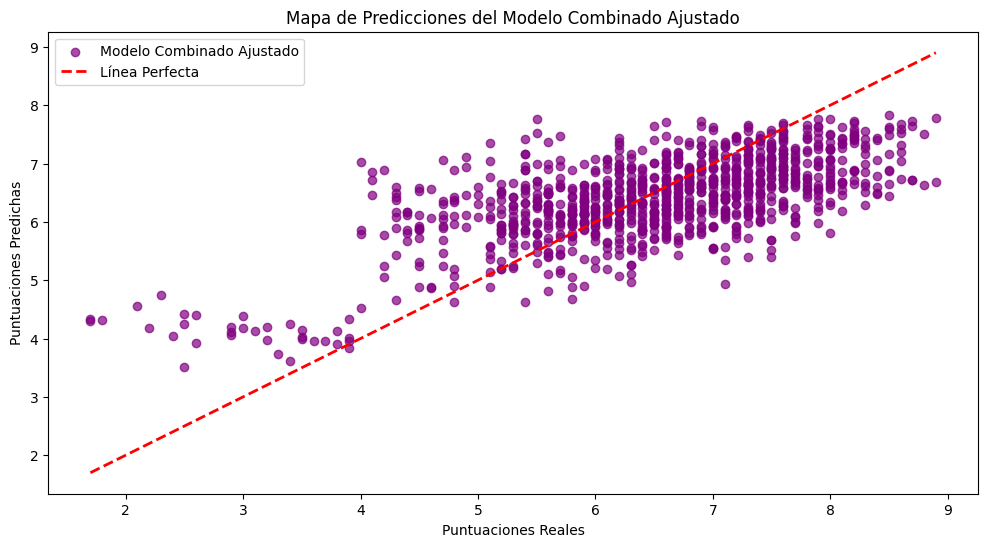

Análisis de errores en las zonas bajas:
             Real  Predicción      Error
count  34.000000   34.000000  34.000000
mean    3.005882    4.119344  -1.113462
std     0.670568    0.253876   0.818121
min     1.700000    3.514853  -2.627584
25%     2.500000    3.966915  -1.723565
50%     3.050000    4.133347  -1.022826
75%     3.500000    4.282397  -0.435992
max     3.900000    4.754378   0.059134


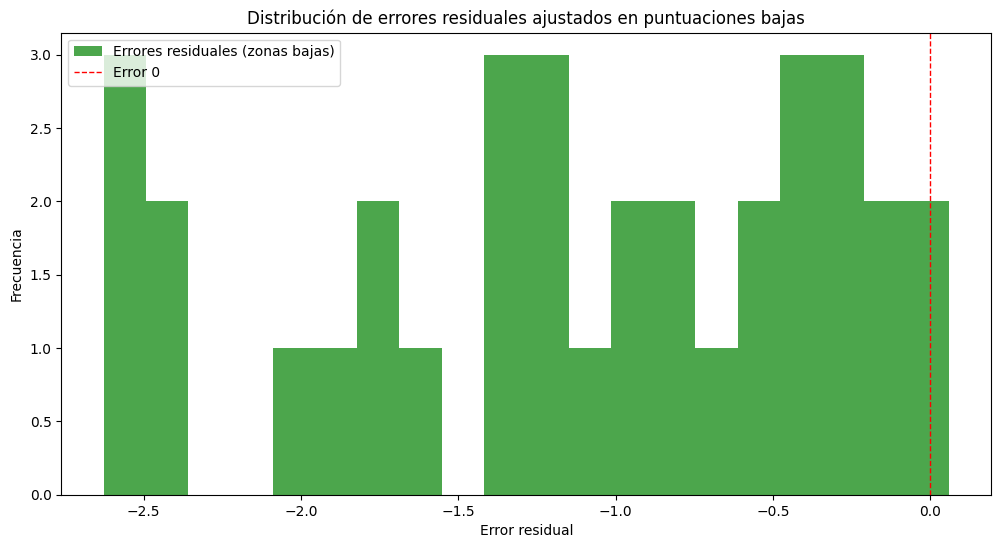

In [ ]:
# Primera prueba con bajos reforzados
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import shap

# Filtrar columnas relevantes y eliminar nulos
df_filtrado = df[['imdb_score', 'Country', 'genre1', 'release_year', 'type', 'runtime', 'Language', 'Continent']].dropna()

# Codificar variables categóricas
codificadores = {}
for columna in ['Country', 'genre1', 'type', 'Language', 'Continent']:
    codificador = LabelEncoder()
    df_filtrado[columna] = codificador.fit_transform(df_filtrado[columna])
    codificadores[columna] = codificador

# Definir variables independientes y dependientes
X = df_filtrado[['Country', 'genre1', 'release_year', 'type', 'runtime', 'Language', 'Continent']]
y = df_filtrado['imdb_score']

# Dividir los datos en entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

# Incrementar ponderación para zonas bajas
pesos = y_entrenamiento.apply(lambda x: 2 if x < 4 else 1)

# GridSearch para LightGBM con ponderación
parametros_lgbm = {
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.05],
    'max_depth': [6, 8],
    'num_leaves': [31, 50],
    'min_gain_to_split': [0.1],
    'min_data_in_leaf': [10],
    'verbosity': [-1],
    'random_state': [42]
}

grid_search_lgbm = GridSearchCV(
    estimator=LGBMRegressor(),
    param_grid=parametros_lgbm,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search_lgbm.fit(X_entrenamiento, y_entrenamiento, sample_weight=pesos)
mejor_lgbm = grid_search_lgbm.best_estimator_

# Predicciones de LightGBM ajustado
y_pred_lgbm = mejor_lgbm.predict(X_prueba)

# Submodelo para zonas bajas
zonas_bajas = y_entrenamiento < 4
X_bajas = X_entrenamiento[zonas_bajas]
y_bajas = y_entrenamiento[zonas_bajas]

submodelo_bajas = CatBoostRegressor(iterations=300, learning_rate=0.05, depth=6, random_state=42, verbose=0)
submodelo_bajas.fit(X_bajas, y_bajas)

# Predicciones del submodelo para zonas bajas
y_pred_bajas = submodelo_bajas.predict(X_prueba)

# Combinar predicciones con un peso mayor para las zonas bajas
y_pred_combinado = np.where(y_prueba < 4, 0.7 * y_pred_bajas + 0.3 * y_pred_lgbm, y_pred_lgbm)

# Evaluar el modelo combinado ajustado
rmse_combinado = np.sqrt(mean_squared_error(y_prueba, y_pred_combinado))
print(f"RMSE del modelo combinado ajustado: {rmse_combinado:.4f}")

# Interpretación con SHAP para el modelo ajustado
explainer = shap.TreeExplainer(mejor_lgbm)
shap_values = explainer.shap_values(X_prueba)

# Gráfico de resumen de SHAP
shap.summary_plot(shap_values, X_prueba, feature_names=X.columns)

# Mapa de predicciones del modelo combinado
plt.figure(figsize=(12, 6))
plt.scatter(y_prueba, y_pred_combinado, alpha=0.7, color='purple', label='Modelo Combinado Ajustado')
plt.plot([y_prueba.min(), y_prueba.max()], [y_prueba.min(), y_prueba.max()], 'r--', lw=2, label='Línea Perfecta')
plt.xlabel('Puntuaciones Reales')
plt.ylabel('Puntuaciones Predichas')
plt.title('Mapa de Predicciones del Modelo Combinado Ajustado')
plt.legend()
plt.show()

# Análisis de errores bajos (puntuaciones reales < 4)
df_errores_bajos = pd.DataFrame({
    'Real': y_prueba,
    'Predicción': y_pred_combinado,
    'Error': y_prueba - y_pred_combinado
})
errores_bajos = df_errores_bajos[df_errores_bajos['Real'] < 4]
print("Análisis de errores en las zonas bajas:\n", errores_bajos.describe())

# Gráfico de errores en zonas bajas
plt.figure(figsize=(12, 6))
plt.hist(errores_bajos['Error'], bins=20, color='green', alpha=0.7, label='Errores residuales (zonas bajas)')
plt.axvline(0, color='red', linestyle='dashed', linewidth=1, label='Error 0')
plt.xlabel('Error residual')
plt.ylabel('Frecuencia')
plt.title('Distribución de errores residuales ajustados en puntuaciones bajas')
plt.legend()
plt.show()



Fitting 5 folds for each of 16 candidates, totalling 80 fits
RMSE del modelo combinado ajustado: 0.8778


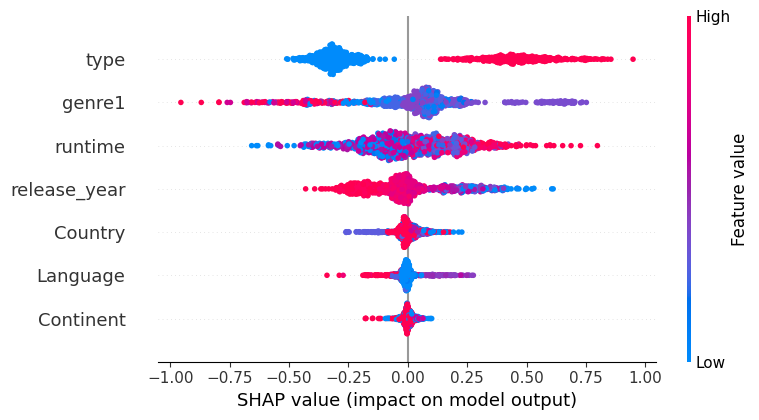

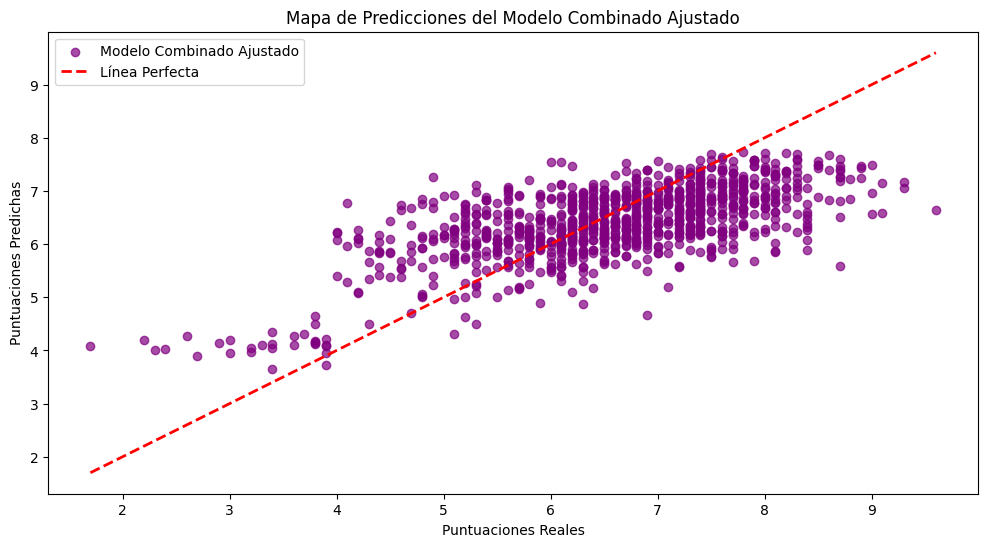

Análisis de errores en las zonas bajas:
             Real  Predicción      Error
count  30.000000   30.000000  30.000000
mean    3.310000    4.120612  -0.810612
std     0.600775    0.195647   0.603037
min     1.700000    3.659547  -2.379063
25%     3.000000    4.034644  -1.133256
50%     3.400000    4.113989  -0.712382
75%     3.800000    4.202376  -0.345013
max     3.900000    4.648438   0.166956


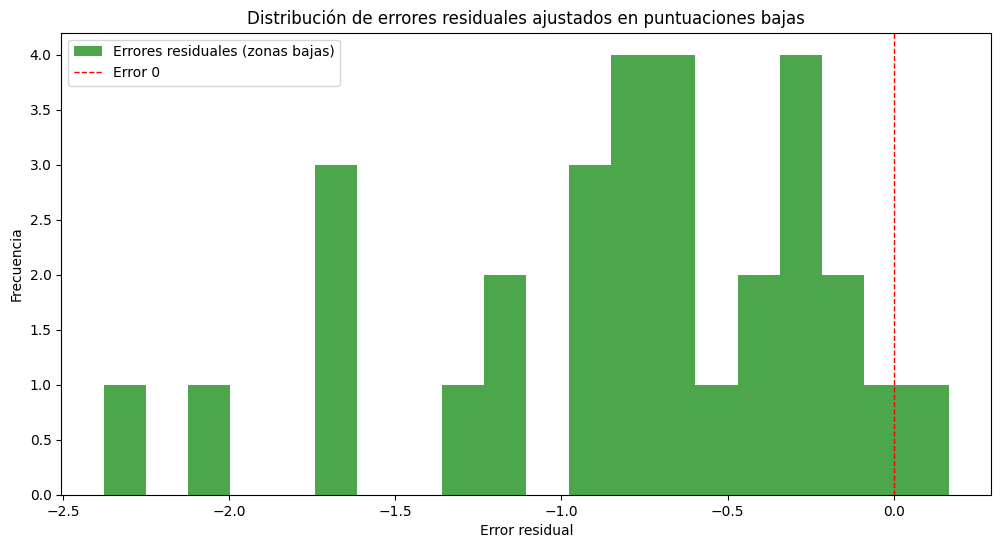

In [ ]:
# Segunda prueba
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import shap



# Filtrar columnas relevantes y eliminar nulos
df_filtrado = df[['imdb_score', 'Country', 'genre1', 'release_year', 'type', 'runtime', 'Language', 'Continent']].dropna()

# Codificar variables categóricas
codificadores = {}
for columna in ['Country', 'genre1', 'type', 'Language', 'Continent']:
    codificador = LabelEncoder()
    df_filtrado[columna] = codificador.fit_transform(df_filtrado[columna])
    codificadores[columna] = codificador

# Definir variables independientes y dependientes
X = df_filtrado[['Country', 'genre1', 'release_year', 'type', 'runtime', 'Language', 'Continent']]
y = df_filtrado['imdb_score']

# Crear categorías para validación estratificada
def asignar_categoria_validacion(puntuacion):
    if puntuacion < 4:
        return 0  # Baja
    elif puntuacion > 7:
        return 2  # Alta
    else:
        return 1  # Media

categorias_validacion = y.apply(asignar_categoria_validacion)

# Dividir los datos en entrenamiento y prueba con validación estratificada
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba, cat_entrenamiento, cat_prueba = train_test_split(
    X, y, categorias_validacion, test_size=0.2, stratify=categorias_validacion, random_state=42
)

# Ajustar ponderaciones para las zonas bajas
pesos = y_entrenamiento.apply(lambda x: 2 if x < 4 else 1)

# GridSearch para LightGBM con validación estratificada
parametros_lgbm = {
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.05],
    'max_depth': [6, 8],
    'num_leaves': [31, 50],
    'min_gain_to_split': [0.1],
    'min_data_in_leaf': [10],
    'verbosity': [-1],
    'random_state': [42]
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_lgbm = GridSearchCV(
    estimator=LGBMRegressor(),
    param_grid=parametros_lgbm,
    scoring='neg_mean_squared_error',
    cv=kfold.split(X_entrenamiento, cat_entrenamiento),  # Usar categorías para estratificación
    verbose=1,
    n_jobs=-1
)
grid_search_lgbm.fit(X_entrenamiento, y_entrenamiento, sample_weight=pesos)
mejor_lgbm = grid_search_lgbm.best_estimator_

# Predicciones de LightGBM ajustado
y_pred_lgbm = mejor_lgbm.predict(X_prueba)

# Submodelo para zonas bajas
zonas_bajas = y_entrenamiento < 4
X_bajas = X_entrenamiento[zonas_bajas]
y_bajas = y_entrenamiento[zonas_bajas]

submodelo_bajas = CatBoostRegressor(iterations=300, learning_rate=0.05, depth=6, random_state=42, verbose=0)
submodelo_bajas.fit(X_bajas, y_bajas)

# Predicciones del submodelo para zonas bajas
y_pred_bajas = submodelo_bajas.predict(X_prueba)

# Combinar predicciones con un peso mayor para las zonas bajas
y_pred_combinado = np.where(y_prueba < 4, 0.7 * y_pred_bajas + 0.3 * y_pred_lgbm, y_pred_lgbm)

# Evaluar el modelo combinado ajustado
rmse_combinado = np.sqrt(mean_squared_error(y_prueba, y_pred_combinado))
print(f"RMSE del modelo combinado ajustado: {rmse_combinado:.4f}")

# Interpretación con SHAP para el modelo ajustado
explainer = shap.TreeExplainer(mejor_lgbm)
shap_values = explainer.shap_values(X_prueba)

# Gráfico de resumen de SHAP
shap.summary_plot(shap_values, X_prueba, feature_names=X.columns)

# Mapa de predicciones del modelo combinado
plt.figure(figsize=(12, 6))
plt.scatter(y_prueba, y_pred_combinado, alpha=0.7, color='purple', label='Modelo Combinado Ajustado')
plt.plot([y_prueba.min(), y_prueba.max()], [y_prueba.min(), y_prueba.max()], 'r--', lw=2, label='Línea Perfecta')
plt.xlabel('Puntuaciones Reales')
plt.ylabel('Puntuaciones Predichas')
plt.title('Mapa de Predicciones del Modelo Combinado Ajustado')
plt.legend()
plt.show()

# Análisis de errores bajos (puntuaciones reales < 4)
df_errores_bajos = pd.DataFrame({
    'Real': y_prueba,
    'Predicción': y_pred_combinado,
    'Error': y_prueba - y_pred_combinado
})
errores_bajos = df_errores_bajos[df_errores_bajos['Real'] < 4]
print("Análisis de errores en las zonas bajas:\n", errores_bajos.describe())

# Gráfico de errores en zonas bajas
plt.figure(figsize=(12, 6))
plt.hist(errores_bajos['Error'], bins=20, color='green', alpha=0.7, label='Errores residuales (zonas bajas)')
plt.axvline(0, color='red', linestyle='dashed', linewidth=1, label='Error 0')
plt.xlabel('Error residual')
plt.ylabel('Frecuencia')
plt.title('Distribución de errores residuales ajustados en puntuaciones bajas')
plt.legend()
plt.show()



Optimización de XGBoost...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Mejores hiperparámetros para XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Optimización de LightGBM...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Mejores hiperparámetros para LightGBM: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50}
Optimización de RandomForest...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Mejores hiperparámetros para RandomForest: {'max_depth': 10, 'n_estimators': 200}
Entrenando modelo de stacking...
RMSE en Validación (Stacking): 1.0008
RMSE en Prueba (Stacking): 1.0696


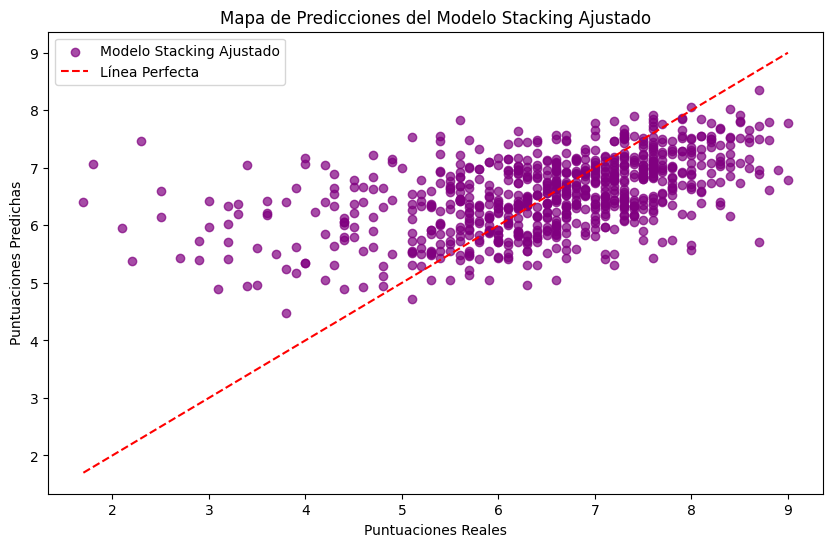

In [37]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


# Filtrar columnas relevantes y eliminar nulos
df_filtered = df[['imdb_score', 'Country', 'genre1', 'release_year', 'type', 'runtime']].dropna()

# Codificar variables categóricas
label_encoders = {}
for col in ['Country', 'genre1', 'type']:
    le = LabelEncoder()
    df_filtered[col] = le.fit_transform(df_filtered[col])
    label_encoders[col] = le

# Preparar los datos
X = df_filtered[['Country', 'genre1', 'release_year', 'type', 'runtime']].values
y = df_filtered['imdb_score'].values

# Dividir en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Optimización de hiperparámetros para modelos base
param_grids = {
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 6, 10]
    },
    'LightGBM': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 6, 10]
    },
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15]
    }
}

# Modelos base
models = {
    'XGBoost': XGBRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42, verbose=-1),  # Sin verbose en LightGBM
    'RandomForest': RandomForestRegressor(random_state=42)
}

best_models = {}
for name, model in models.items():
    print(f"Optimización de {name}...")
    grid_search = GridSearchCV(model, param_grids[name], scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Mejores hiperparámetros para {name}: {grid_search.best_params_}")

# Configuración del stacking
estimators = [
    ('XGBoost', best_models['XGBoost']),
    ('LightGBM', best_models['LightGBM']),
    ('RandomForest', best_models['RandomForest'])
]

# Modelo meta para el stacking
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.05, max_depth=6)
)

# Entrenar el modelo stacking
print("Entrenando modelo de stacking...")
stacking_model.fit(X_train, y_train)

# Evaluación del modelo stacking
val_preds = stacking_model.predict(X_val)
test_preds = stacking_model.predict(X_test)

rmse_val = np.sqrt(mean_squared_error(y_val, val_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

print(f"RMSE en Validación (Stacking): {rmse_val:.4f}")
print(f"RMSE en Prueba (Stacking): {rmse_test:.4f}")

# Gráfico de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_preds, alpha=0.7, color='purple', label='Modelo Stacking Ajustado')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Línea Perfecta')
plt.xlabel('Puntuaciones Reales')
plt.ylabel('Puntuaciones Predichas')
plt.title('Mapa de Predicciones del Modelo Stacking Ajustado')
plt.legend()
plt.show()


RMSE en zonas bajas (modelo específico): 0.7827
RMSE en zonas medias (modelo específico): 0.5676
RMSE del modelo principal: 1.0816
RMSE combinado (modelo meta): 0.7385


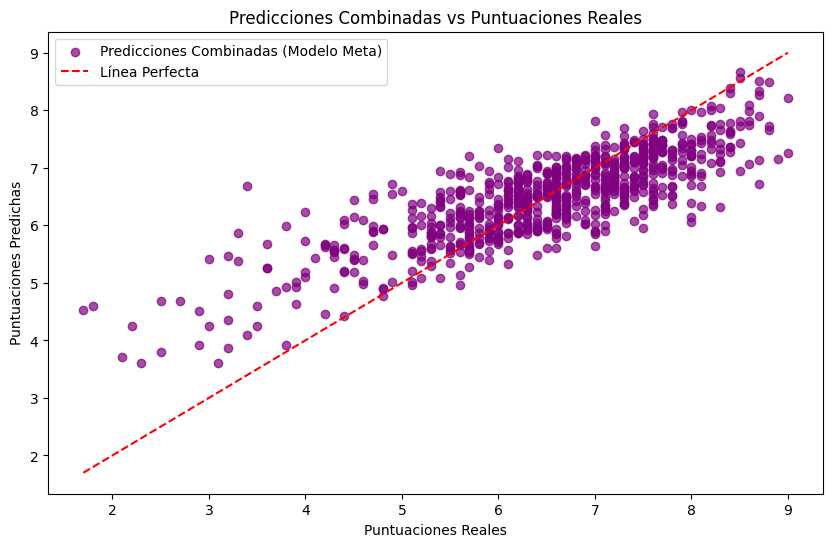

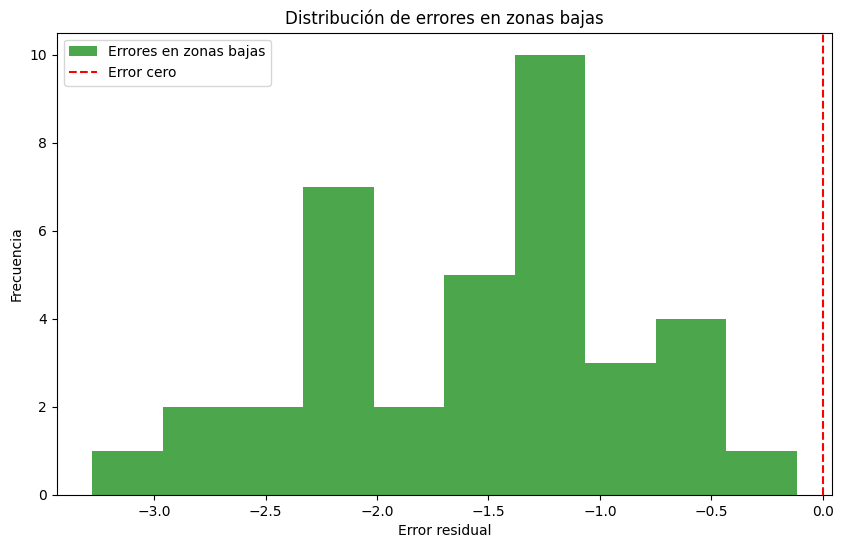

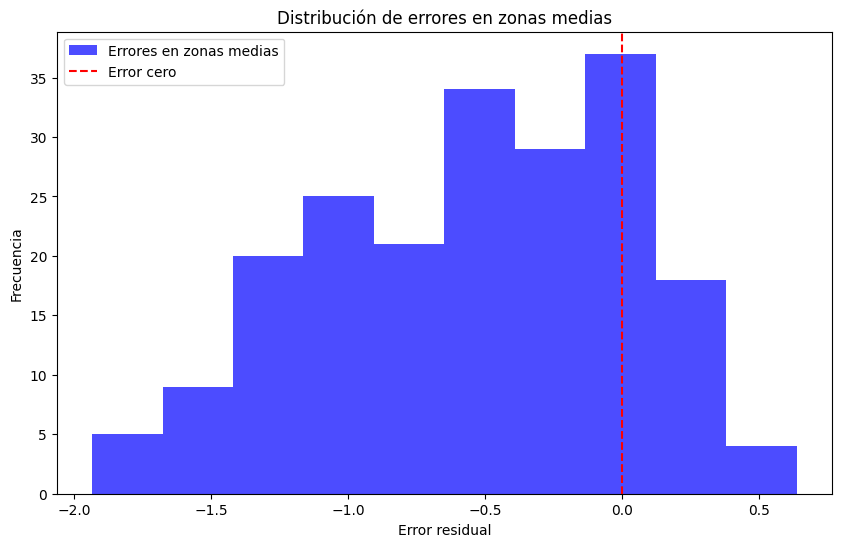

In [39]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Dividir en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# -------------------------
# Modelo para zonas bajas (imdb_score <= 4)
# -------------------------
low_score_mask = y_train <= 4
X_train_low = X_train[low_score_mask]
y_train_low = y_train[low_score_mask]

low_score_model = XGBRegressor(random_state=42, n_estimators=200, learning_rate=0.1, max_depth=6)
low_score_model.fit(X_train_low, y_train_low)

# -------------------------
# Modelo para zonas medias (4 < imdb_score <= 6)
# -------------------------
mid_score_mask = (y_train > 4) & (y_train <= 6)
X_train_mid = X_train[mid_score_mask]
y_train_mid = y_train[mid_score_mask]

mid_score_model = XGBRegressor(random_state=42, n_estimators=200, learning_rate=0.1, max_depth=6)
mid_score_model.fit(X_train_mid, y_train_mid)

# -------------------------
# Modelo principal para todas las puntuaciones
# -------------------------
main_model = XGBRegressor(random_state=42, n_estimators=200, learning_rate=0.1, max_depth=6)
main_model.fit(X_train, y_train)

# -------------------------
# Predicciones en conjunto de prueba
# -------------------------
low_score_preds = low_score_model.predict(X_test)
mid_score_preds = mid_score_model.predict(X_test)
main_preds = main_model.predict(X_test)

# Crear un conjunto de predicciones para el modelo meta
meta_features = np.column_stack([low_score_preds, mid_score_preds, main_preds])

# -------------------------
# Modelo meta
# -------------------------
meta_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=4)
meta_model.fit(meta_features, y_test)

# -------------------------
# Evaluación final
# -------------------------
final_preds = meta_model.predict(meta_features)

# RMSE para cada modelo y para la combinación final
rmse_low = np.sqrt(mean_squared_error(y_test[y_test <= 4], low_score_preds[y_test <= 4]))
rmse_mid = np.sqrt(mean_squared_error(y_test[(y_test > 4) & (y_test <= 6)], mid_score_preds[(y_test > 4) & (y_test <= 6)]))
rmse_main = np.sqrt(mean_squared_error(y_test, main_preds))
rmse_final = np.sqrt(mean_squared_error(y_test, final_preds))

print(f"RMSE en zonas bajas (modelo específico): {rmse_low:.4f}")
print(f"RMSE en zonas medias (modelo específico): {rmse_mid:.4f}")
print(f"RMSE del modelo principal: {rmse_main:.4f}")
print(f"RMSE combinado (modelo meta): {rmse_final:.4f}")

# -------------------------
# Gráficos
# -------------------------

# Gráfico de predicciones finales vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, final_preds, alpha=0.7, color='purple', label='Predicciones Combinadas (Modelo Meta)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Línea Perfecta')
plt.xlabel('Puntuaciones Reales')
plt.ylabel('Puntuaciones Predichas')
plt.title('Predicciones Combinadas vs Puntuaciones Reales')
plt.legend()
plt.show()

# Distribución de errores para zonas bajas
low_error = y_test[y_test <= 4] - final_preds[y_test <= 4]

plt.figure(figsize=(10, 6))
plt.hist(low_error, bins=10, color='green', alpha=0.7, label='Errores en zonas bajas')
plt.axvline(0, color='red', linestyle='--', label='Error cero')
plt.xlabel('Error residual')
plt.ylabel('Frecuencia')
plt.title('Distribución de errores en zonas bajas')
plt.legend()
plt.show()

# Distribución de errores para zonas medias
mid_error = y_test[(y_test > 4) & (y_test <= 6)] - final_preds[(y_test > 4) & (y_test <= 6)]

plt.figure(figsize=(10, 6))
plt.hist(mid_error, bins=10, color='blue', alpha=0.7, label='Errores en zonas medias')
plt.axvline(0, color='red', linestyle='--', label='Error cero')
plt.xlabel('Error residual')
plt.ylabel('Frecuencia')
plt.title('Distribución de errores en zonas medias')
plt.legend()
plt.show()



Fitting 3 folds for each of 48 candidates, totalling 144 fits
Mejores parámetros: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 2}
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Mejores parámetros: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 2}
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 2}
Sesgo: -0.05, RMSE combinado: 0.5285
Sesgo: -0.1, RMSE combinado: 0.5362
Sesgo: -0.15, RMSE combinado: 0.5484
Mejor sesgo: -0.05, RMSE combinado final: 0.5285
RMSE en zonas bajas: 1.2792
RMSE en zonas medias: 0.4652
RMSE combinado (modelo meta ajustado): 0.5285


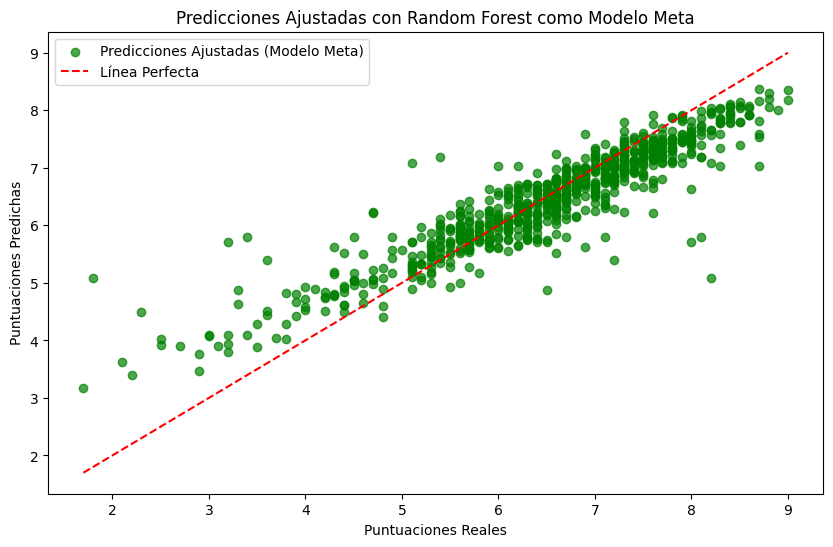

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Dividir en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# -------------------------
# Entrenar modelo con validación cruzada y búsqueda de hiperparámetros
# -------------------------
def train_xgboost_with_cv(X_train, y_train):
    param_grid = {
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [4, 6],
        "n_estimators": [100, 200],
        "reg_alpha": [0, 0.5],
        "reg_lambda": [1, 2],
    }
    model = XGBRegressor(random_state=42, objective="reg:squarederror")
    grid_search = GridSearchCV(
        model, param_grid, scoring="neg_mean_squared_error", cv=3, verbose=1, n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    print(f"Mejores parámetros: {grid_search.best_params_}")
    return grid_search.best_estimator_

# -------------------------
# Modelo para zonas bajas (imdb_score <= 4)
# -------------------------
low_score_mask = y_train <= 4
X_train_low = X_train[low_score_mask]
y_train_low = y_train[low_score_mask]

low_model = train_xgboost_with_cv(X_train_low, y_train_low)
low_preds = low_model.predict(X_test)

# -------------------------
# Modelo para zonas medias (4 < imdb_score <= 6)
# -------------------------
mid_score_mask = (y_train > 4) & (y_train <= 6)
X_train_mid = X_train[mid_score_mask]
y_train_mid = y_train[mid_score_mask]

mid_model = train_xgboost_with_cv(X_train_mid, y_train_mid)
mid_preds = mid_model.predict(X_test)

# -------------------------
# Modelo principal para todas las puntuaciones
# -------------------------
main_model = train_xgboost_with_cv(X_train, y_train)
main_preds = main_model.predict(X_test)

# -------------------------
# Modelo meta más robusto (Random Forest)
# -------------------------
# Crear un conjunto de características enriquecidas para el modelo meta
meta_features = np.column_stack([
    low_preds, mid_preds, main_preds,
    np.abs(low_preds - main_preds),
    np.abs(mid_preds - main_preds),
])

# Entrenar el modelo meta
meta_model = RandomForestRegressor(n_estimators=300, random_state=42)
meta_model.fit(meta_features, y_test)

# -------------------------
# Predicciones finales con sesgo dinámico
# -------------------------
biases = [-0.05, -0.1, -0.15]  # Ajustes para sesgos dinámicos
best_rmse = float("inf")
best_bias = None
best_final_preds = None

for bias in biases:
    final_preds = meta_model.predict(meta_features) + bias
    rmse = np.sqrt(mean_squared_error(y_test, final_preds))
    print(f"Sesgo: {bias}, RMSE combinado: {rmse:.4f}")
    if rmse < best_rmse:
        best_rmse = rmse
        best_bias = bias
        best_final_preds = final_preds

print(f"Mejor sesgo: {best_bias}, RMSE combinado final: {best_rmse:.4f}")

# -------------------------
# Evaluación final
# -------------------------
rmse_low = np.sqrt(mean_squared_error(y_test[y_test <= 4], best_final_preds[y_test <= 4]))
rmse_mid = np.sqrt(mean_squared_error(y_test[(y_test > 4) & (y_test <= 6)], best_final_preds[(y_test > 4) & (y_test <= 6)]))
rmse_combined = np.sqrt(mean_squared_error(y_test, best_final_preds))

print(f"RMSE en zonas bajas: {rmse_low:.4f}")
print(f"RMSE en zonas medias: {rmse_mid:.4f}")
print(f"RMSE combinado (modelo meta ajustado): {rmse_combined:.4f}")

# -------------------------
# Gráficos
# -------------------------
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_final_preds, alpha=0.7, color='green', label='Predicciones Ajustadas (Modelo Meta)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Línea Perfecta')
plt.xlabel('Puntuaciones Reales')
plt.ylabel('Puntuaciones Predichas')
plt.title('Predicciones Ajustadas con Random Forest como Modelo Meta')
plt.legend()
plt.show()

